In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Load BASELINE datasets
df_baseline_api_gateway = pd.read_csv("baseline/retrans_packets/api_gateway.csv")
df_baseline_customers_service = pd.read_csv("baseline/retrans_packets/customers_service.csv")
df_baseline_vets_service = pd.read_csv("baseline/retrans_packets/vets_service.csv")
df_baseline_visits_service = pd.read_csv("baseline/retrans_packets/visits_service.csv")
df_baseline_srtt = pd.read_csv("baseline/srtt.csv")

# Load CPU STRESS datasets
df_cpustress_api_gateway = pd.read_csv("cpu stress/retrans_packets/api_gateway.csv")
df_cpustress_customers_service = pd.read_csv("cpu stress/retrans_packets/customers_service.csv")
df_cpustress_vets_service = pd.read_csv("cpu stress/retrans_packets/vets_service.csv")
df_cpustress_visits_service = pd.read_csv("cpu stress/retrans_packets/visits_service.csv")
df_cpustress_srtt = pd.read_csv("cpu stress/srtt.csv")

# Load DELAY datasets
df_delay_api_gateway = pd.read_csv("delay/retrans_packets/api_gateway.csv")
df_delay_customers_service = pd.read_csv("delay/retrans_packets/customers_service.csv")
df_delay_vets_service = pd.read_csv("delay/retrans_packets/vets_service.csv")
df_delay_visits_service = pd.read_csv("delay/retrans_packets/visits_service.csv")
df_delay_srtt = pd.read_csv("delay/srtt.csv")

# Load MEM STRESS datasets
df_memstress_api_gateway = pd.read_csv("mem stress/retrans_packets/api_gateway.csv")
df_memstress_customers_service = pd.read_csv("mem stress/retrans_packets/customers_service.csv")
df_memstress_vets_service = pd.read_csv("mem stress/retrans_packets/vets_service.csv")
df_memstress_visits_service = pd.read_csv("mem stress/retrans_packets/visits_service.csv")
df_memstress_srtt = pd.read_csv("mem stress/srtt.csv")

# Load NET LOSS datasets
df_netloss_api_gateway = pd.read_csv("net loss/retrans_packets/api_gateway.csv")
df_netloss_customers_service = pd.read_csv("net loss/retrans_packets/customers_service.csv")
df_netloss_vets_service = pd.read_csv("net loss/retrans_packets/vets_service.csv")
df_netloss_visits_service = pd.read_csv("net loss/retrans_packets/visits_service.csv")
df_netloss_srtt = pd.read_csv("net loss/srtt.csv")


# Add source labels - BASELINE
df_baseline_api_gateway["source"] = "BASELINE"
df_baseline_customers_service["source"] = "BASELINE"
df_baseline_vets_service["source"] = "BASELINE"
df_baseline_visits_service["source"] = "BASELINE"
df_baseline_srtt["source"] = "BASELINE"

# Add source labels - CPU STRESS
df_cpustress_api_gateway["source"] = "CPU_STRESS"
df_cpustress_customers_service["source"] = "CPU_STRESS"
df_cpustress_vets_service["source"] = "CPU_STRESS"
df_cpustress_visits_service["source"] = "CPU_STRESS"
df_cpustress_srtt["source"] = "CPU_STRESS"

# Add source labels - DELAY
df_delay_api_gateway["source"] = "DELAY"
df_delay_customers_service["source"] = "DELAY"
df_delay_vets_service["source"] = "DELAY"
df_delay_visits_service["source"] = "DELAY"
df_delay_srtt["source"] = "DELAY"

# Add source labels - MEM STRESS
df_memstress_api_gateway["source"] = "MEM_STRESS"
df_memstress_customers_service["source"] = "MEM_STRESS"
df_memstress_vets_service["source"] = "MEM_STRESS"
df_memstress_visits_service["source"] = "MEM_STRESS"
df_memstress_srtt["source"] = "MEM_STRESS"

# Add source labels - NET LOSS
df_netloss_api_gateway["source"] = "NET_LOSS"
df_netloss_customers_service["source"] = "NET_LOSS"
df_netloss_vets_service["source"] = "NET_LOSS"
df_netloss_visits_service["source"] = "NET_LOSS"
df_netloss_srtt["source"] = "NET_LOSS"


# Convert to datetime - BASELINE
df_baseline_api_gateway["Time"] = pd.to_datetime(df_baseline_api_gateway["Time"])
df_baseline_customers_service["Time"] = pd.to_datetime(df_baseline_customers_service["Time"])
df_baseline_vets_service["Time"] = pd.to_datetime(df_baseline_vets_service["Time"])
df_baseline_visits_service["Time"] = pd.to_datetime(df_baseline_visits_service["Time"])
df_baseline_srtt["Time"] = pd.to_datetime(df_baseline_srtt["Time"])

# Convert to datetime - CPU STRESS
df_cpustress_api_gateway["Time"] = pd.to_datetime(df_cpustress_api_gateway["Time"])
df_cpustress_customers_service["Time"] = pd.to_datetime(df_cpustress_customers_service["Time"])
df_cpustress_vets_service["Time"] = pd.to_datetime(df_cpustress_vets_service["Time"])
df_cpustress_visits_service["Time"] = pd.to_datetime(df_cpustress_visits_service["Time"])
df_cpustress_srtt["Time"] = pd.to_datetime(df_cpustress_srtt["Time"])

# Convert to datetime - DELAY
df_delay_api_gateway["Time"] = pd.to_datetime(df_delay_api_gateway["Time"])
df_delay_customers_service["Time"] = pd.to_datetime(df_delay_customers_service["Time"])
df_delay_vets_service["Time"] = pd.to_datetime(df_delay_vets_service["Time"])
df_delay_visits_service["Time"] = pd.to_datetime(df_delay_visits_service["Time"])
df_delay_srtt["Time"] = pd.to_datetime(df_delay_srtt["Time"])

# Convert to datetime - MEM STRESS
df_memstress_api_gateway["Time"] = pd.to_datetime(df_memstress_api_gateway["Time"])
df_memstress_customers_service["Time"] = pd.to_datetime(df_memstress_customers_service["Time"])
df_memstress_vets_service["Time"] = pd.to_datetime(df_memstress_vets_service["Time"])
df_memstress_visits_service["Time"] = pd.to_datetime(df_memstress_visits_service["Time"])
df_memstress_srtt["Time"] = pd.to_datetime(df_memstress_srtt["Time"])

# Convert to datetime - NET LOSS
df_netloss_api_gateway["Time"] = pd.to_datetime(df_netloss_api_gateway["Time"])
df_netloss_customers_service["Time"] = pd.to_datetime(df_netloss_customers_service["Time"])
df_netloss_vets_service["Time"] = pd.to_datetime(df_netloss_vets_service["Time"])
df_netloss_visits_service["Time"] = pd.to_datetime(df_netloss_visits_service["Time"])
df_netloss_srtt["Time"] = pd.to_datetime(df_netloss_srtt["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_api_gateway["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cpustress_api_gateway["Time"].min()
df_cpustress_api_gateway["Time"] += cpustress_offset
df_cpustress_customers_service["Time"] += cpustress_offset
df_cpustress_vets_service["Time"] += cpustress_offset
df_cpustress_visits_service["Time"] += cpustress_offset
df_cpustress_srtt["Time"] += cpustress_offset

# Synchronize DELAY datasets
delay_offset = time_offset - df_delay_api_gateway["Time"].min()
df_delay_api_gateway["Time"] += delay_offset
df_delay_customers_service["Time"] += delay_offset
df_delay_vets_service["Time"] += delay_offset
df_delay_visits_service["Time"] += delay_offset
df_delay_srtt["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_memstress_api_gateway["Time"].min()
df_memstress_api_gateway["Time"] += memstress_offset
df_memstress_customers_service["Time"] += memstress_offset
df_memstress_vets_service["Time"] += memstress_offset
df_memstress_visits_service["Time"] += memstress_offset
df_memstress_srtt["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_netloss_api_gateway["Time"].min()
df_netloss_api_gateway["Time"] += netloss_offset
df_netloss_customers_service["Time"] += netloss_offset
df_netloss_vets_service["Time"] += netloss_offset
df_netloss_visits_service["Time"] += netloss_offset
df_netloss_srtt["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_api_gateway, df_baseline_customers_service, df_baseline_vets_service, 
    df_baseline_visits_service, df_baseline_srtt,
    # CPU Stress
    df_cpustress_api_gateway, df_cpustress_customers_service, df_cpustress_vets_service, 
    df_cpustress_visits_service, df_cpustress_srtt,
    # Delay
    df_delay_api_gateway, df_delay_customers_service, df_delay_vets_service, 
    df_delay_visits_service, df_delay_srtt,
    # Memory Stress
    df_memstress_api_gateway, df_memstress_customers_service, df_memstress_vets_service, 
    df_memstress_visits_service, df_memstress_srtt,
    # Network Loss
    df_netloss_api_gateway, df_netloss_customers_service, df_netloss_vets_service, 
    df_netloss_visits_service, df_netloss_srtt
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'ApiGateway': {
        'baseline': df_baseline_api_gateway,
        'cpu_stress': df_cpustress_api_gateway,
        'delay': df_delay_api_gateway,
        'mem_stress': df_memstress_api_gateway,
        'net_loss': df_netloss_api_gateway,
    },
    'CustomersService': {
        'baseline': df_baseline_customers_service,
        'cpu_stress': df_cpustress_customers_service,
        'delay': df_delay_customers_service,
        'mem_stress': df_memstress_customers_service,
        'net_loss': df_netloss_customers_service,
    },
    'VetsService': {
        'baseline': df_baseline_vets_service,
        'cpu_stress': df_cpustress_vets_service,
        'delay': df_delay_vets_service,
        'mem_stress': df_memstress_vets_service,
        'net_loss': df_netloss_vets_service,
    },
    'VisitsService': {
        'baseline': df_baseline_visits_service,
        'cpu_stress': df_cpustress_visits_service,
        'delay': df_delay_visits_service,
        'mem_stress': df_memstress_visits_service,
        'net_loss': df_netloss_visits_service,
    },
    'SRTT': {
        'baseline': df_baseline_srtt,
        'cpu_stress': df_cpustress_srtt,
        'delay': df_delay_srtt,
        'mem_stress': df_memstress_srtt,
        'net_loss': df_netloss_srtt,
    }
}

print("✅ All TCP retransmission datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} TCP metrics across {len(all_datasets['ApiGateway'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

✅ All TCP retransmission datasets loaded successfully!
📊 Loaded 5 TCP metrics across 5 experiment types

Dataset structure:
  ApiGateway: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  CustomersService: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  VetsService: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  VisitsService: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  SRTT: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']


Running TUNA analysis on TCP datasets...
Processing ApiGateway
Training ApiGateway...
  ℹ Applied penalty-only (factor: 0.75) for ApiGateway - baseline (discrete data)
  ℹ Applied penalty-only (factor: 0.75) for ApiGateway - cpu_stress (discrete data)
  ℹ Applied penalty-only (factor: 0.75) for ApiGateway - delay (discrete data)
  ℹ Applied penalty-only (factor: 0.75) for ApiGateway - mem_stress (discrete data)
  ✓ Applied ML + penalty (factor: 0.75) for ApiGateway - net_loss
Processing CustomersService
Training CustomersService...
  ℹ Applied penalty-only (factor: 0.75) for CustomersService - baseline (discrete data)
  ℹ Applied penalty-only (factor: 0.75) for CustomersService - cpu_stress (discrete data)
  ✓ Applied ML + penalty (factor: 0.75) for CustomersService - delay
  ℹ Applied penalty-only (factor: 0.75) for CustomersService - mem_stress (discrete data)
  ✓ Applied ML + penalty (factor: 0.75) for CustomersService - net_loss
Processing VetsService
Training VetsService...
  ℹ Ap

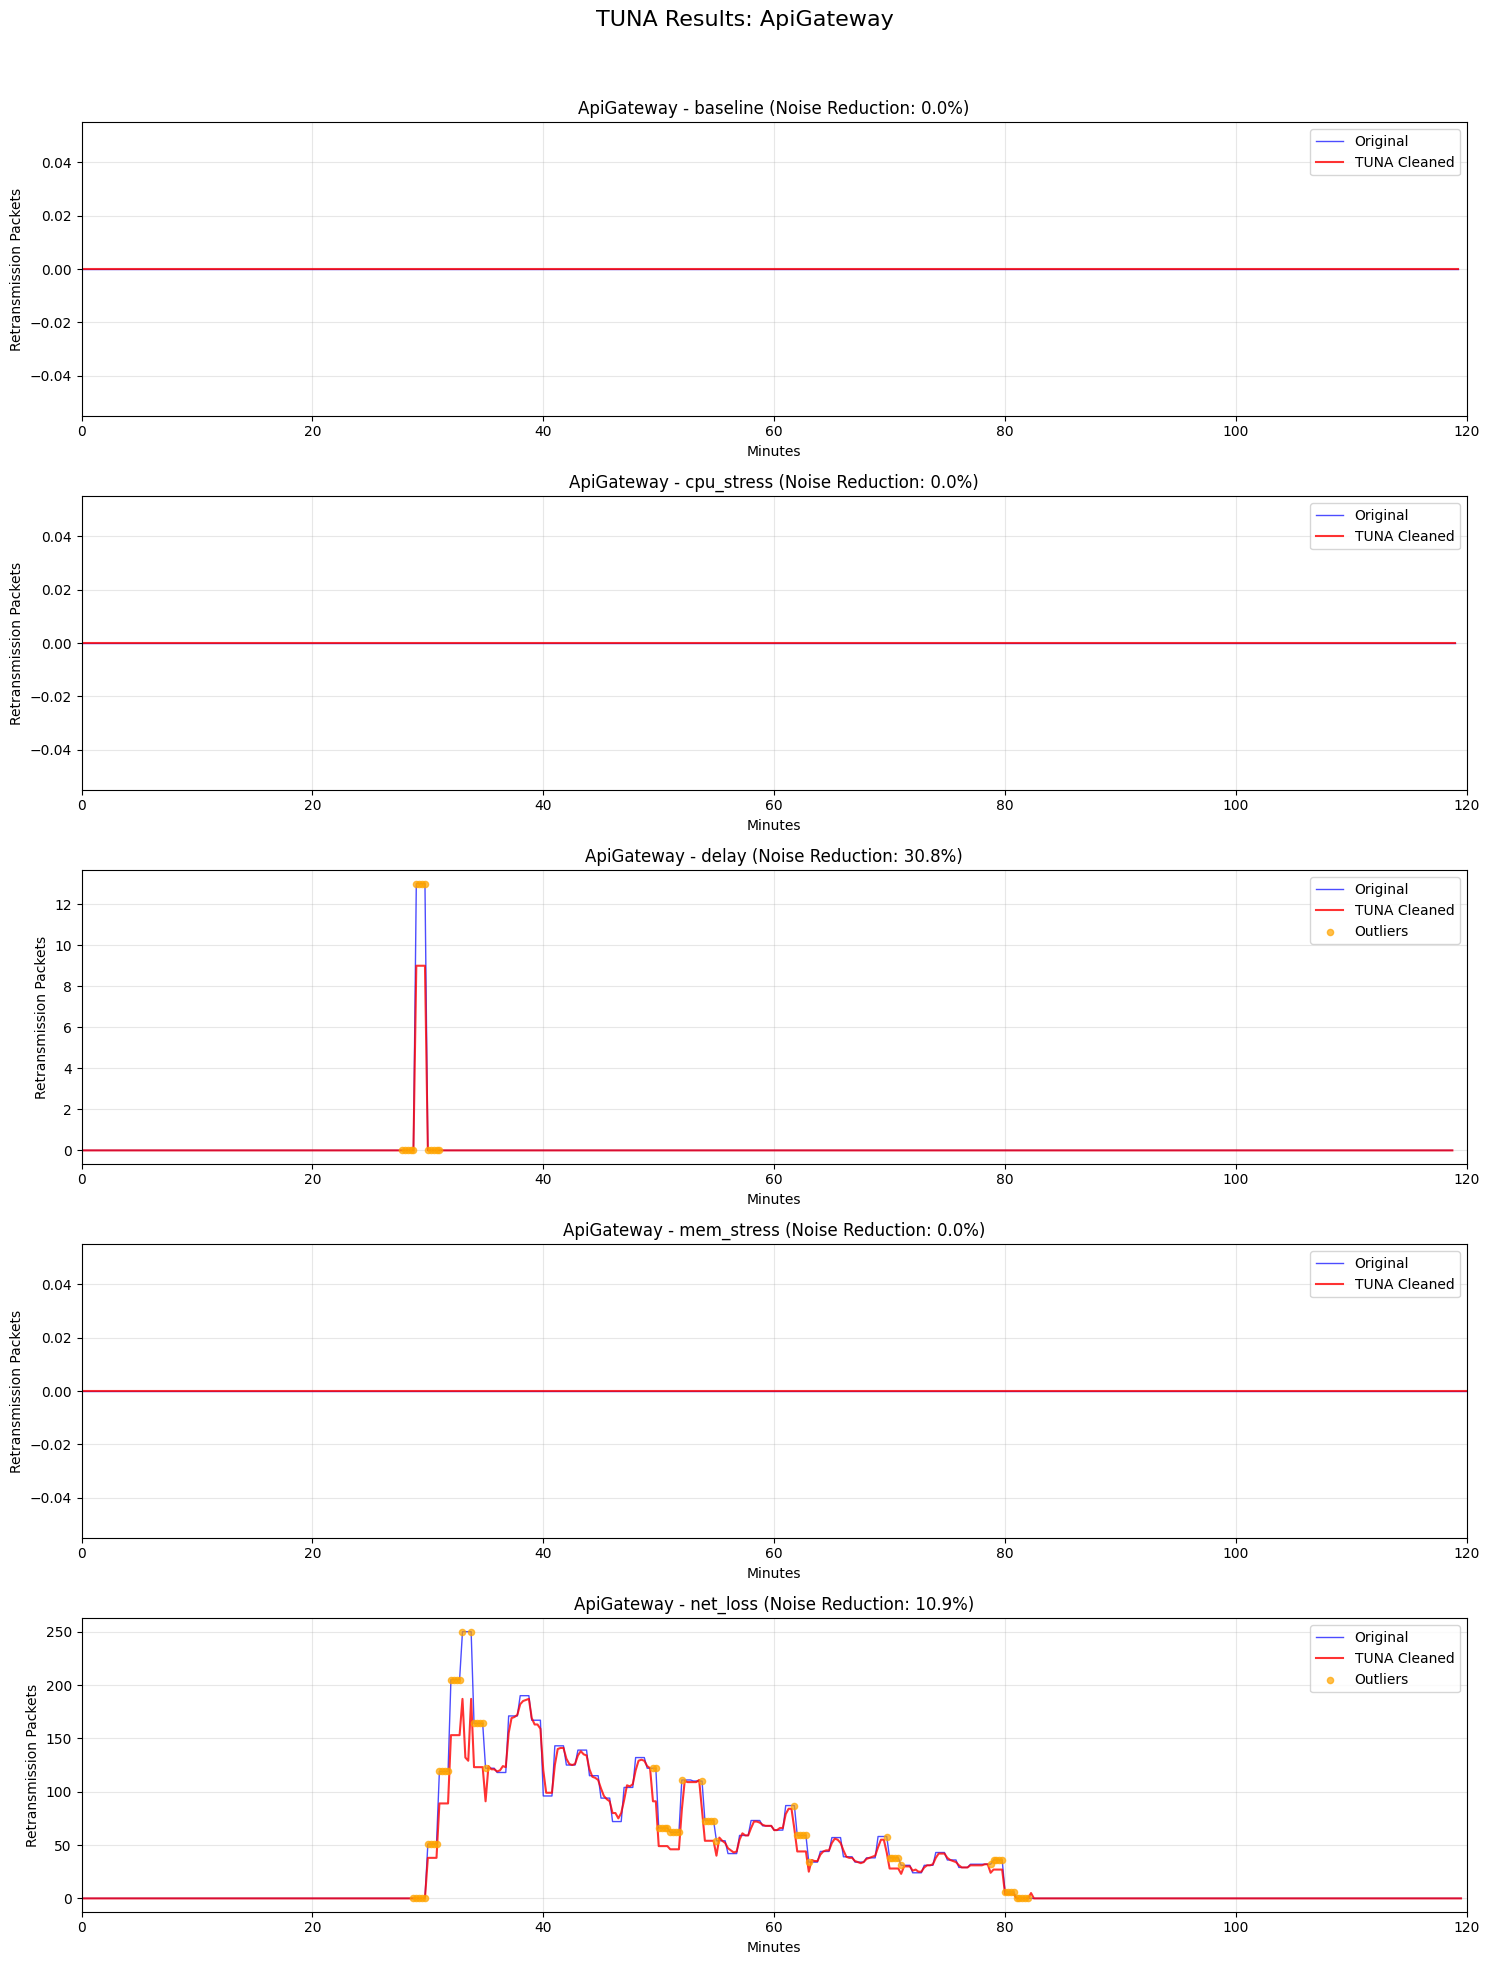

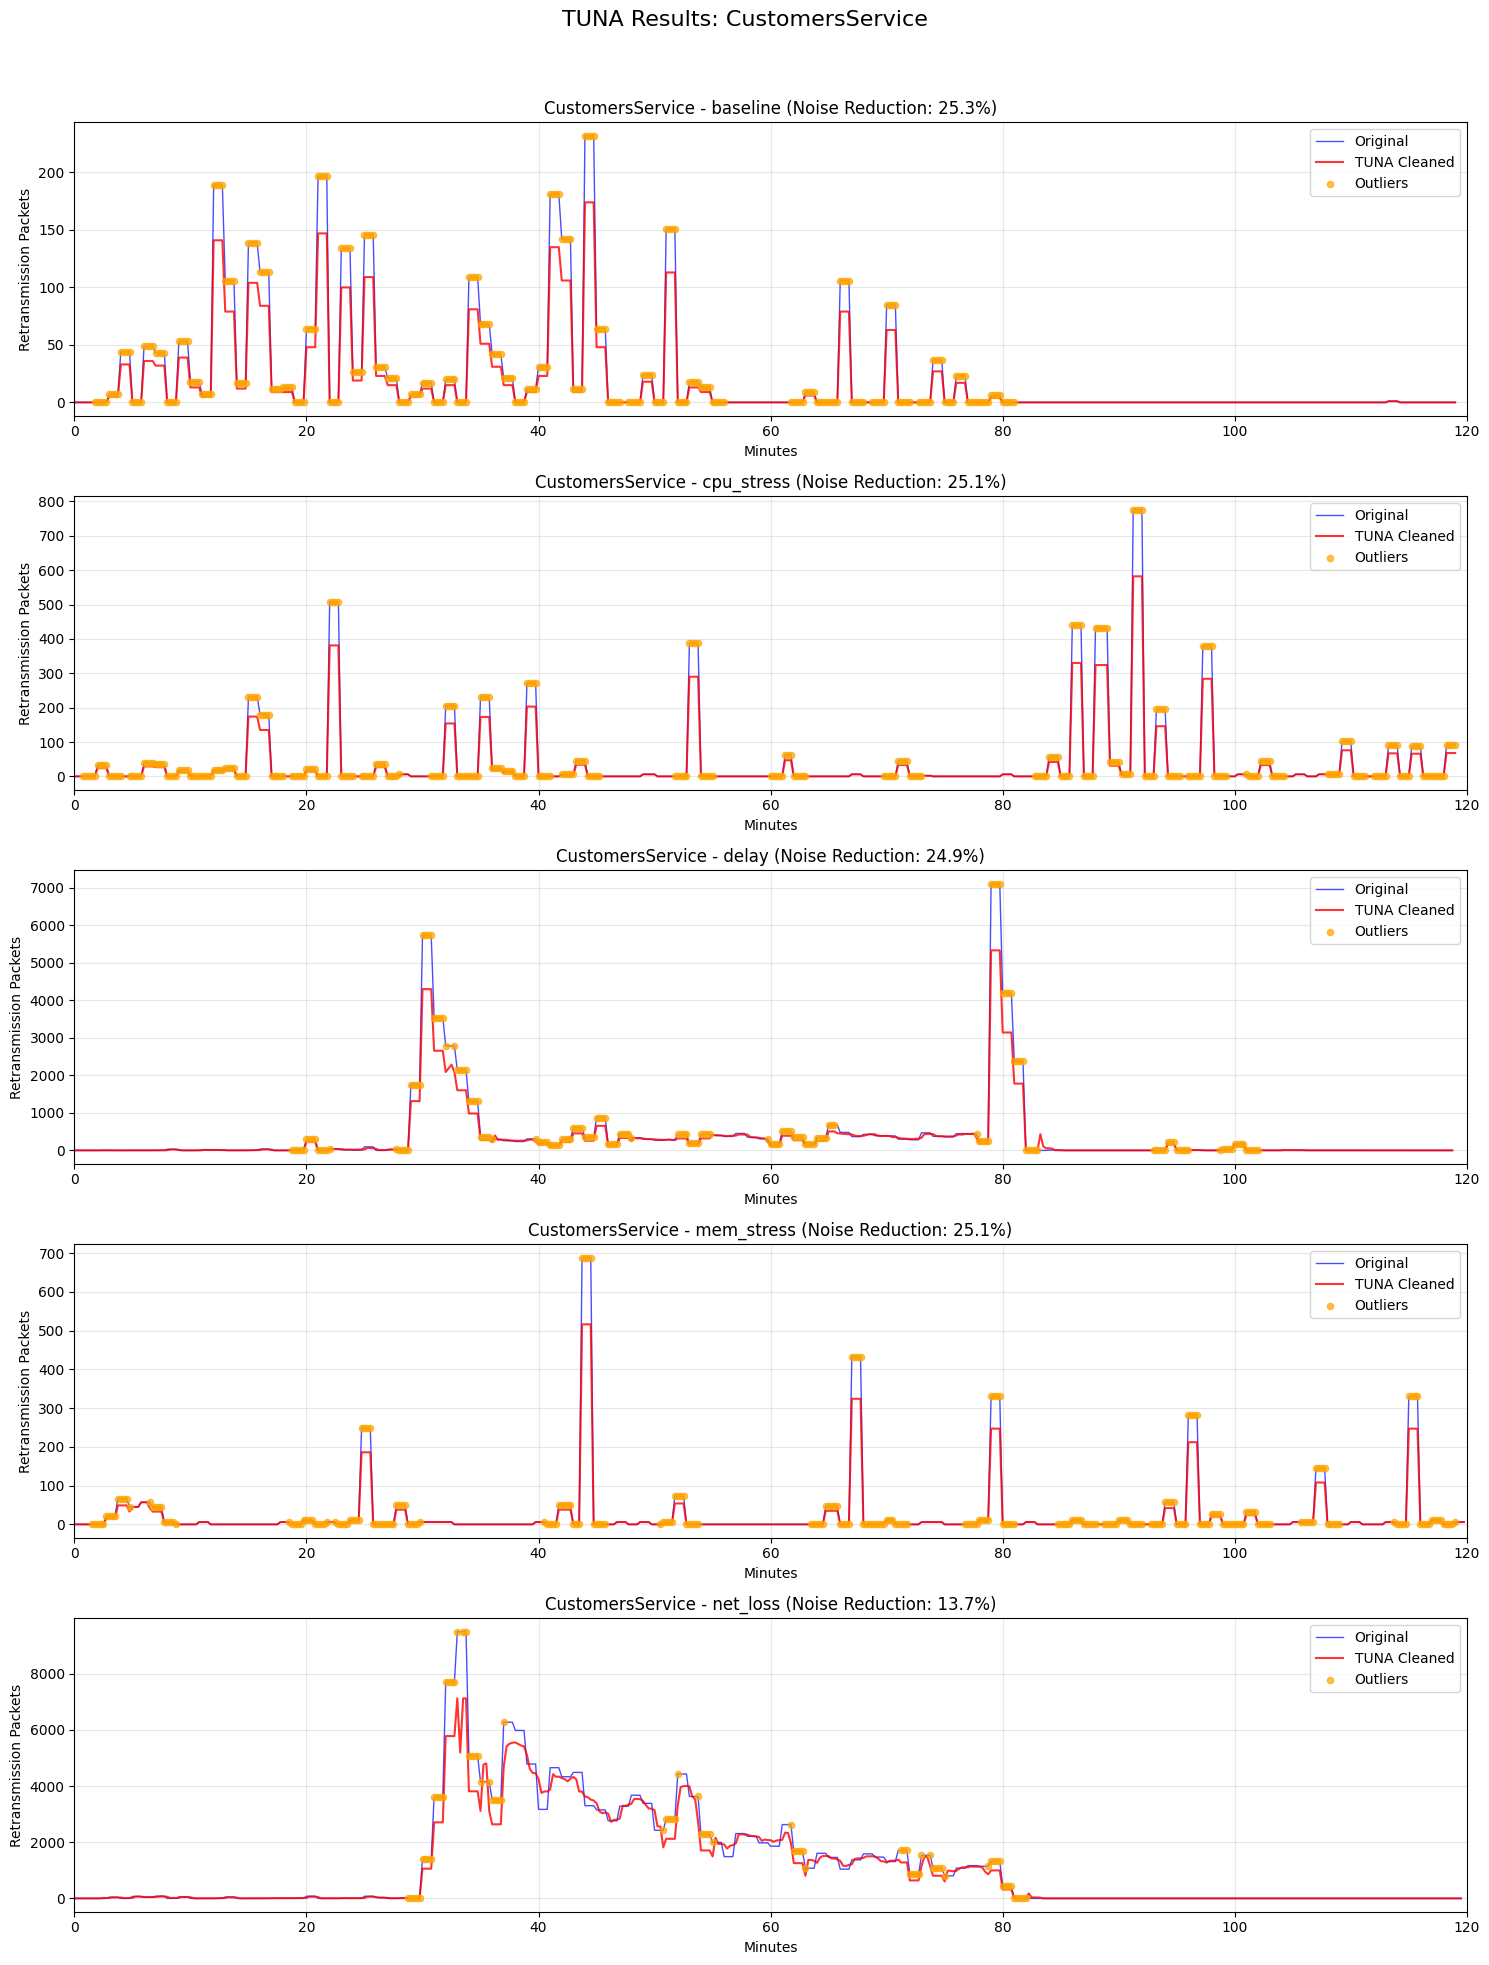

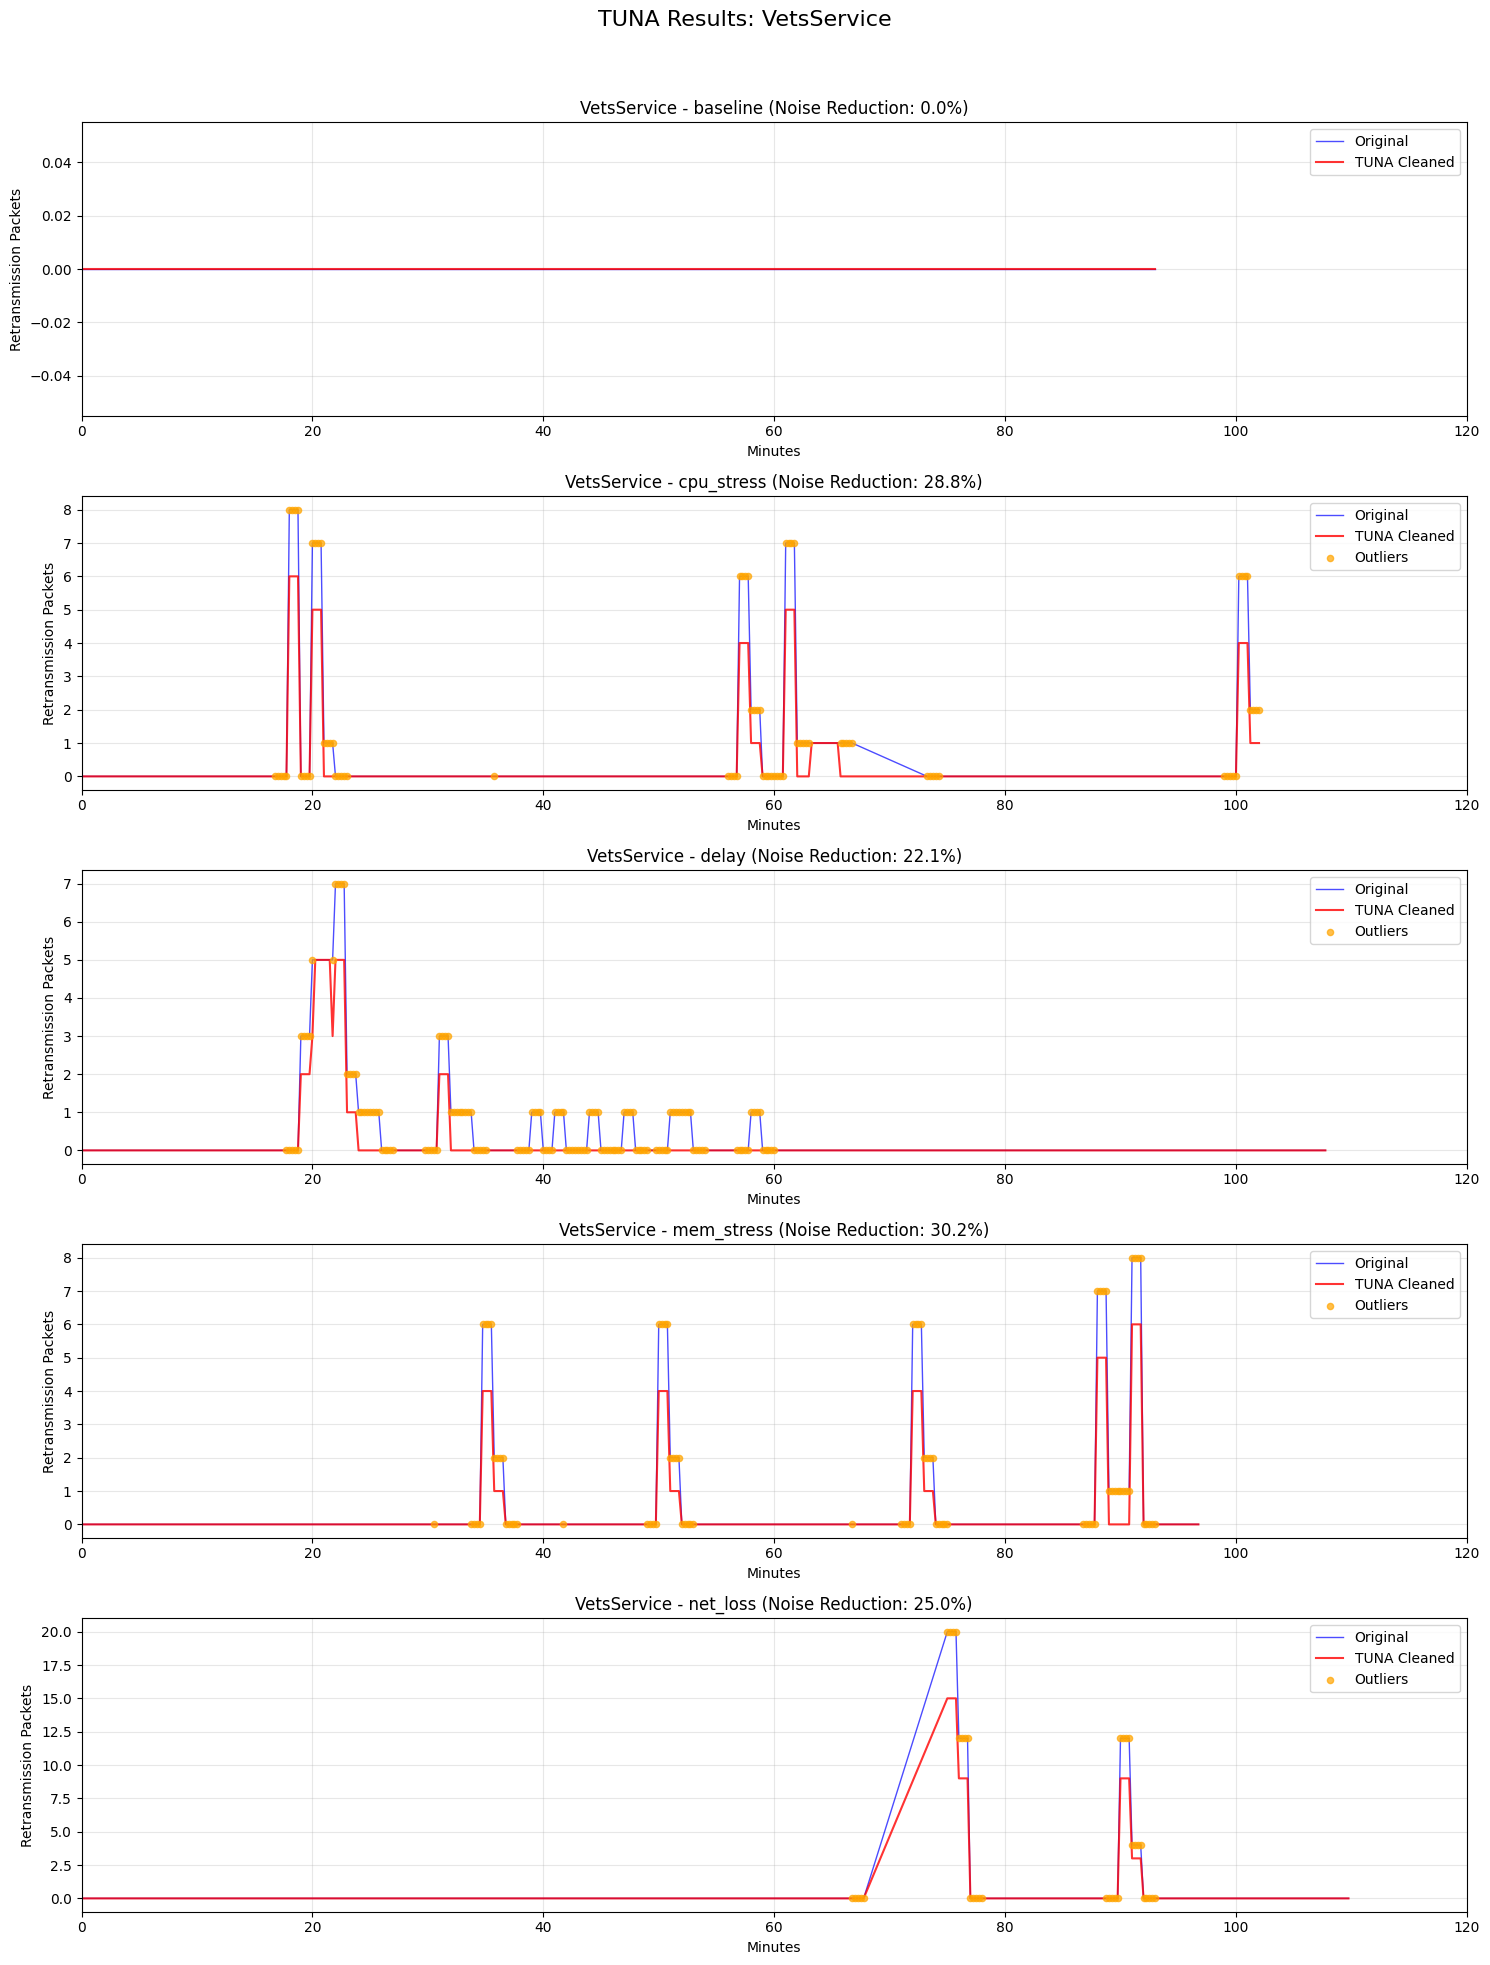

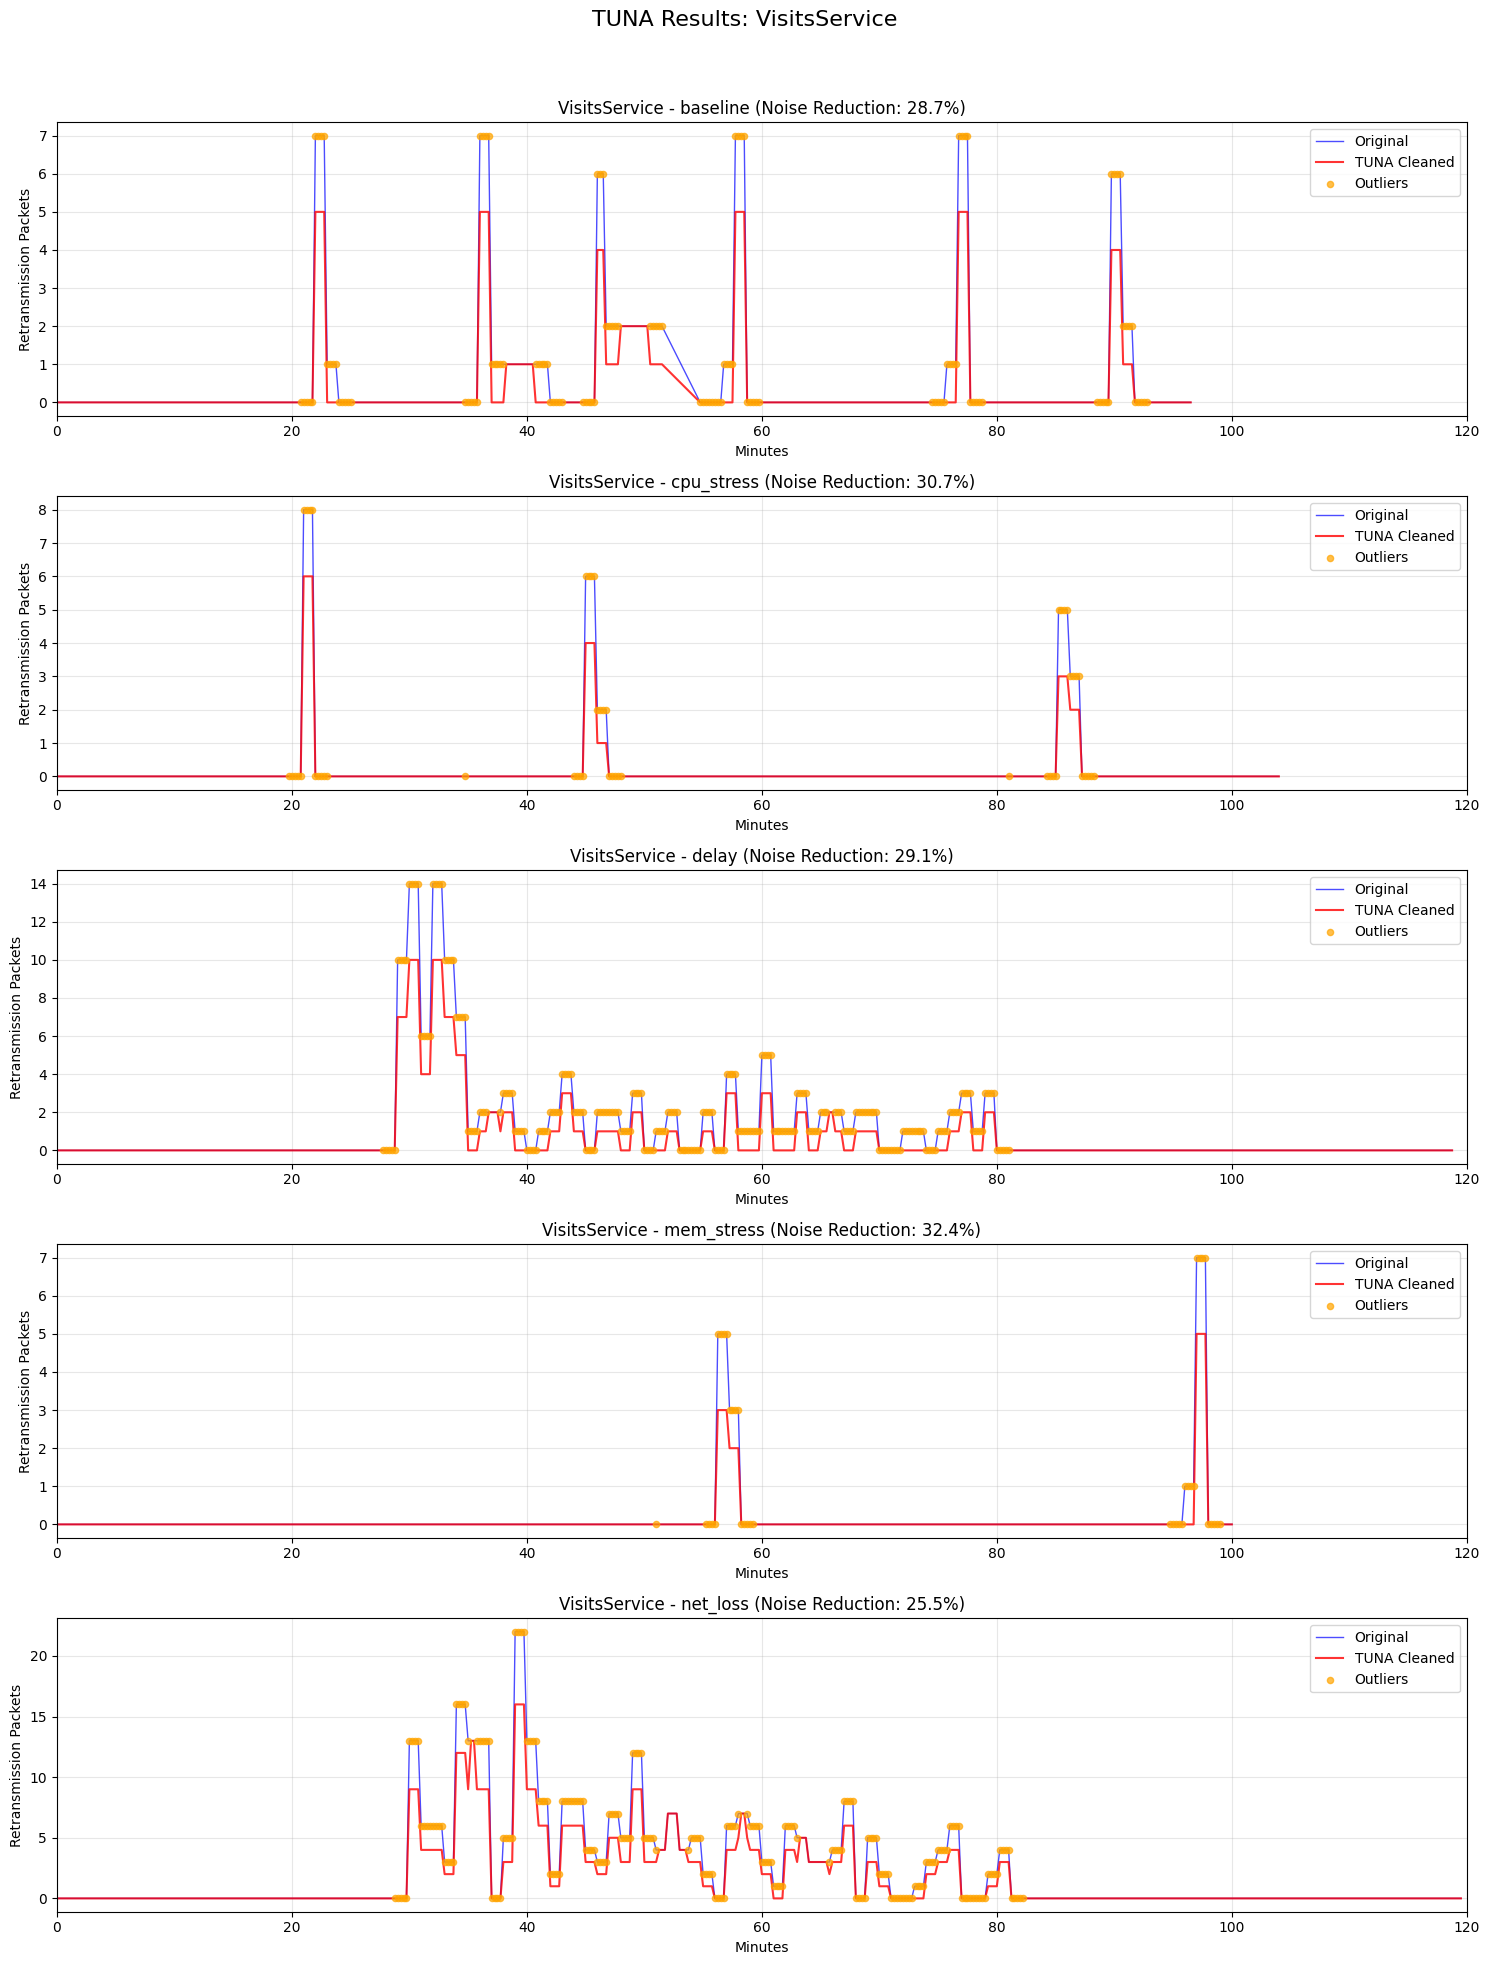

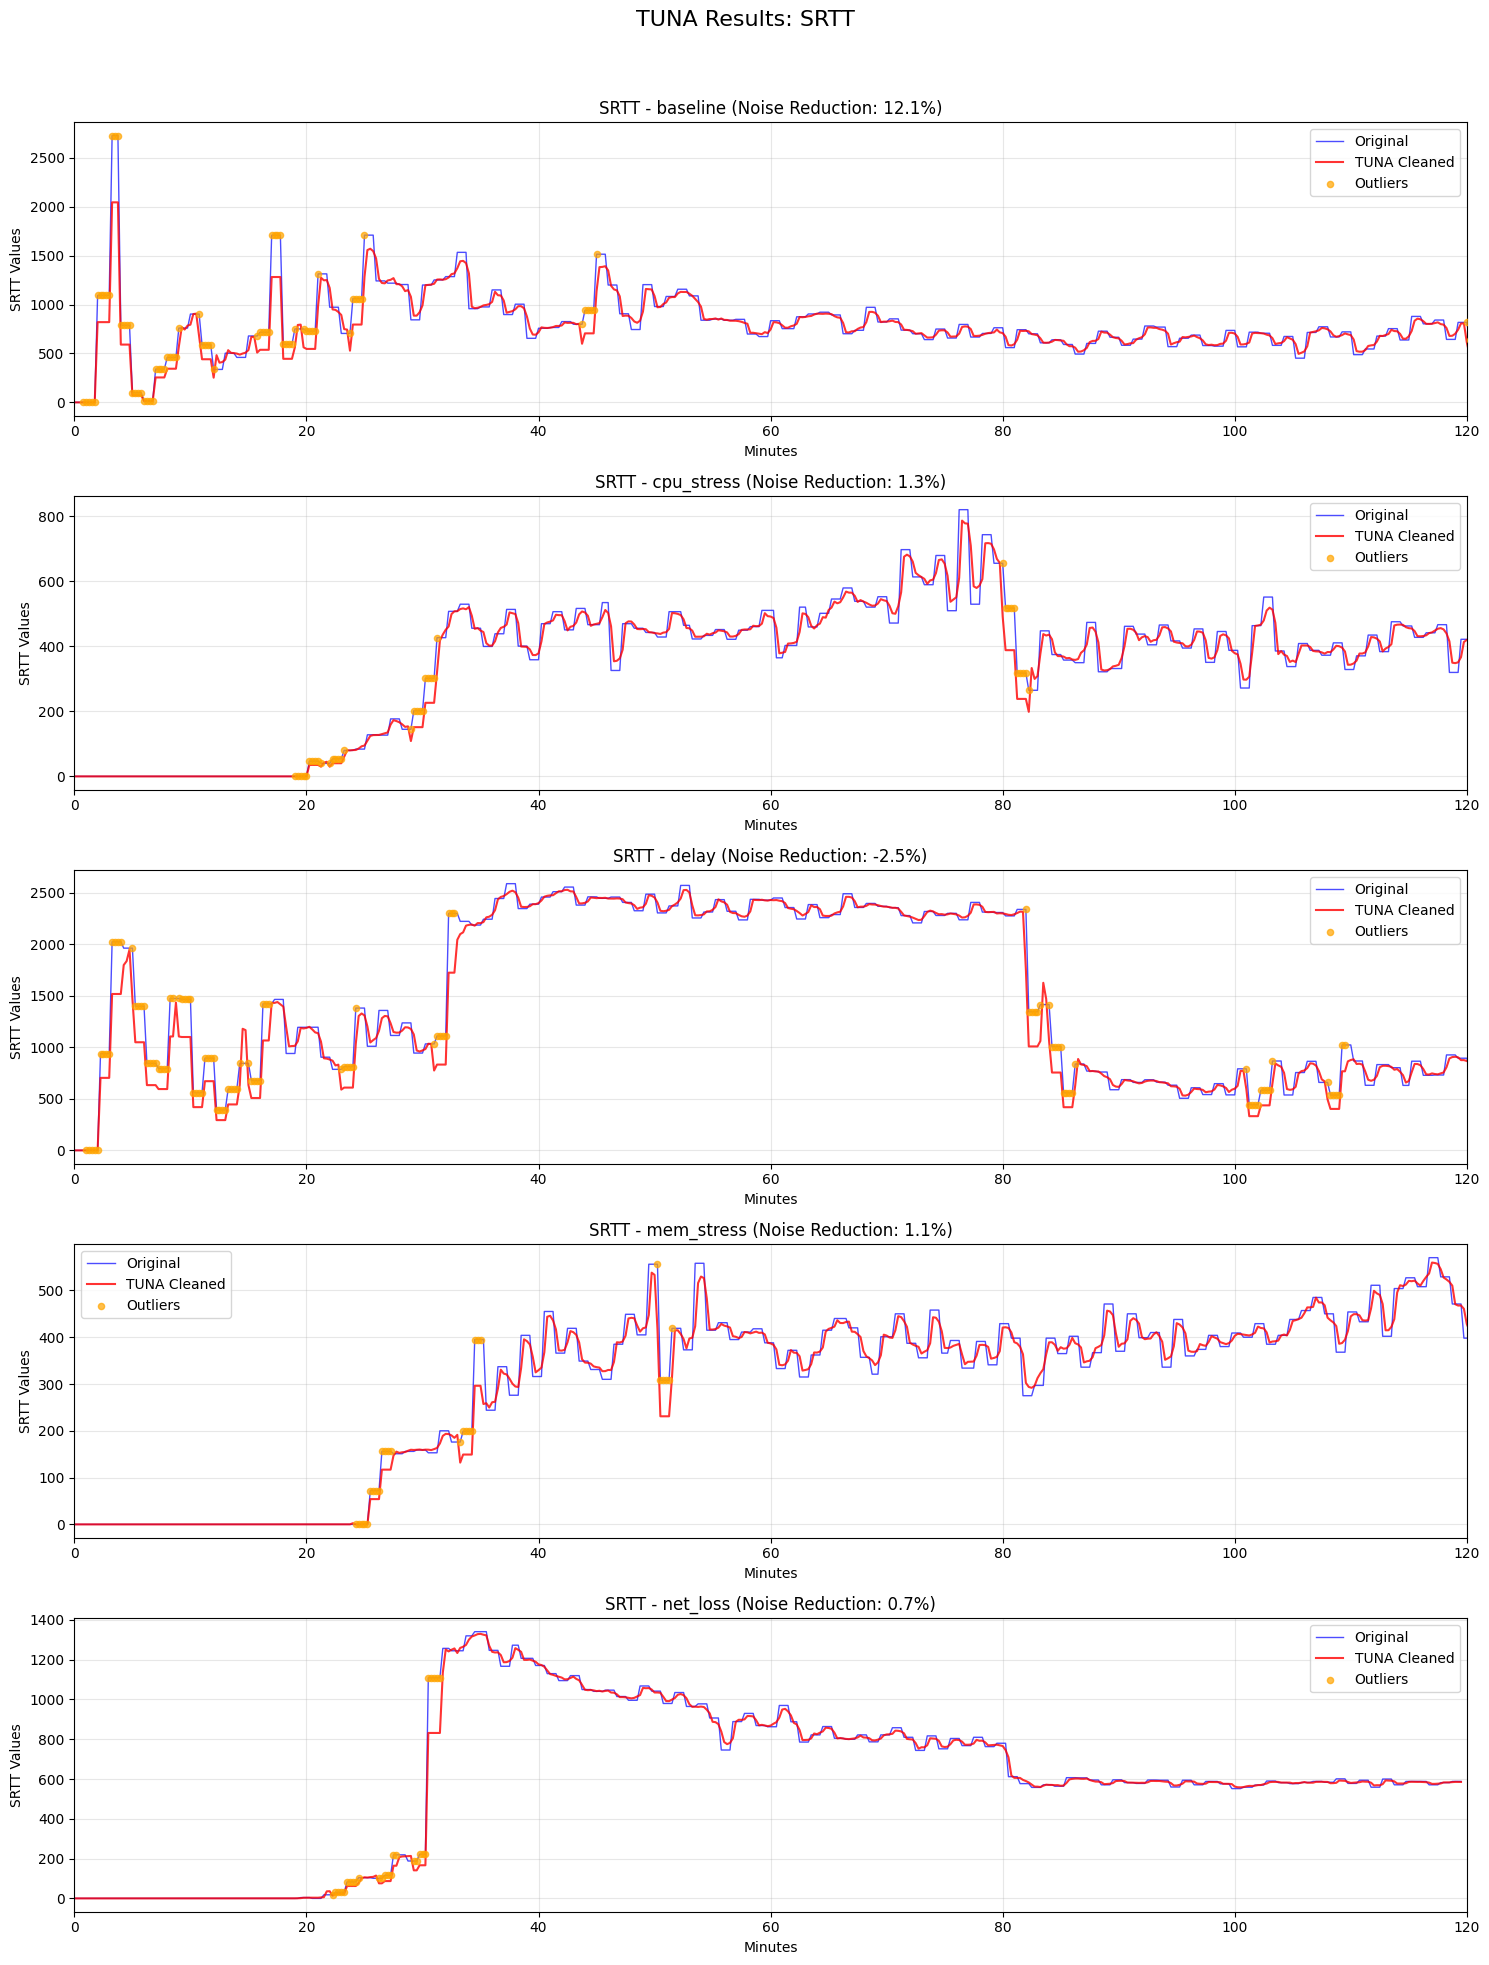


TCP TUNA Results Summary:
Metric          Experiment   Outliers   Noise Red%   Correlation 
------------------------------------------------------------
ApiGateway      baseline     0                 0.0%         nan
ApiGateway      cpu_stress   0                 0.0%         nan
ApiGateway      delay        14               30.8%       1.000
ApiGateway      mem_stress   0                 0.0%         nan
ApiGateway      net_loss     67               10.9%       0.980
CustomersService baseline     290              25.3%       1.000
CustomersService cpu_stress   323              25.1%       1.000
CustomersService delay        165              24.9%       0.998
CustomersService mem_stress   262              25.1%       1.000
CustomersService net_loss     77               13.7%       0.980
VetsService     baseline     0                 0.0%         nan
VetsService     cpu_stress   79               28.8%       0.989
VetsService     delay        132              22.1%       0.939
VetsServi

In [11]:
def extract_tcp_values(df, metric_name):
    """Extract TCP values from datasets (handles both single and multi-column data)"""
    exclude_cols = ['Time', 'Minutes', 'source']
    
    # For TCP metrics, check if we have single or multiple value columns
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if len(value_cols) == 1:
        # Single column (like individual service retransmission data)
        return df[value_cols[0]].values
    else:
        # Multiple columns - for SRTT data, create cumulative metrics
        # Group by service and sum across latency buckets
        if 'srtt' in metric_name.lower():
            # For SRTT data, group by service and sum all latency buckets
            service_groups = {}
            for col in value_cols:
                if '_client_' in col or '_server_' in col:
                    service_name = col.split('_client_')[0] if '_client_' in col else col.split('_server_')[0]
                else:
                    service_name = col
                if service_name not in service_groups:
                    service_groups[service_name] = []
                service_groups[service_name].append(col)
            
            # Sum the first service group (or all if you want total)
            if service_groups:
                first_service = list(service_groups.keys())[0]
                return df[service_groups[first_service]].fillna(0).sum(axis=1).values
            else:
                return df[value_cols].fillna(0).sum(axis=1).values
        else:
            # For other multi-column data, sum all columns
            return df[value_cols].fillna(0).sum(axis=1).values

def detect_outliers_tuna(timeseries, window_size=6, threshold=0.65, min_absolute_range=None):
    """
    TUNA's relative range outlier detection with stability improvements
    Formula: (max - min) / mean > threshold
    Mark all values in unstable windows as outliers
    """
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    
    # Calculate adaptive minimum absolute range if not provided
    if min_absolute_range is None:
        # Use 5% of the overall time series standard deviation as minimum range
        min_absolute_range = 0.1 * np.std(timeseries)
    
    # Slide window across time series to detect unstable periods
    for i in range(len(timeseries) - window_size + 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0:
            # Apply TUNA relative range criterion
            relative_range = window_range / window_mean
            
            # Additional filter: require minimum absolute range to avoid hypersensitivity
            if relative_range > threshold and window_range > min_absolute_range:
                # Mark all values within unstable window as outliers
                for j in range(window_size):
                    actual_idx = i + j
                    outlier_mask[actual_idx] = True
    
    return outlier_mask

def create_features_for_ml(timeseries, experiment_type, window_size=10):
    """Create features for RandomForest training"""
    features = []
    
    # Extract temporal and statistical features from sliding windows
    for i in range(window_size, len(timeseries)):
        window = timeseries[i-window_size:i]
        
        # Statistical features from recent history
        feature_vector = [
            np.mean(window),                    # Rolling average
            np.std(window),                     # Variability measure
            np.median(window),                  # Robust central tendency
            np.max(window) - np.min(window),    # Range indicator
            timeseries[i-1],                    # Previous value dependency
            i / len(timeseries),                # Temporal position
        ]
        
        # Experiment context encoding for cross-experiment learning
        exp_features = [0, 0, 0, 0, 0]
        if experiment_type == "baseline":
            exp_features[0] = 1
        elif experiment_type == "cpu_stress":
            exp_features[1] = 1
        elif experiment_type == "delay":
            exp_features[2] = 1
        elif experiment_type == "mem_stress":
            exp_features[3] = 1
        elif experiment_type == "net_loss":
            exp_features[4] = 1
        
        feature_vector.extend(exp_features)
        features.append(feature_vector)
    
    return np.array(features)

def train_random_forest_for_metric(metric_name, all_experiments):
    """Train RandomForest on stable periods across all experiments"""
    print(f"Training {metric_name}...")
    
    X_stable_all = []
    y_stable_all = []
    
    # Aggregate stable training data from all experimental conditions
    for exp_name, df in all_experiments.items():
        tcp_values = extract_tcp_values(df, metric_name)
        outlier_mask = detect_outliers_tuna(tcp_values)
        stable_mask = ~outlier_mask
        
        features = create_features_for_ml(tcp_values, exp_name)
        # Align feature window with stability detection
        stable_features_mask = stable_mask[10:]
        stable_features = features[stable_features_mask]
        stable_targets = tcp_values[10:][stable_features_mask]
        
        if len(stable_features) > 0:
            # Apply local smoothing to targets for better generalization
            smoothed_targets = []
            for j, target in enumerate(stable_targets):
                start_idx = max(0, j-2)
                end_idx = min(len(stable_targets), j+3)
                local_values = stable_targets[start_idx:end_idx]
                smoothed_targets.append(np.median(local_values))
            
            X_stable_all.extend(stable_features)
            y_stable_all.extend(smoothed_targets)
    
    # Ensure sufficient training data
    if len(X_stable_all) < 10:
        return None, None
    
    X_stable_all = np.array(X_stable_all)
    y_stable_all = np.array(y_stable_all)
    
    # Standardize features for optimal model performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_stable_all)

    # Hyperparameter grid for model optimization
    param_grid = {
        'n_estimators': [100],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    model = RandomForestRegressor(
        criterion='squared_error',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )

    # Grid search with cross-validation for robust parameter selection
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_scaled, y_stable_all)
    model = grid_search.best_estimator_
    
    return model, scaler

def apply_penalty(timeseries, outlier_mask, penalty_factor=0.75):
    """Apply penalty to outliers by reducing their magnitude"""
    cleaned_series = timeseries.copy()
    
    # Apply penalty exactly once to each outlier
    outlier_indices = np.where(outlier_mask)[0]
    for i in outlier_indices:
        original_value = timeseries[i]
        if original_value != 0:  # Only apply penalty to non-zero values
            # Simple penalty: reduce magnitude by factor
            cleaned_series[i] = original_value * penalty_factor
        # Zero values remain zero (no penalty needed)
    
    return cleaned_series

def apply_tuna_to_single_series(tcp_values, exp_name, model, scaler, penalty_factor=0.75, blend_weight=1.0, metric_name=""):
    """Apply TUNA cleaning to a single TCP time series with ML + penalty"""
    
    # Check data characteristics for smart ML application
    unique_values = len(np.unique(tcp_values))
    data_range = np.max(tcp_values) - np.min(tcp_values)
    zero_percentage = np.sum(tcp_values == 0) / len(tcp_values) * 100
    
    # Enhanced discrete data detection for TCP retransmission patterns
    is_discrete_data = (
        unique_values <= 10 and data_range <= 50  # Low variety and range
        or zero_percentage > 60  # High percentage of zeros (common in retrans data)
        or (unique_values <= 20 and all(x == int(x) for x in np.unique(tcp_values) if not np.isnan(x)))  # All integers
    )
    
    # Phase 1: Identify unstable measurements with adjusted parameters for TCP data
    if any(service in metric_name.lower() for service in ['apigateway', 'customers', 'vets', 'visits']) or zero_percentage > 50:
        # For retransmission data, use more sensitive outlier detection
        outlier_mask = detect_outliers_tuna(tcp_values, window_size=6, threshold=0.65)
    else:
        # Standard outlier detection for continuous metrics
        outlier_mask = detect_outliers_tuna(tcp_values)
    
    stable_mask = ~outlier_mask
    outliers_count = np.sum(outlier_mask)
    
    # Phase 2: Apply penalty to outliers FIRST
    cleaned_series = apply_penalty(tcp_values, outlier_mask, penalty_factor)
    
    # Phase 3: Apply ML enhancement only for appropriate data types
    if not is_discrete_data and model is not None and scaler is not None:
        try:
            # Create features for ML prediction
            features = create_features_for_ml(tcp_values, exp_name)
            features_scaled = scaler.transform(features)
            ml_predictions = model.predict(features_scaled)
            
            # Apply 100% ML for stable periods only (excluding outliers)
            for i, prediction in enumerate(ml_predictions):
                actual_idx = i + 10  # Account for feature window offset
                if (actual_idx < len(cleaned_series) and 
                    stable_mask[actual_idx] and 
                    not outlier_mask[actual_idx]):  # Ensure outliers don't get ML override
                    cleaned_series[actual_idx] = prediction
            
            # Ensure non-negative values for count data
            if any(service in metric_name.lower() for service in ['apigateway', 'customers', 'vets', 'visits']):
                cleaned_series = np.maximum(0, cleaned_series)
            
            print(f"  ✓ Applied ML + penalty (factor: {penalty_factor}) for {metric_name} - {exp_name}")
            
        except Exception as e:
            print(f"  ⚠ ML enhancement failed for {metric_name} - {exp_name}: {str(e)}")
    else:
        if is_discrete_data:
            print(f"  ℹ Applied penalty-only (factor: {penalty_factor}) for {metric_name} - {exp_name} (discrete data)")
        else:
            print(f"  ℹ Applied penalty-only (factor: {penalty_factor}) for {metric_name} - {exp_name} (no model)")
    
    # Calculate cleaning statistics
    original_std = np.std(tcp_values)
    cleaned_std = np.std(cleaned_series)
    noise_reduction = (original_std - cleaned_std) / original_std * 100 if original_std > 0 else 0
    correlation = np.corrcoef(tcp_values, cleaned_series)[0, 1] if len(tcp_values) > 1 else 1.0
    
    cleaning_stats = {
        'outliers': outliers_count,
        'outlier_percentage': (outliers_count / len(tcp_values)) * 100,
        'noise_reduction': noise_reduction,
        'correlation': correlation,
        'mean_before': np.mean(tcp_values),
        'mean_after': np.mean(cleaned_series),
        'std_before': original_std,
        'std_after': cleaned_std,
        'zero_percentage': zero_percentage,
        'unique_values': unique_values,
        'data_type': 'discrete' if is_discrete_data else 'continuous',
        'penalty_factor': penalty_factor
    }
    
    return cleaned_series, outlier_mask, cleaning_stats

def run_tuna_for_all_metrics():
    """Run TUNA for all TCP metrics"""
    print("Running TUNA analysis on TCP datasets...")
    
    tuna_results = {}
    
    # Process each TCP metric independently
    for metric_name, experiments in all_datasets.items():
        print(f"Processing {metric_name}")
        
        # Train metric-specific model on cross-experiment stable data
        model, scaler = train_random_forest_for_metric(metric_name, experiments)
        
        # Apply cleaning to each experimental condition
        metric_results = {}
        for exp_name, df in experiments.items():
            tcp_values = extract_tcp_values(df, metric_name)
            cleaned_series, outlier_mask, stats = apply_tuna_to_single_series(
                tcp_values, exp_name, model, scaler, metric_name=metric_name
            )
            
            metric_results[exp_name] = {
                'original': tcp_values,
                'cleaned': cleaned_series,
                'outliers': outlier_mask,
                'stats': stats
            }
        
        tuna_results[metric_name] = metric_results
    
    return tuna_results

def plot_tuna_results(tuna_results):
    """Plot TUNA results with original vs cleaned comparison using Minutes (0-120) x-axis"""
    
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4*n_experiments))
        
        if n_experiments == 1:
            axes = [axes]
        
        # Visualize cleaning results for each experiment
        for i, (exp_name, results) in enumerate(metric_results.items()):
            original = results['original']
            cleaned = results['cleaned']
            outliers = results['outliers']
            stats = results['stats']
            
            # Get the corresponding dataframe to extract Minutes column
            df = all_datasets[metric_name][exp_name]
            minutes = df['Minutes'].values
            
            # Plot time series with cleaning overlay using Minutes as x-axis
            axes[i].plot(minutes, original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(minutes, cleaned, 'r-', alpha=0.8, label='TUNA Cleaned', linewidth=1.5)
            
            # Highlight detected outliers
            outlier_points = np.where(outliers)[0]
            if len(outlier_points) > 0:
                axes[i].scatter(minutes[outlier_points], original[outlier_points], 
                               c='orange', s=20, alpha=0.7, label='Outliers', zorder=5)
            
            # Set appropriate y-axis label based on metric
            if 'srtt' in metric_name.lower():
                y_label = 'SRTT Values'
            elif any(service in metric_name.lower() for service in ['apigateway', 'customers', 'visits', 'vets']):
                y_label = 'Retransmission Packets'
            else:
                y_label = 'TCP Values'
            
            axes[i].set_title(f'{metric_name} - {exp_name} (Noise Reduction: {stats["noise_reduction"]:.1f}%)')
            axes[i].set_xlabel('Minutes')
            axes[i].set_ylabel(y_label)
            axes[i].set_xlim(0, 120) 
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle(f'TUNA Results: {metric_name}', fontsize=16, y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def print_tuna_summary(tuna_results):
    """Print summary table of cleaning effectiveness"""
    print("\nTCP TUNA Results Summary:")
    print("="*60)
    print(f"{'Metric':<15} {'Experiment':<12} {'Outliers':<10} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*60)
    
    # Tabulate results across all metrics and experiments
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            stats = results['stats']
            print(f"{metric_name:<15} {exp_name:<12} {stats['outliers']:<10} "
                  f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

# Execute complete TUNA analysis pipeline
tuna_results = run_tuna_for_all_metrics()
plot_tuna_results(tuna_results)
print_tuna_summary(tuna_results)


COMPREHENSIVE TCP METRICS ANALYSIS
Each metric (retransmissions/network traffic) under stress will be compared to its own baseline


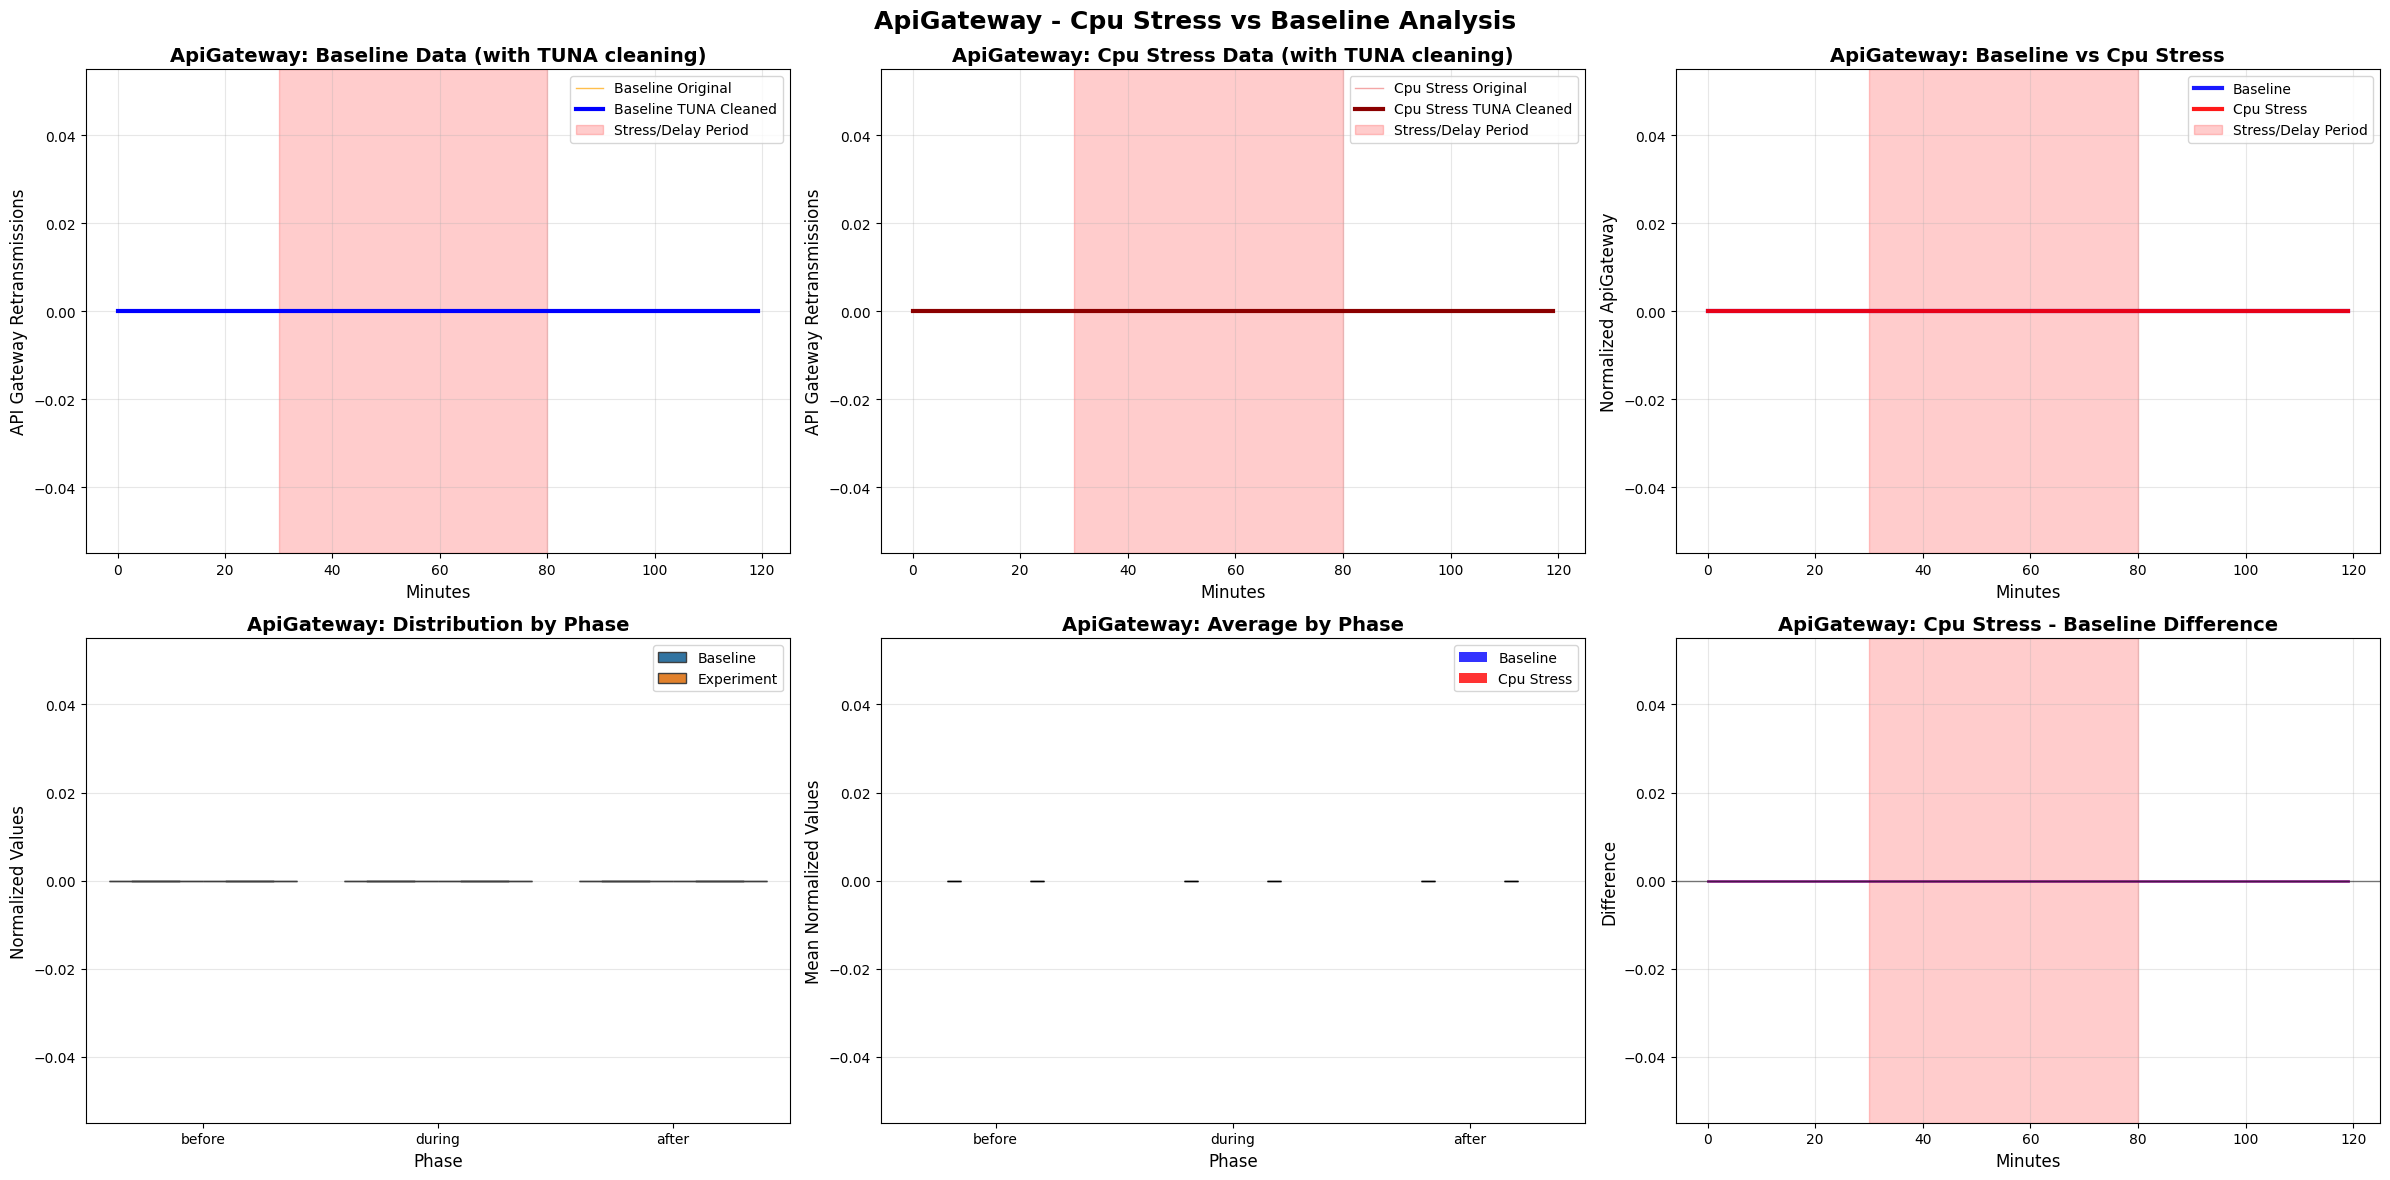


APIGATEWAY - CPU STRESS VS BASELINE ANALYSIS
Comparing: ApiGateway under cpu_stress stress vs ApiGateway baseline

TUNA CLEANING SUMMARY:
  CPU STRESS: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan
  BASELINE: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

CPU STRESS STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=   nan, p=     nan (NOT SIGNIFICANT)
  DURING  : t=   nan, p=     nan (NOT SIGNIFICANT)
  AFTER   : t=   nan, p=     nan (NOT SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
 

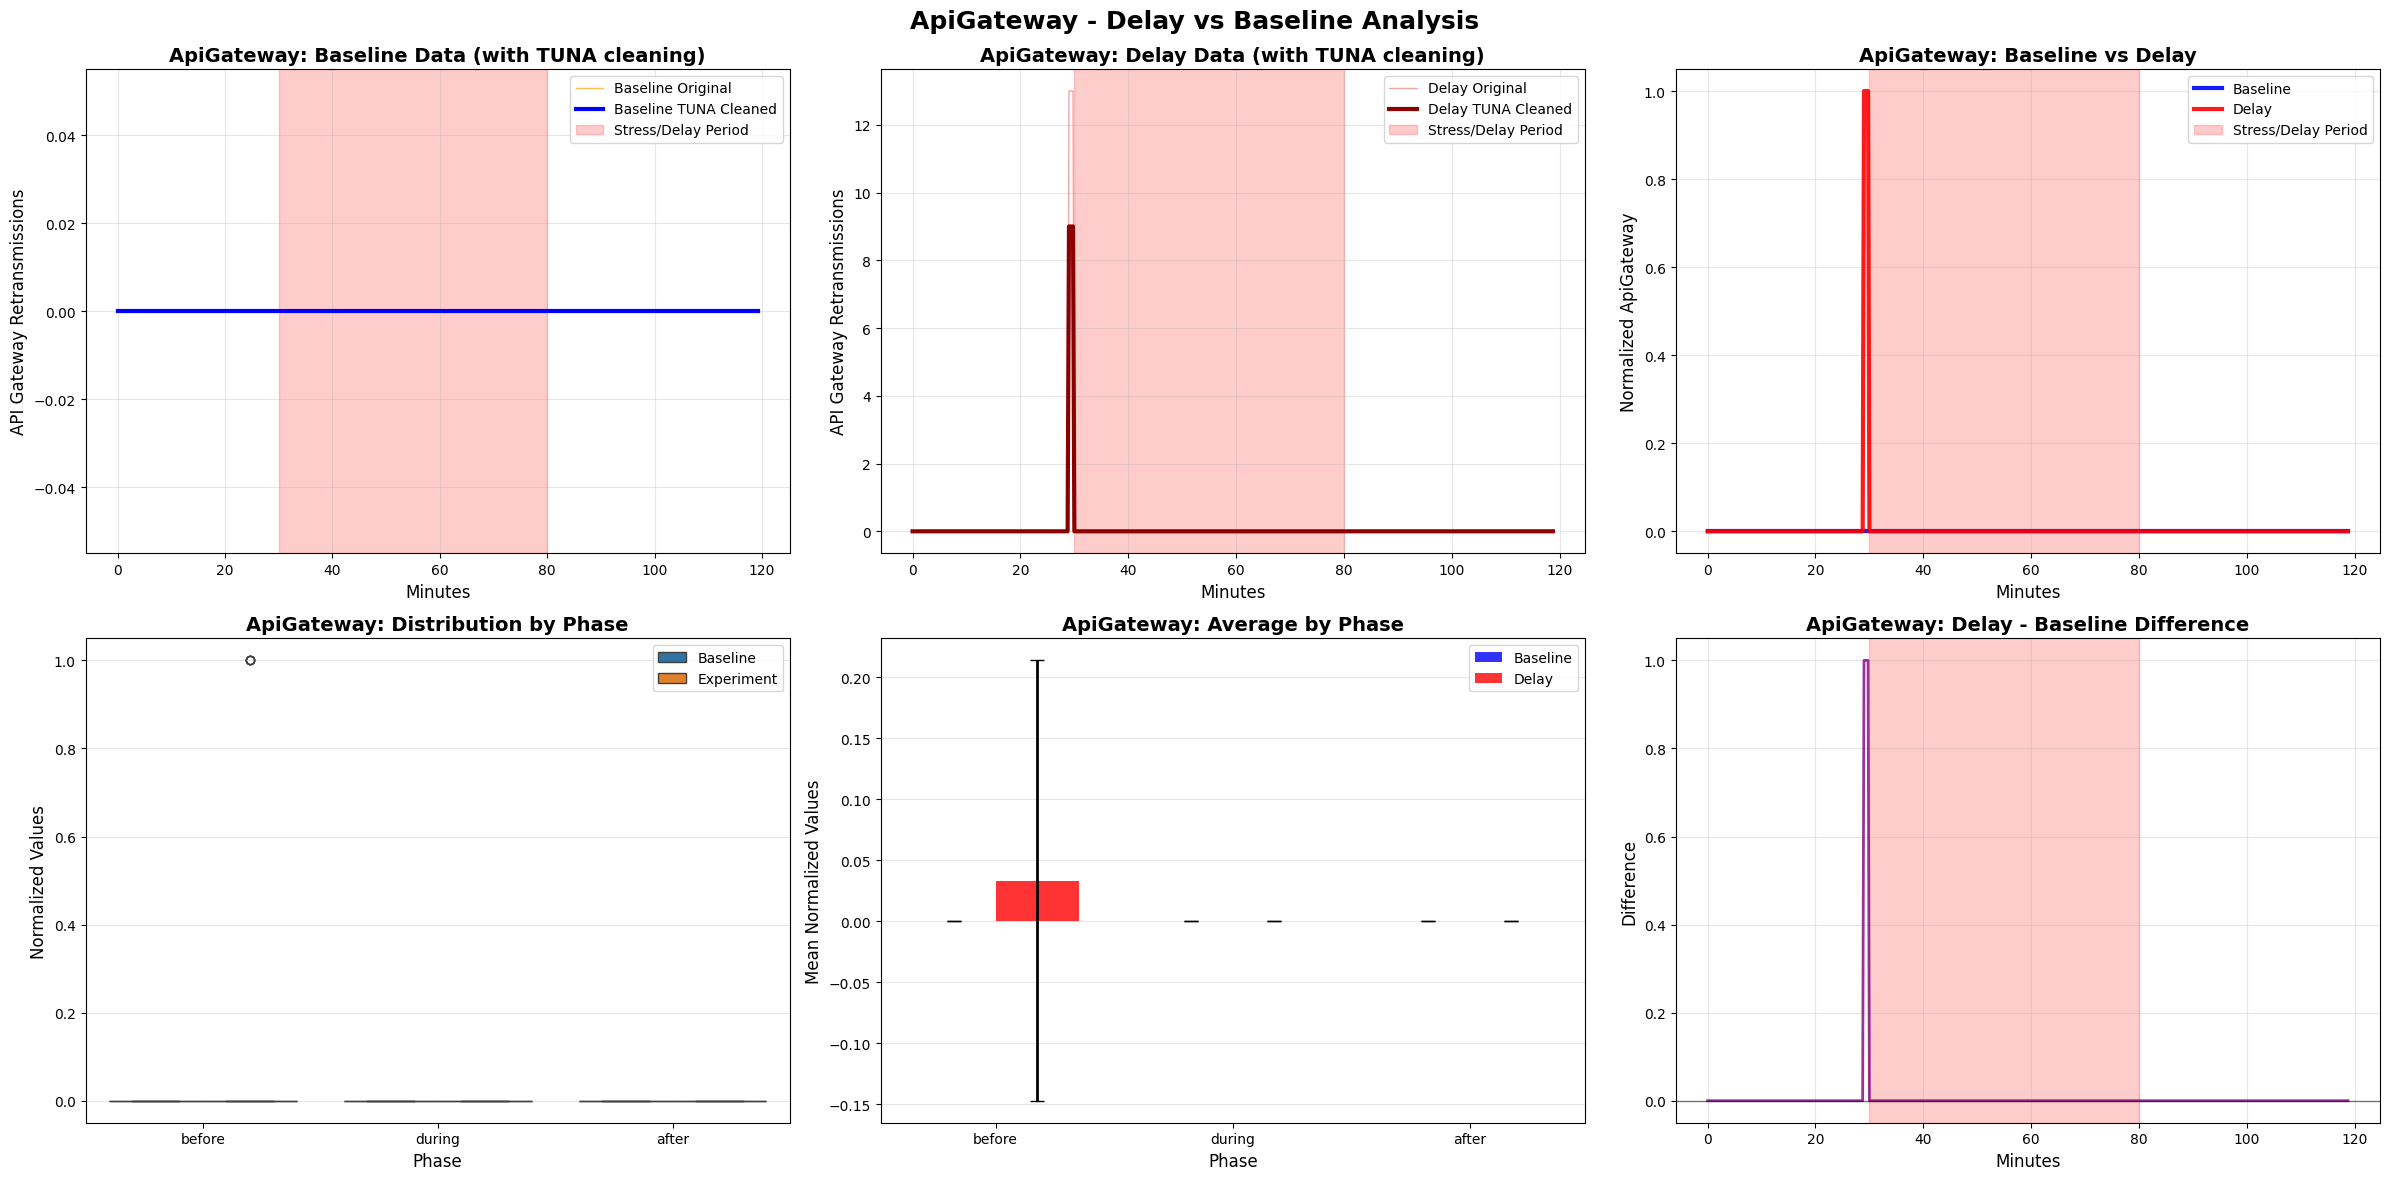


APIGATEWAY - DELAY VS BASELINE ANALYSIS
Comparing: ApiGateway under delay stress vs ApiGateway baseline

TUNA CLEANING SUMMARY:
  DELAY: 14 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 30.8%, Correlation: 1.000
  BASELINE: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

DELAY STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.0000  0.0000  0.0  0.0
before  0.0333  0.1803  0.0  1.0
during  0.0000  0.0000  0.0  0.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -2.03, p=  0.0439 (SIGNIFICANT)
  DURING  : t=   nan, p=     nan (NOT SIGNIFICANT)
  AFTER   : t=   nan, p=     nan (NOT SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
 

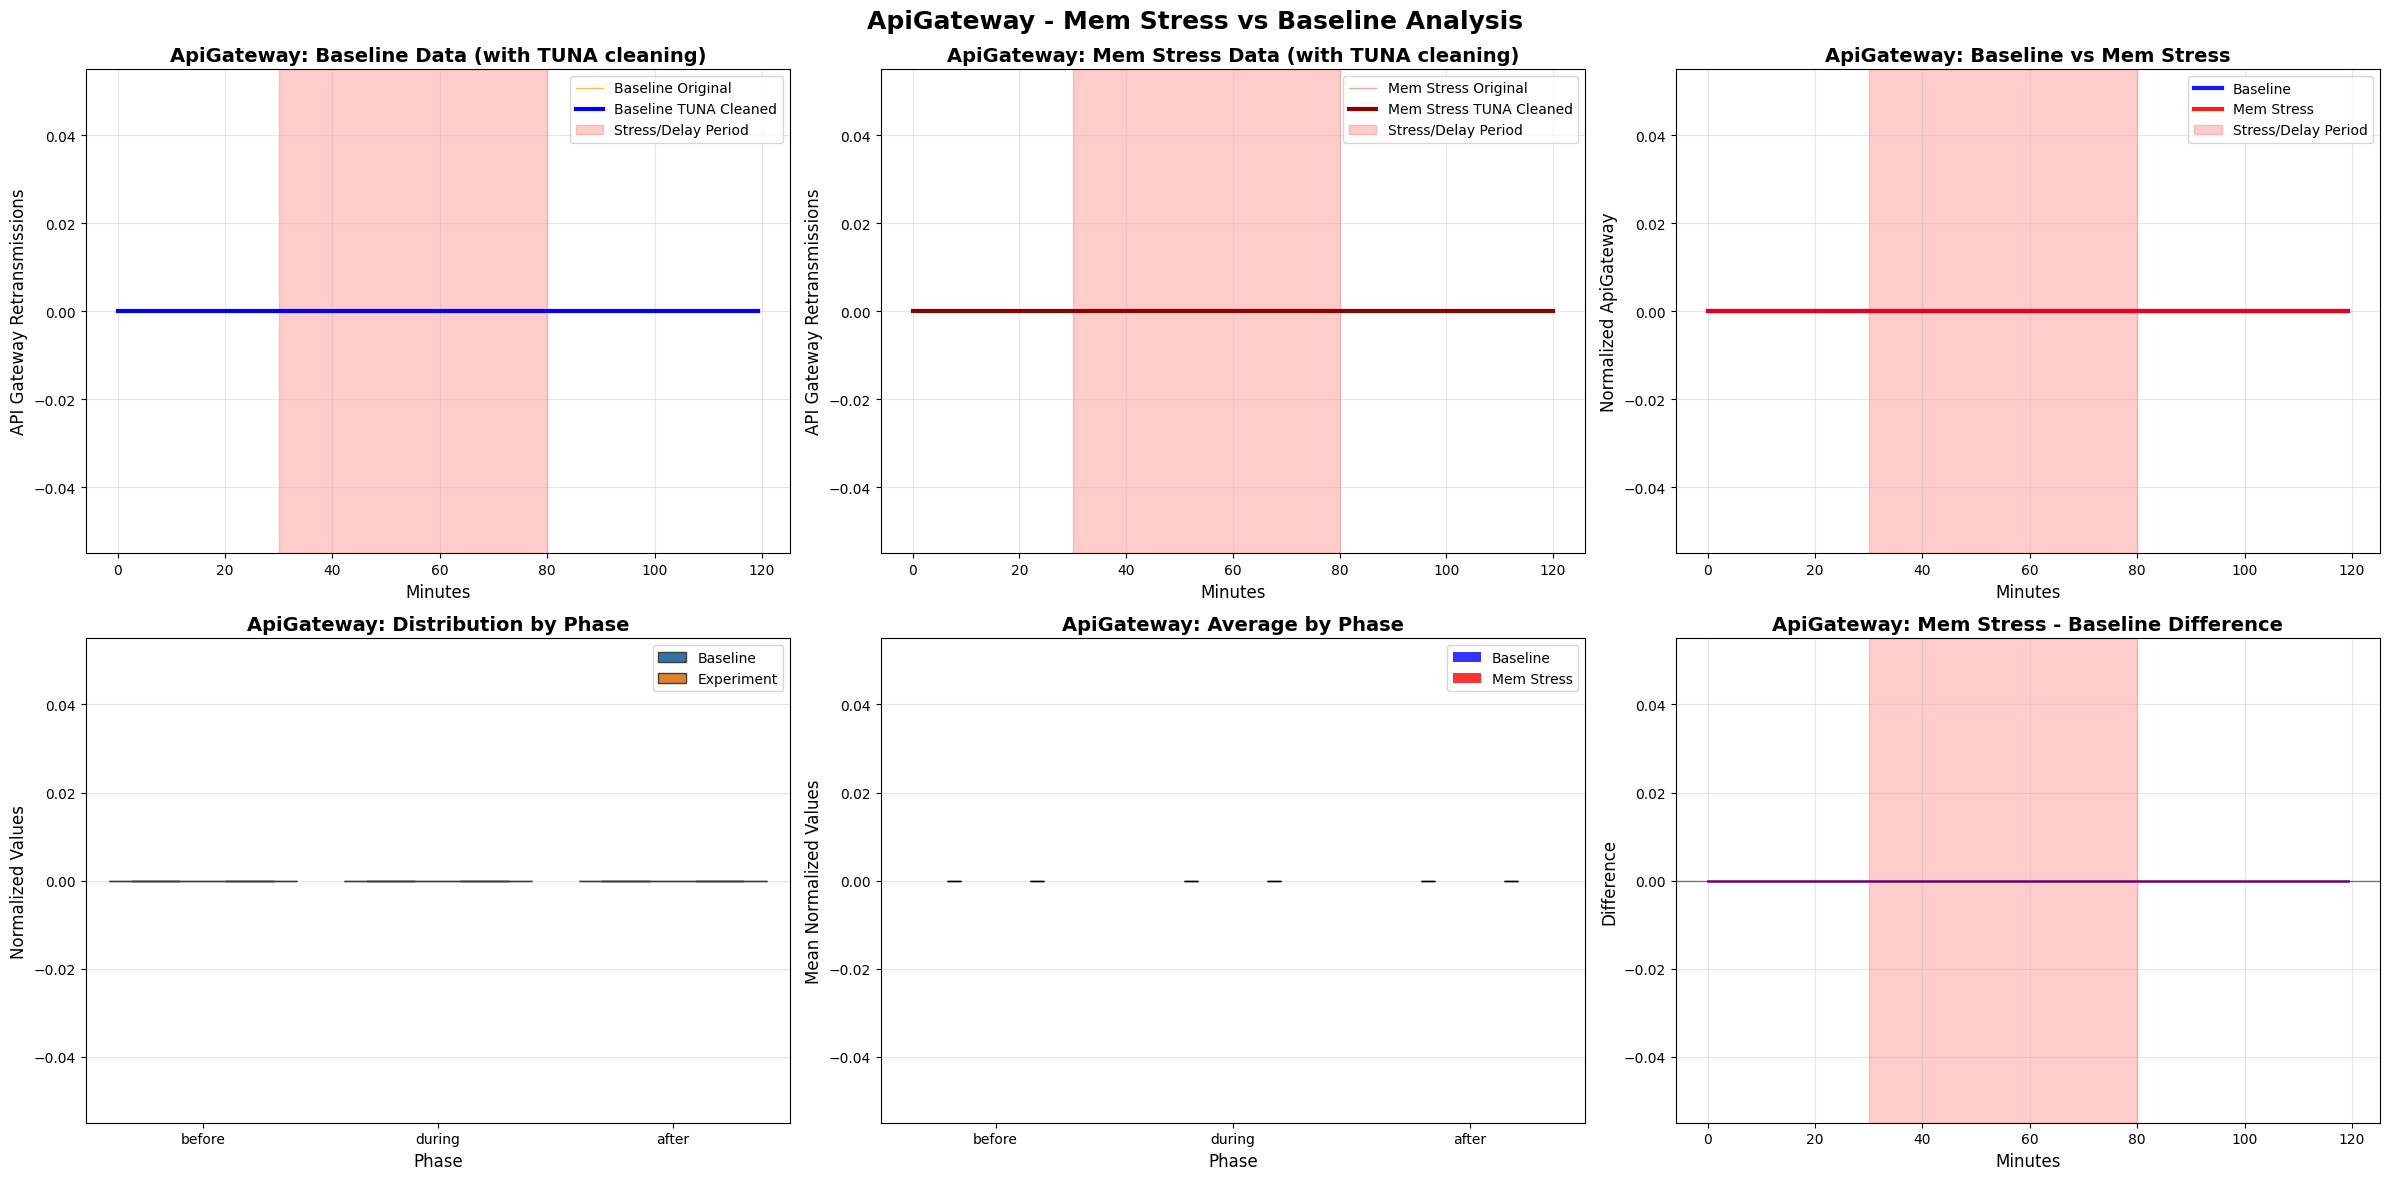


APIGATEWAY - MEM STRESS VS BASELINE ANALYSIS
Comparing: ApiGateway under mem_stress stress vs ApiGateway baseline

TUNA CLEANING SUMMARY:
  MEM STRESS: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan
  BASELINE: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

MEM STRESS STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=   nan, p=     nan (NOT SIGNIFICANT)
  DURING  : t=   nan, p=     nan (NOT SIGNIFICANT)
  AFTER   : t=   nan, p=     nan (NOT SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
 

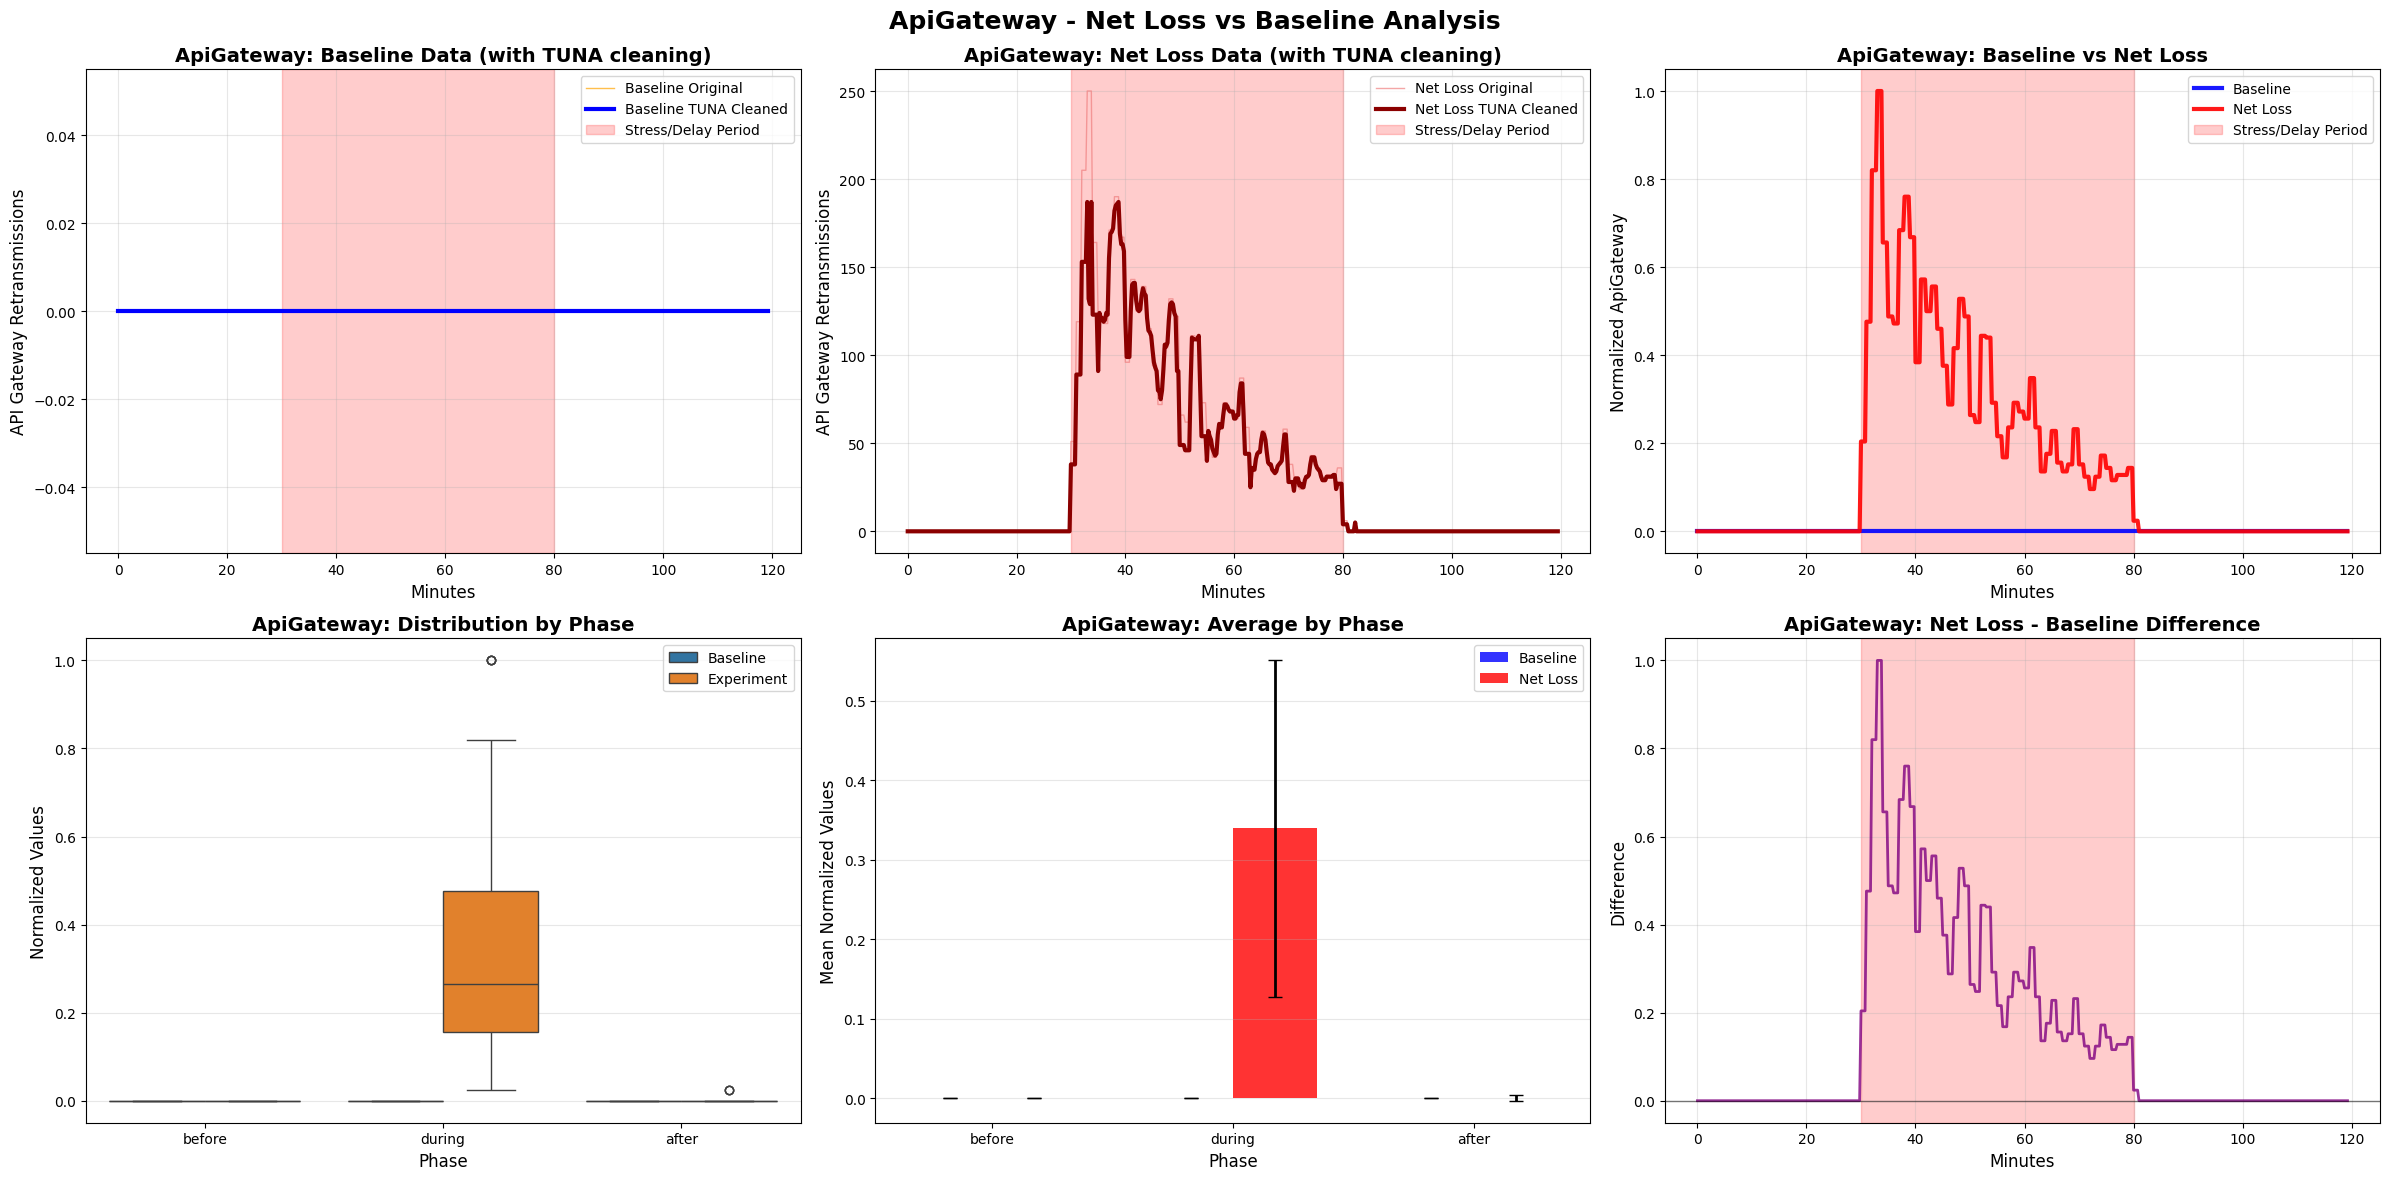


APIGATEWAY - NET LOSS VS BASELINE ANALYSIS
Comparing: ApiGateway under net_loss stress vs ApiGateway baseline

TUNA CLEANING SUMMARY:
  NET LOSS: 67 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 10.9%, Correlation: 0.980
  BASELINE: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

NET LOSS STATISTICS BY PHASE:
          mean     std    min    max
phase                               
after   0.0005  0.0033  0.000  0.024
before  0.0000  0.0000  0.000  0.000
during  0.3395  0.2114  0.024  1.000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=   nan, p=     nan (NOT SIGNIFICANT)
  DURING  : t=-22.77, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -1.74, p=  0.0823 (NOT SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :   +0.00% (NO CHANG

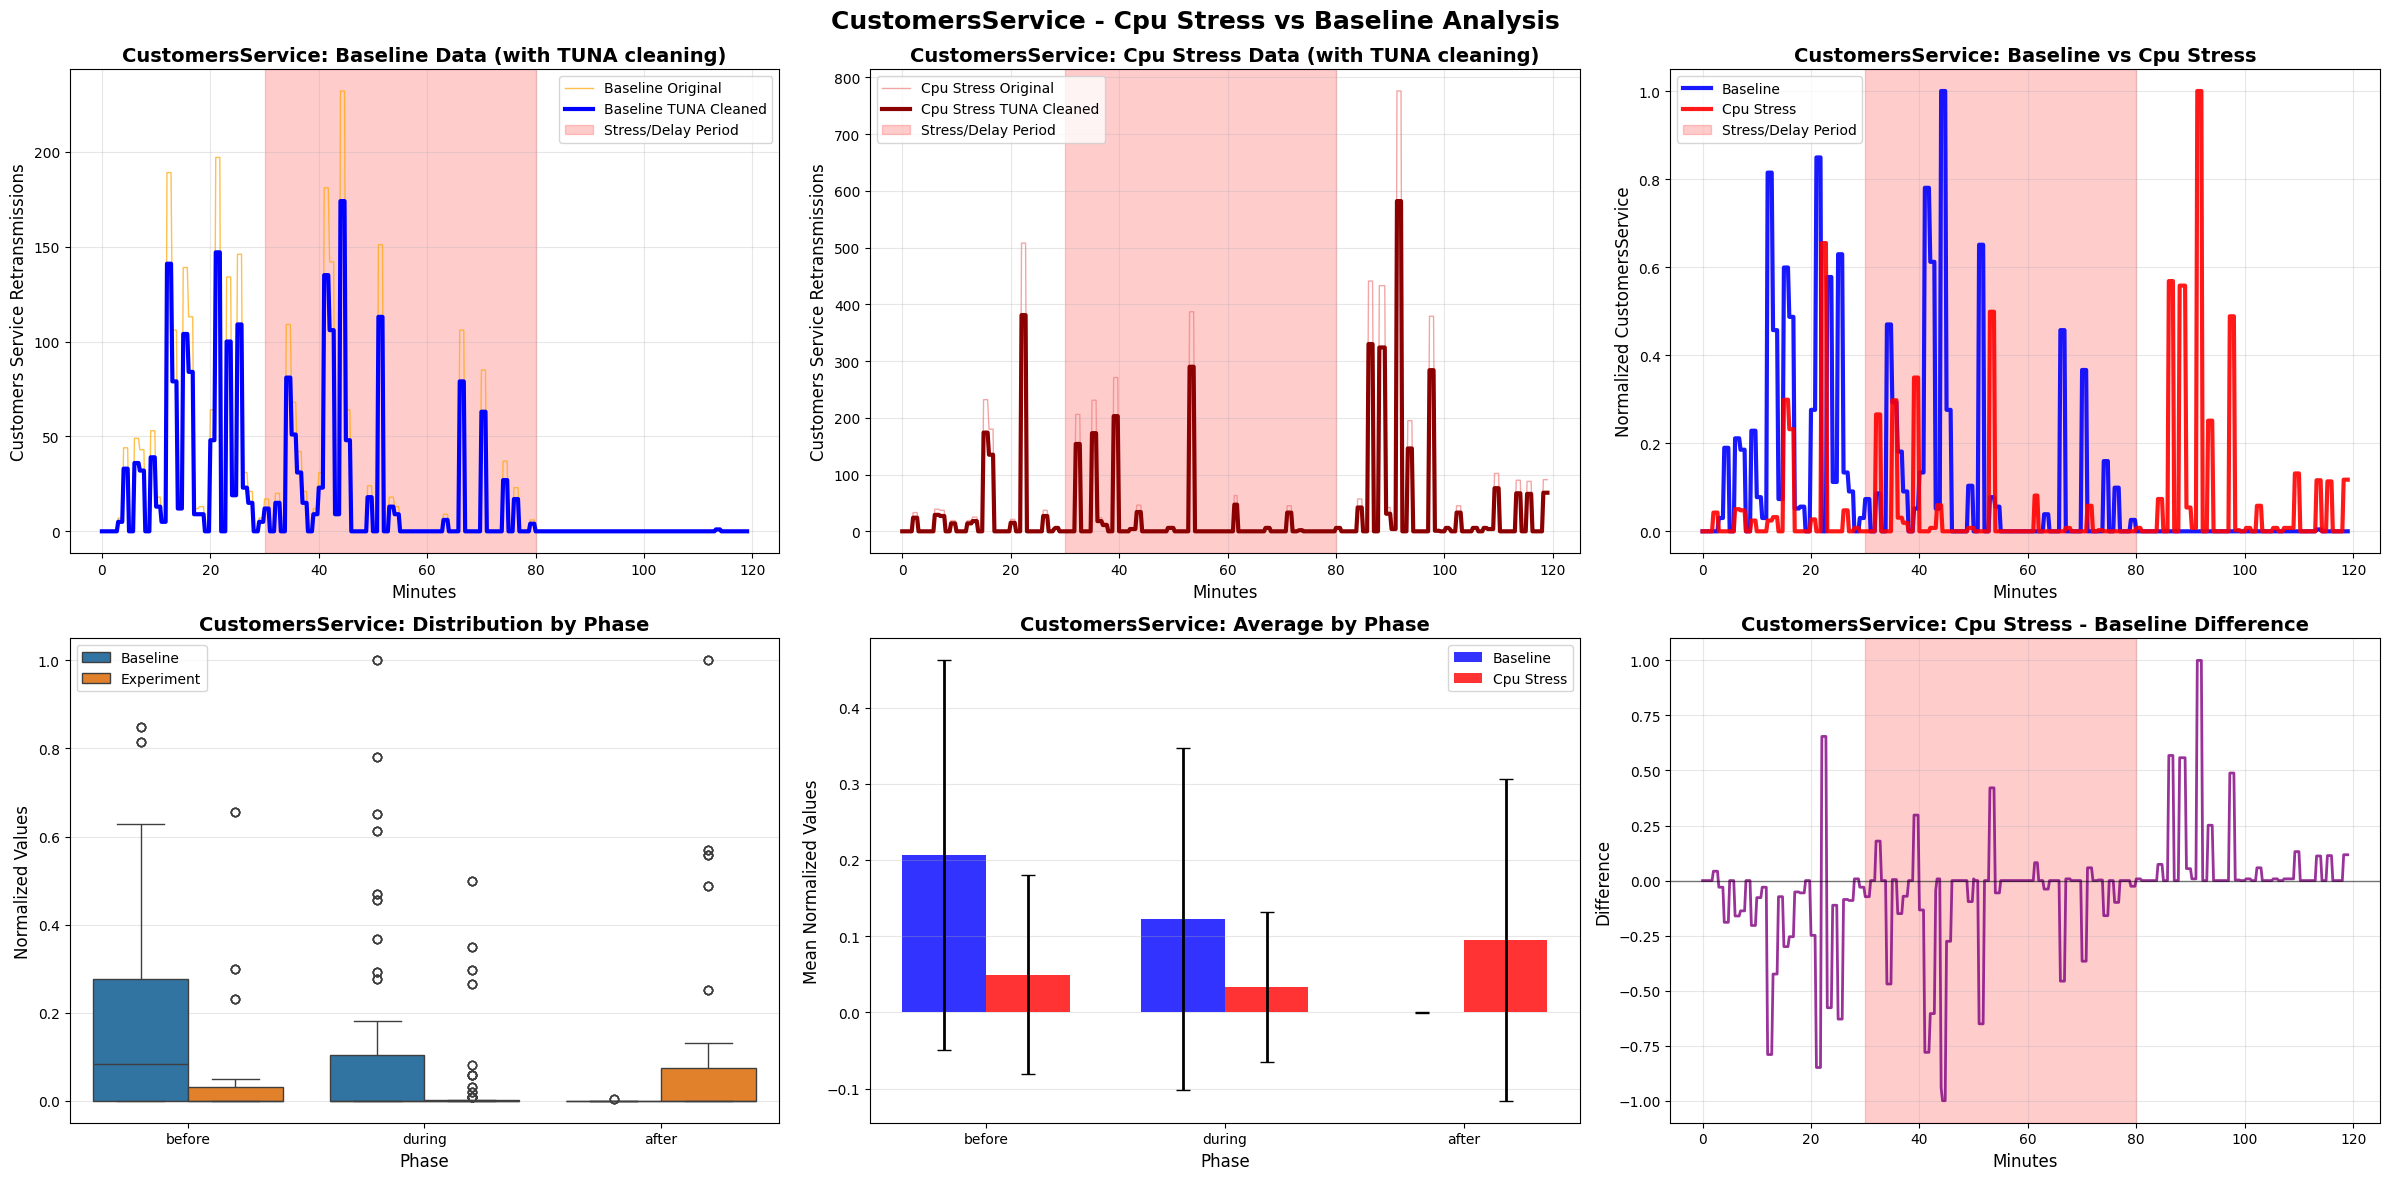


CUSTOMERSSERVICE - CPU STRESS VS BASELINE ANALYSIS
Comparing: CustomersService under cpu_stress stress vs CustomersService baseline

TUNA CLEANING SUMMARY:
  CPU STRESS: 323 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 25.1%, Correlation: 1.000
  BASELINE: 290 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 25.3%, Correlation: 1.000

BASELINE STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0001  0.0007  0.0  0.0043
before  0.2063  0.2556  0.0  0.8491
during  0.1221  0.2244  0.0  1.0000

CPU STRESS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0953  0.2112  0.0  1.0000
before  0.0497  0.1309  0.0  0.6546
during  0.0333  0.0987  0.0  0.4987

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  5.98, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  5.14, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -5.63, p=  0.0000 (SIGN

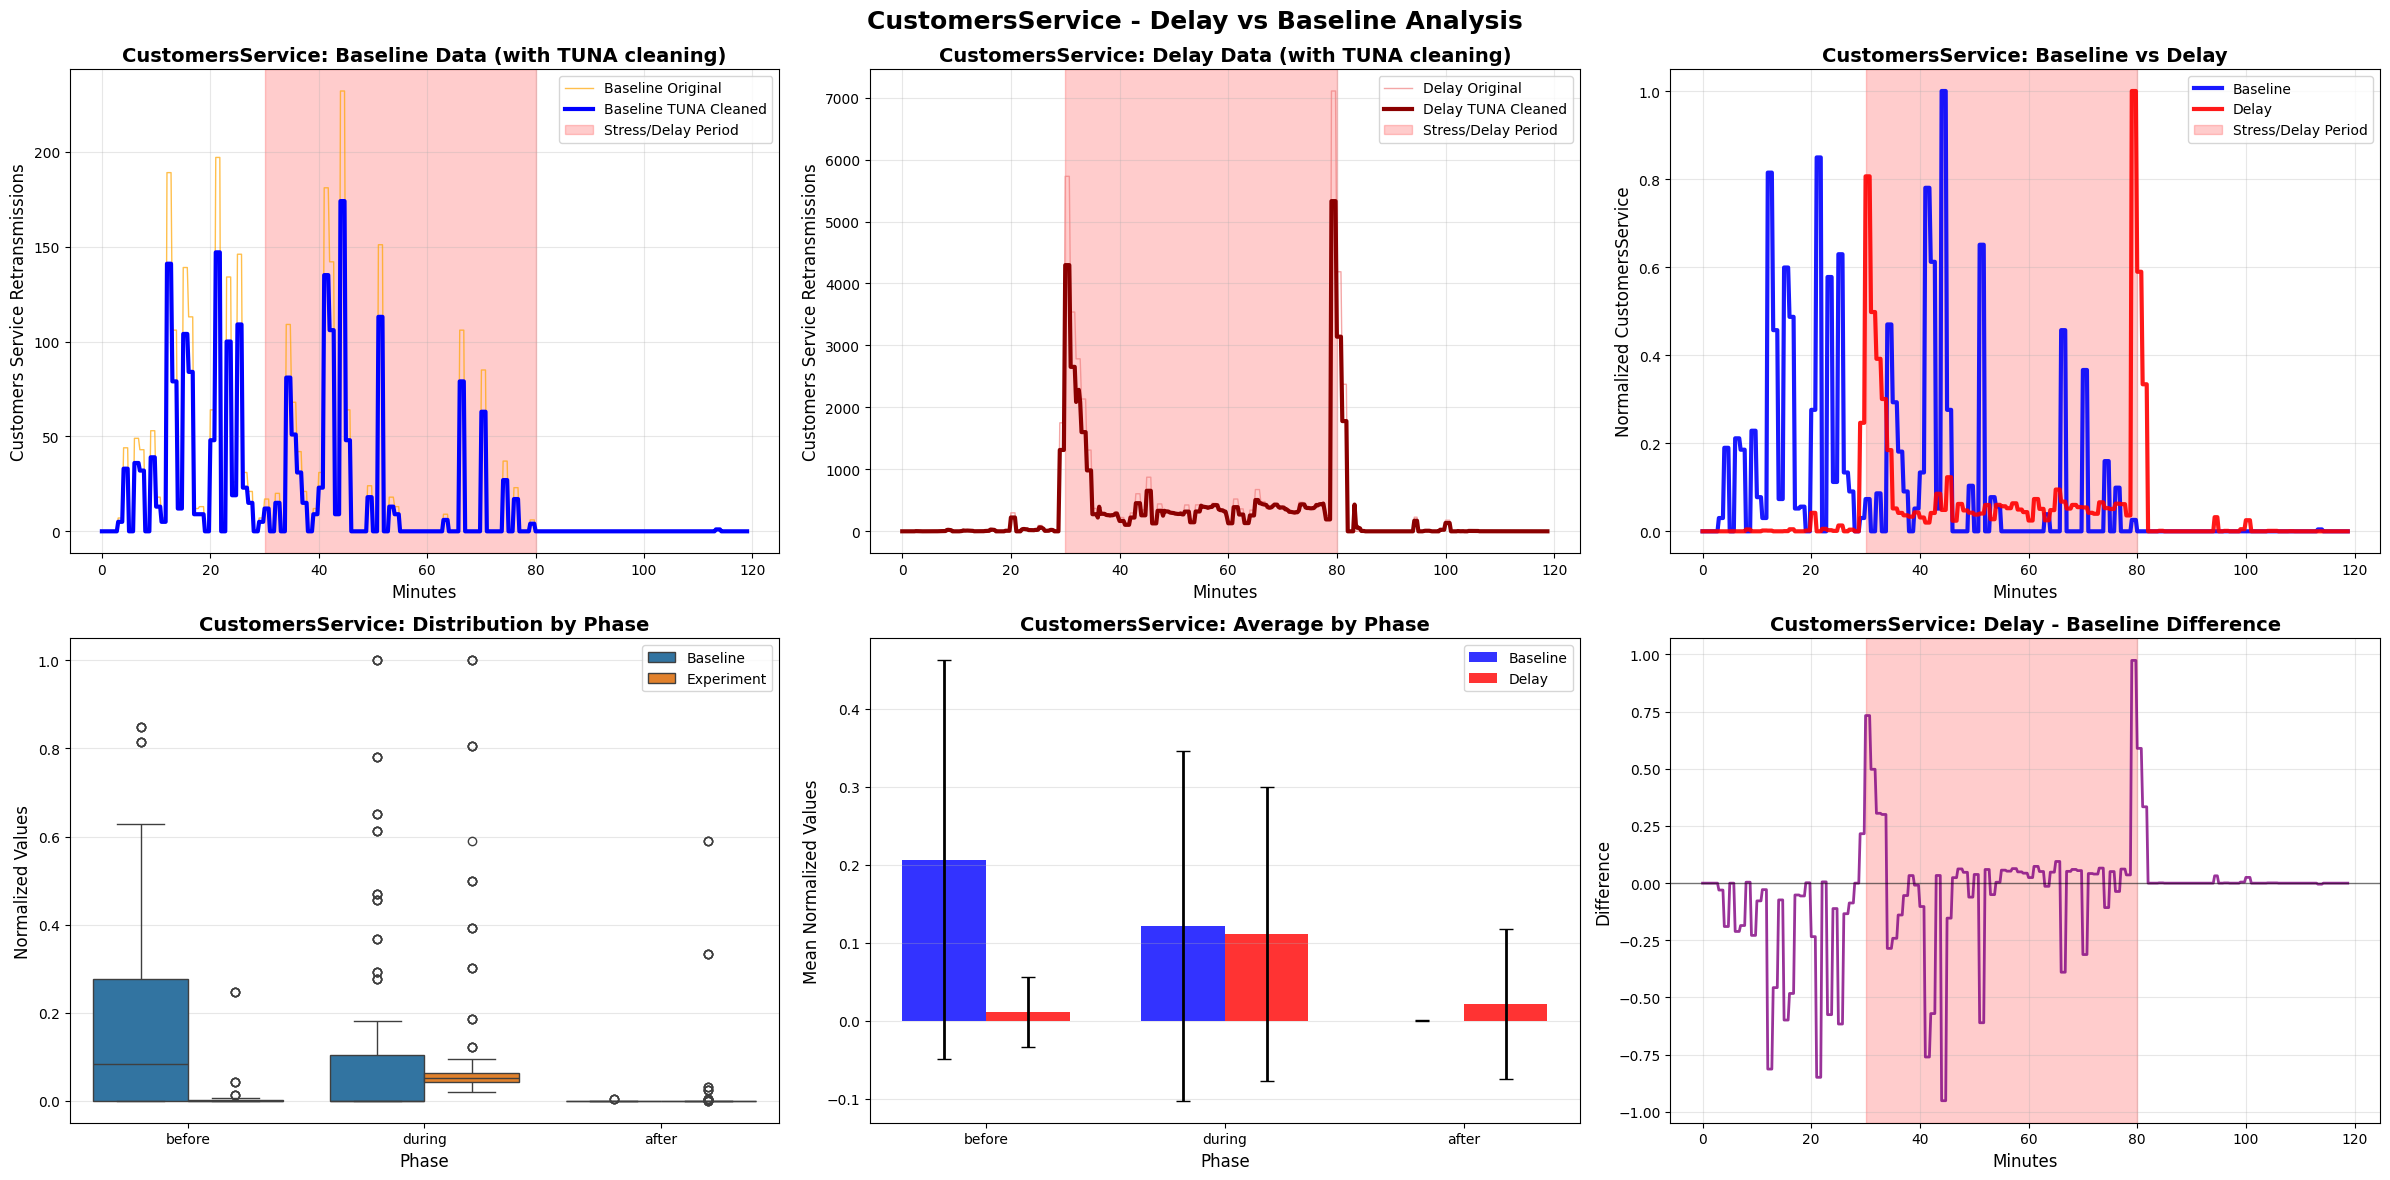


CUSTOMERSSERVICE - DELAY VS BASELINE ANALYSIS
Comparing: CustomersService under delay stress vs CustomersService baseline

TUNA CLEANING SUMMARY:
  DELAY: 165 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 24.9%, Correlation: 0.998
  BASELINE: 290 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 25.3%, Correlation: 1.000

BASELINE STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0001  0.0007  0.0  0.0043
before  0.2063  0.2556  0.0  0.8491
during  0.1221  0.2244  0.0  1.0000

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0215  0.0961  0.0000  0.5895
before  0.0110  0.0446  0.0000  0.2464
during  0.1108  0.1884  0.0198  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  8.25, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  0.54, p=  0.5864 (NOT SIGNIFICANT)
  AFTER   : t= -2.78, p=  0.0059 (SIG

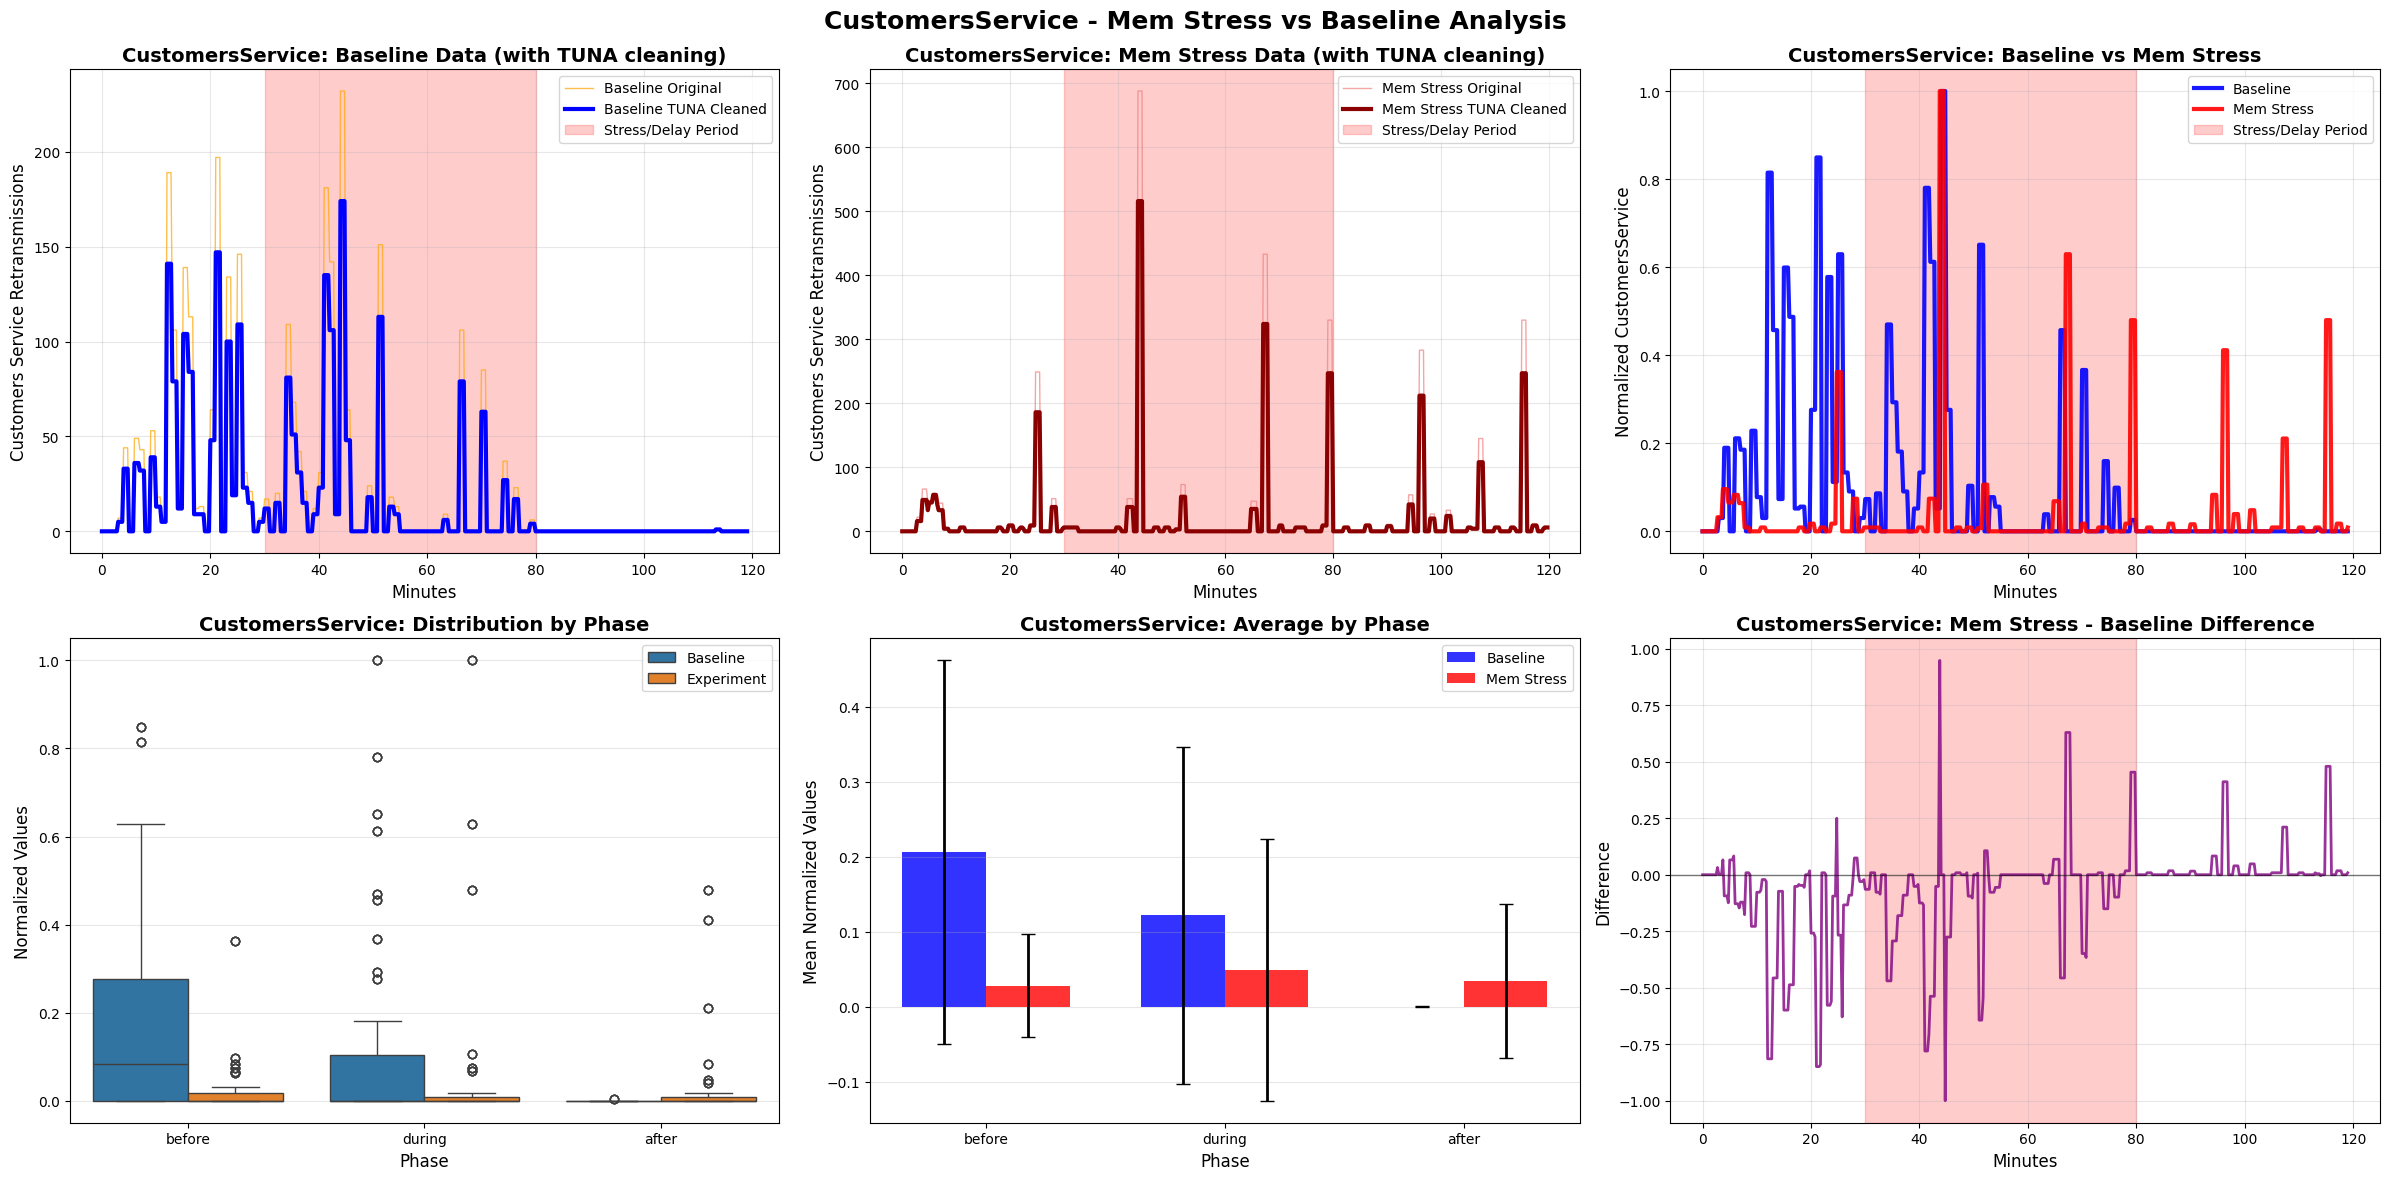


CUSTOMERSSERVICE - MEM STRESS VS BASELINE ANALYSIS
Comparing: CustomersService under mem_stress stress vs CustomersService baseline

TUNA CLEANING SUMMARY:
  MEM STRESS: 262 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 25.1%, Correlation: 1.000
  BASELINE: 290 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 25.3%, Correlation: 1.000

BASELINE STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0001  0.0007  0.0  0.0043
before  0.2063  0.2556  0.0  0.8491
during  0.1221  0.2244  0.0  1.0000

MEM STRESS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0351  0.1026  0.0  0.4797
before  0.0283  0.0683  0.0  0.3619
during  0.0497  0.1748  0.0  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  7.37, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  3.61, p=  0.0004 (SIGNIFICANT)
  AFTER   : t= -4.26, p=  0.0000 (SIGN

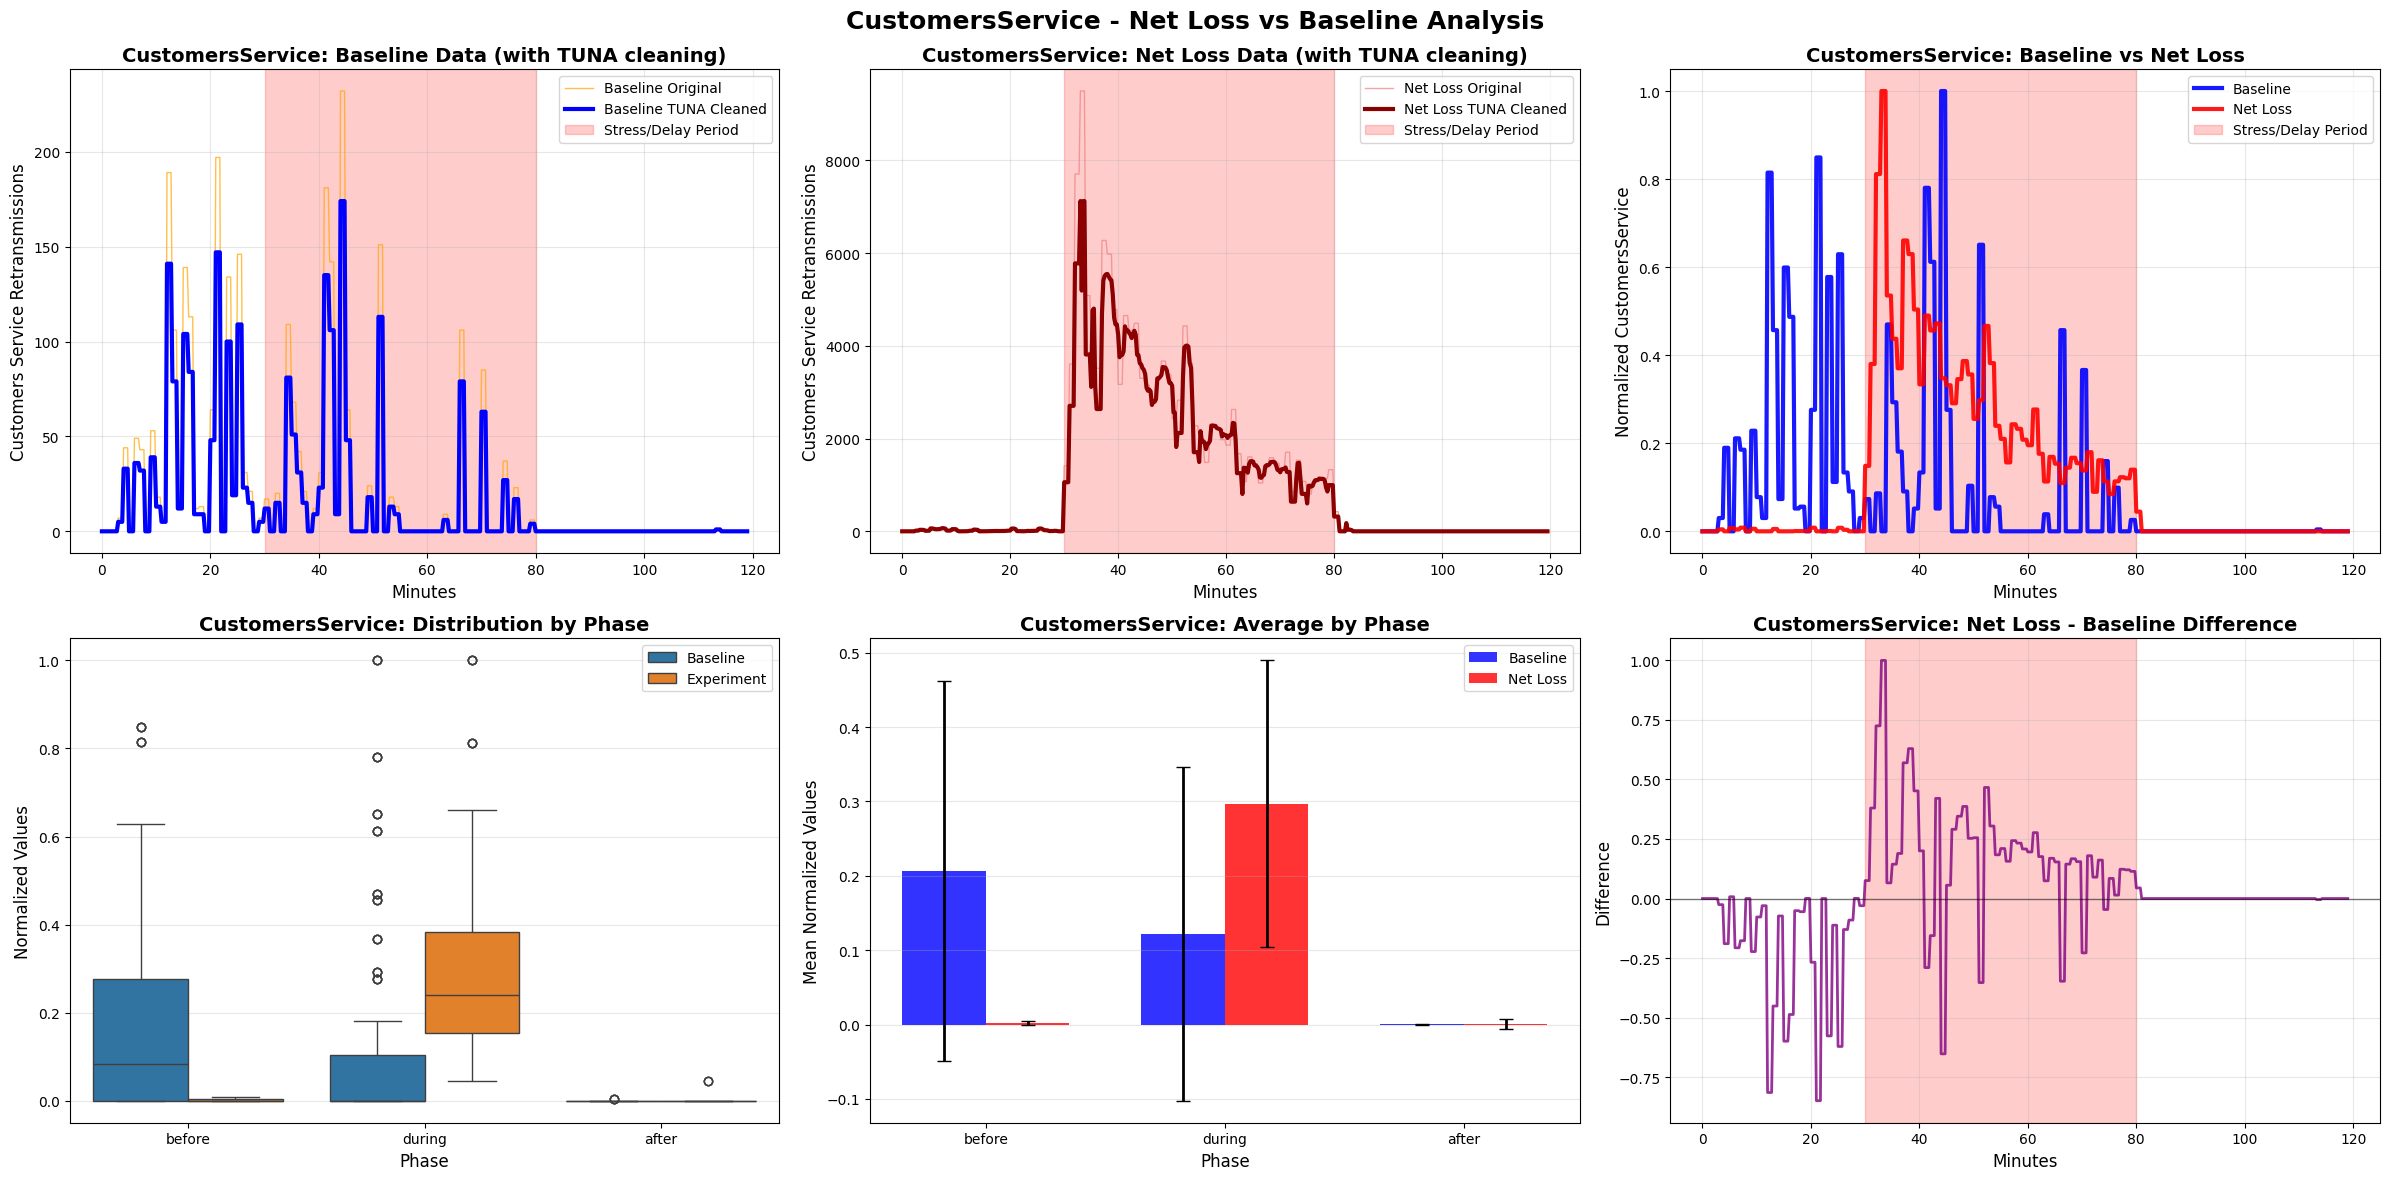


CUSTOMERSSERVICE - NET LOSS VS BASELINE ANALYSIS
Comparing: CustomersService under net_loss stress vs CustomersService baseline

TUNA CLEANING SUMMARY:
  NET LOSS: 77 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 13.7%, Correlation: 0.980
  BASELINE: 290 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 25.3%, Correlation: 1.000

BASELINE STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0001  0.0007  0.0  0.0043
before  0.2063  0.2556  0.0  0.8491
during  0.1221  0.2244  0.0  1.0000

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0009  0.0062  0.0000  0.0447
before  0.0019  0.0029  0.0000  0.0083
during  0.2968  0.1927  0.0447  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  8.76, p=  0.0000 (SIGNIFICANT)
  DURING  : t= -8.37, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -1.51, p=  0.13

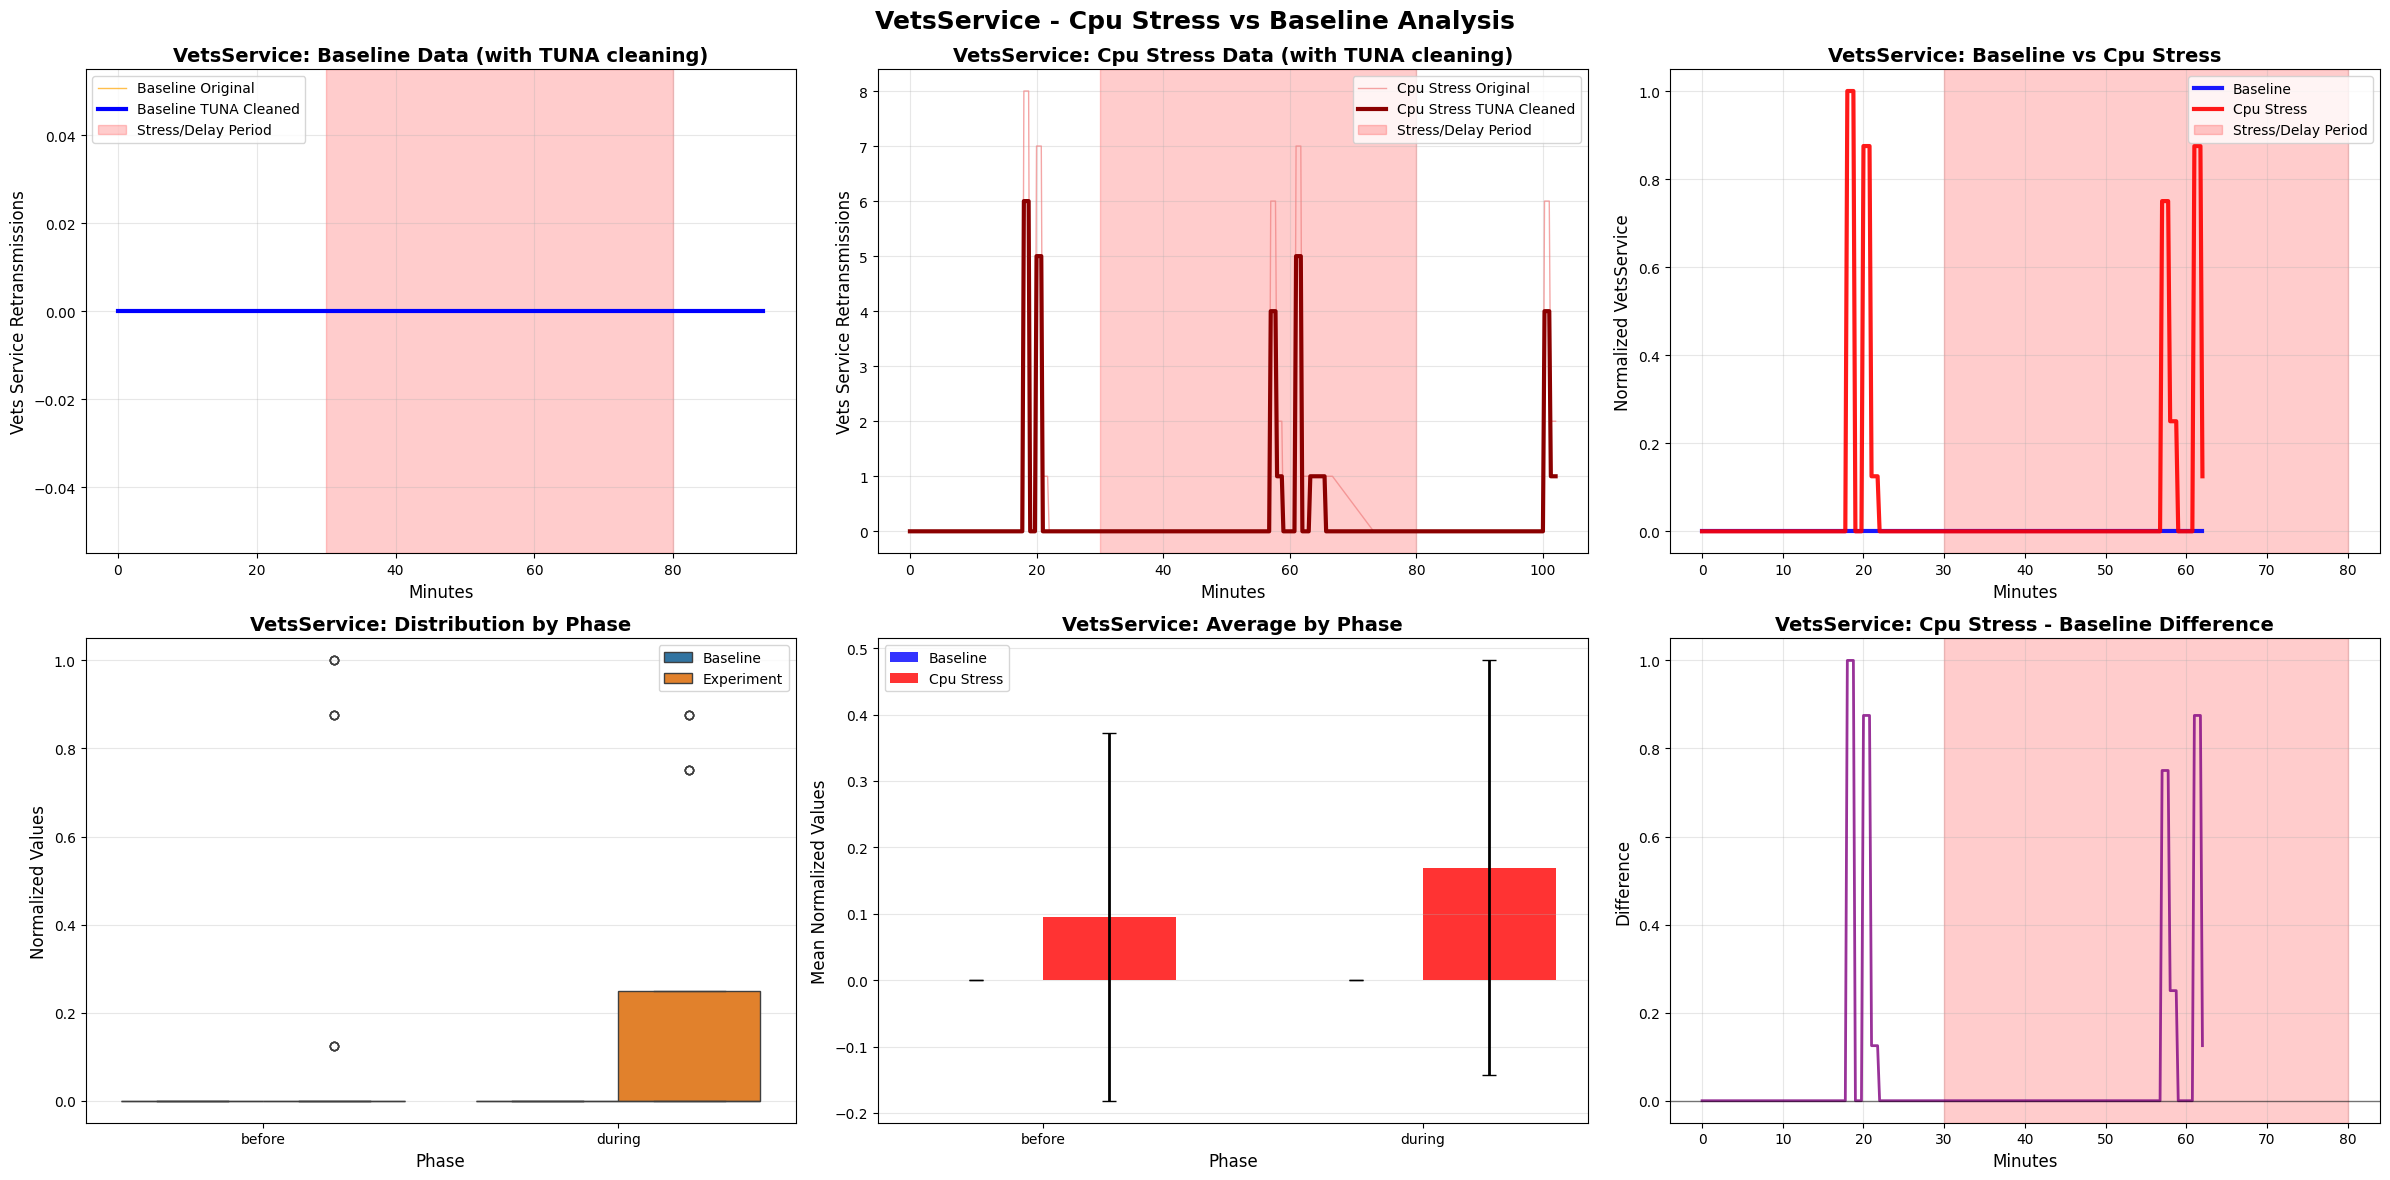


VETSSERVICE - CPU STRESS VS BASELINE ANALYSIS
Comparing: VetsService under cpu_stress stress vs VetsService baseline

TUNA CLEANING SUMMARY:
  CPU STRESS: 79 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 28.8%, Correlation: 0.989
  BASELINE: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

CPU STRESS STATISTICS BY PHASE:
          mean     std  min    max
phase                             
before  0.0952  0.2769  0.0  1.000
during  0.1694  0.3121  0.0  0.875

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -3.15, p=  0.0019 (SIGNIFICANT)
  DURING  : t= -3.64, p=  0.0005 (SIGNIFICANT)
  AFTER   : Phase not present in data

CPU STRESS IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
  AFTER   : Phase not present in data

TCP 

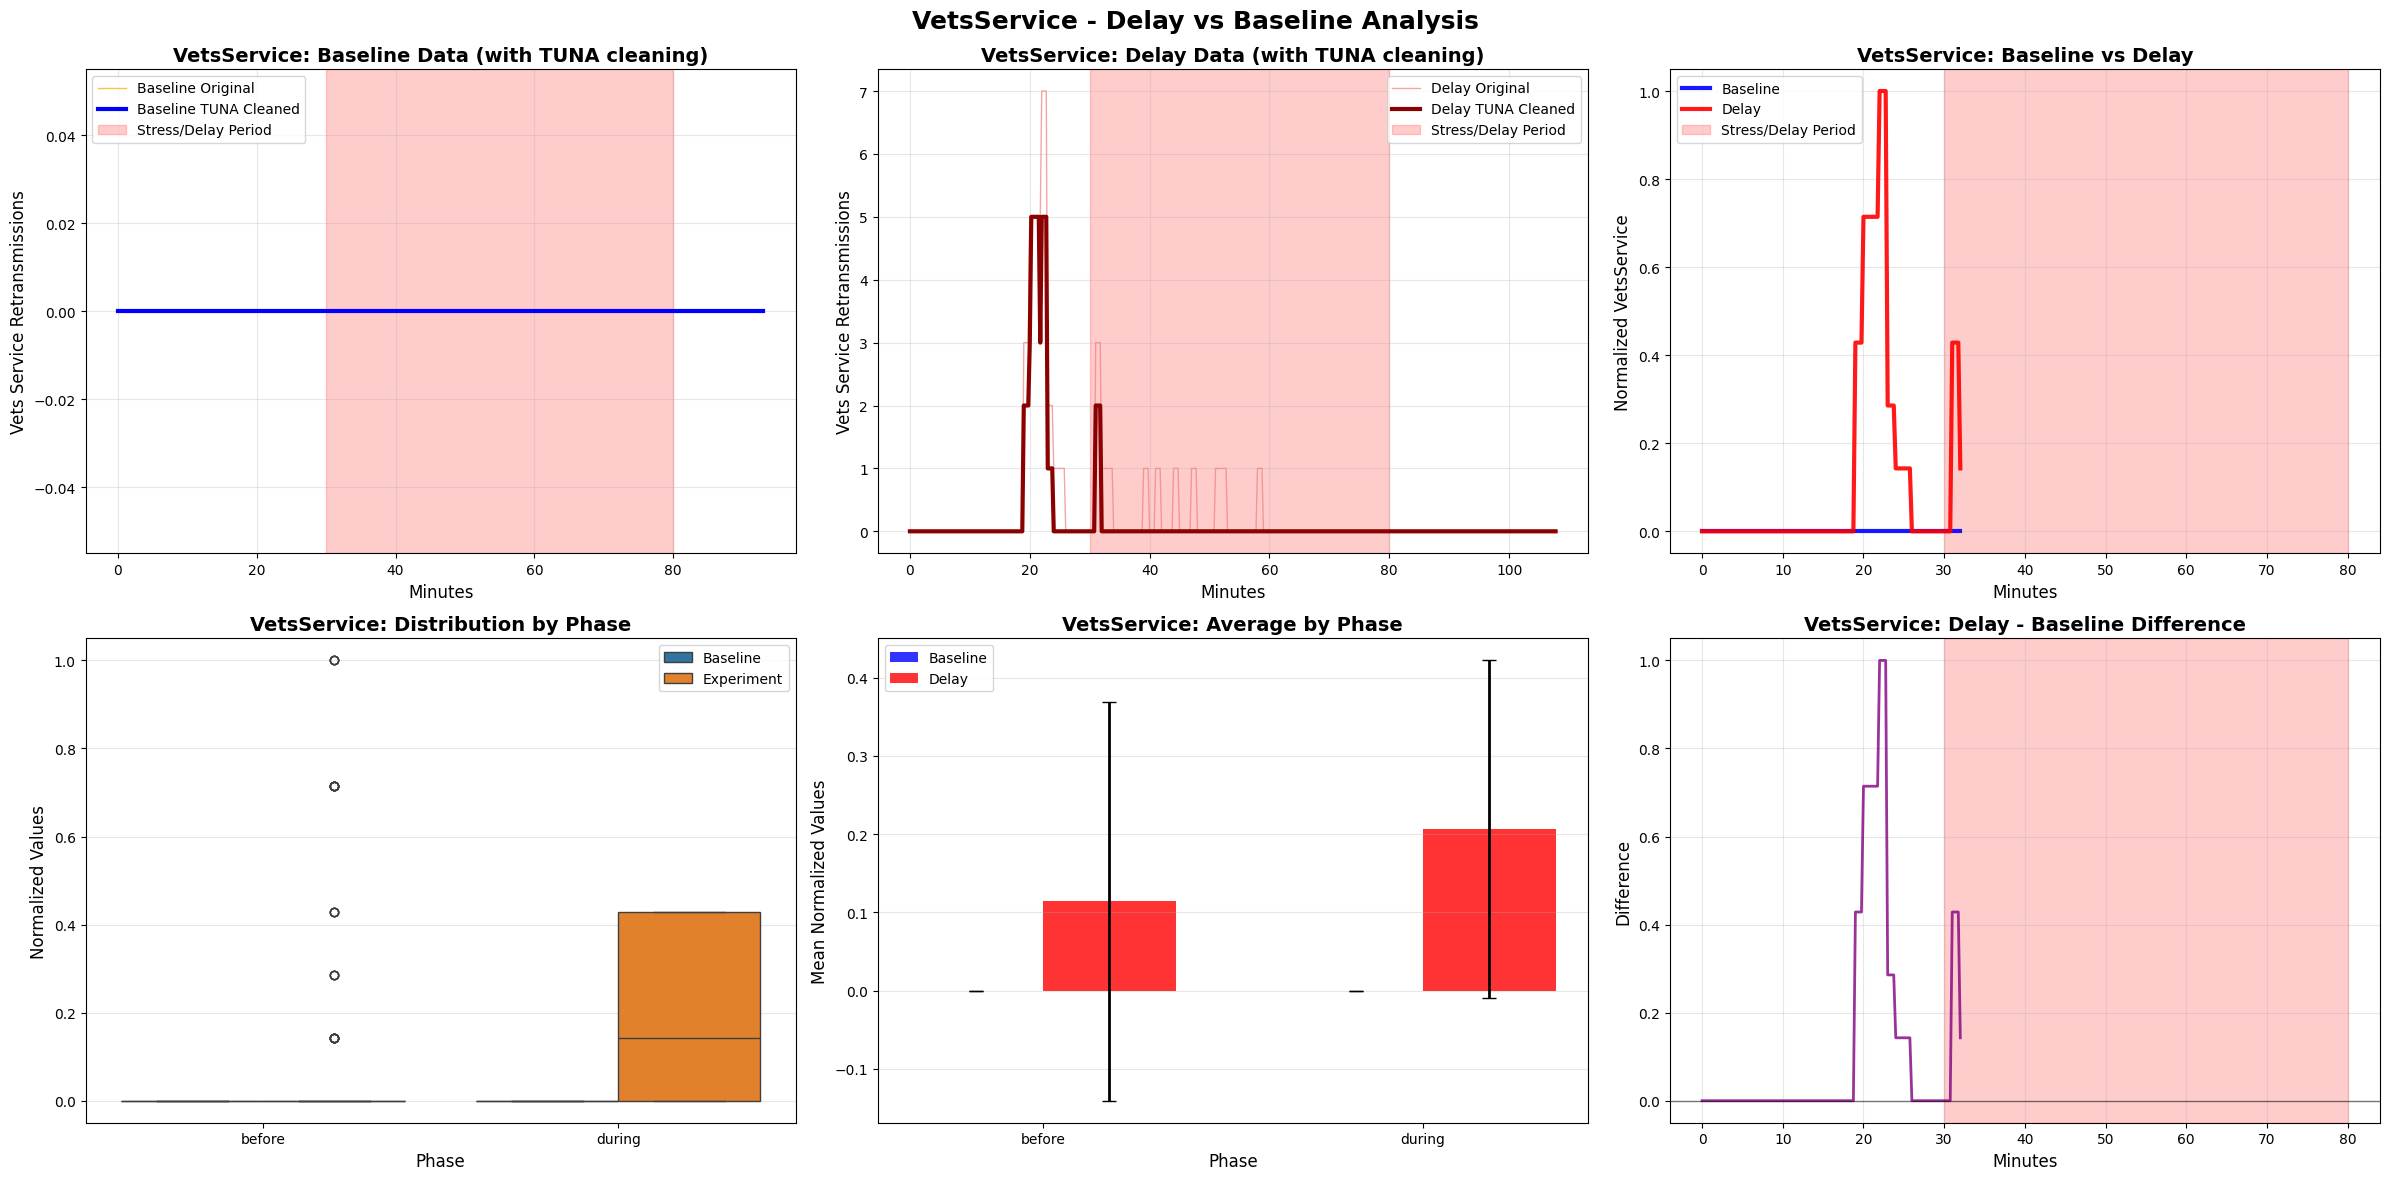


VETSSERVICE - DELAY VS BASELINE ANALYSIS
Comparing: VetsService under delay stress vs VetsService baseline

TUNA CLEANING SUMMARY:
  DELAY: 132 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 22.1%, Correlation: 0.939
  BASELINE: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

DELAY STATISTICS BY PHASE:
          mean     std  min     max
phase                              
before  0.1143  0.2550  0.0  1.0000
during  0.2063  0.2156  0.0  0.4286

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -4.91, p=  0.0000 (SIGNIFICANT)
  DURING  : t= -2.87, p=  0.0111 (SIGNIFICANT)
  AFTER   : Phase not present in data

DELAY IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
  AFTER   : Phase not present in data

TCP METRICS DETAILS:
  M

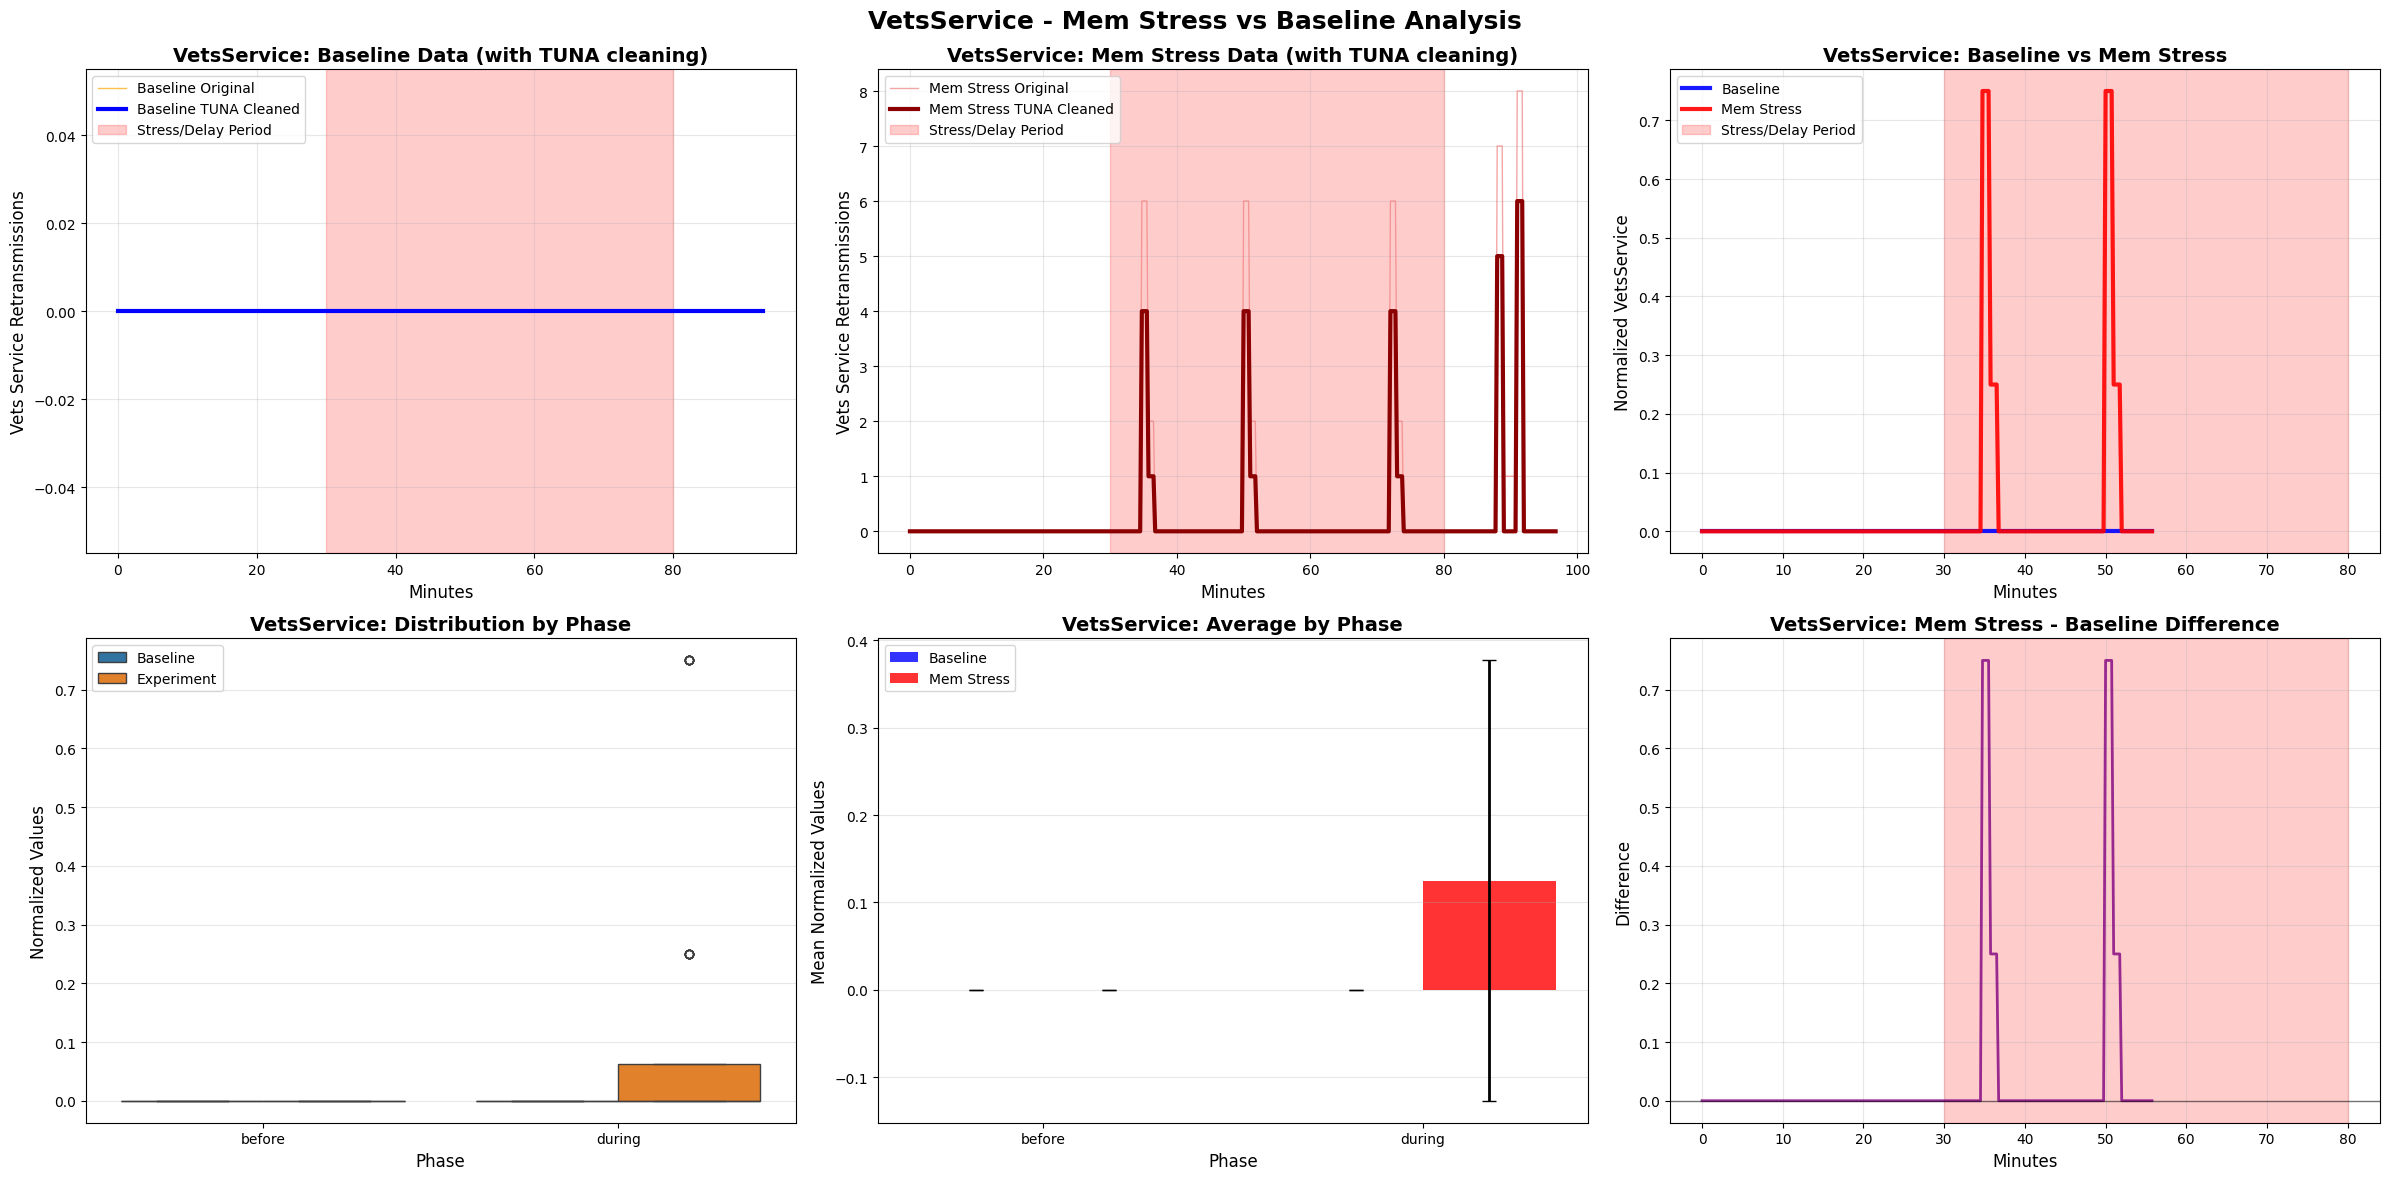


VETSSERVICE - MEM STRESS VS BASELINE ANALYSIS
Comparing: VetsService under mem_stress stress vs VetsService baseline

TUNA CLEANING SUMMARY:
  MEM STRESS: 80 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 30.2%, Correlation: 0.992
  BASELINE: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

MEM STRESS STATISTICS BY PHASE:
         mean    std  min   max
phase                          
before  0.000  0.000  0.0  0.00
during  0.125  0.252  0.0  0.75

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=   nan, p=     nan (NOT SIGNIFICANT)
  DURING  : t= -3.97, p=  0.0001 (SIGNIFICANT)
  AFTER   : Phase not present in data

MEM STRESS IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
  AFTER   : Phase not present in data

TCP METRICS 

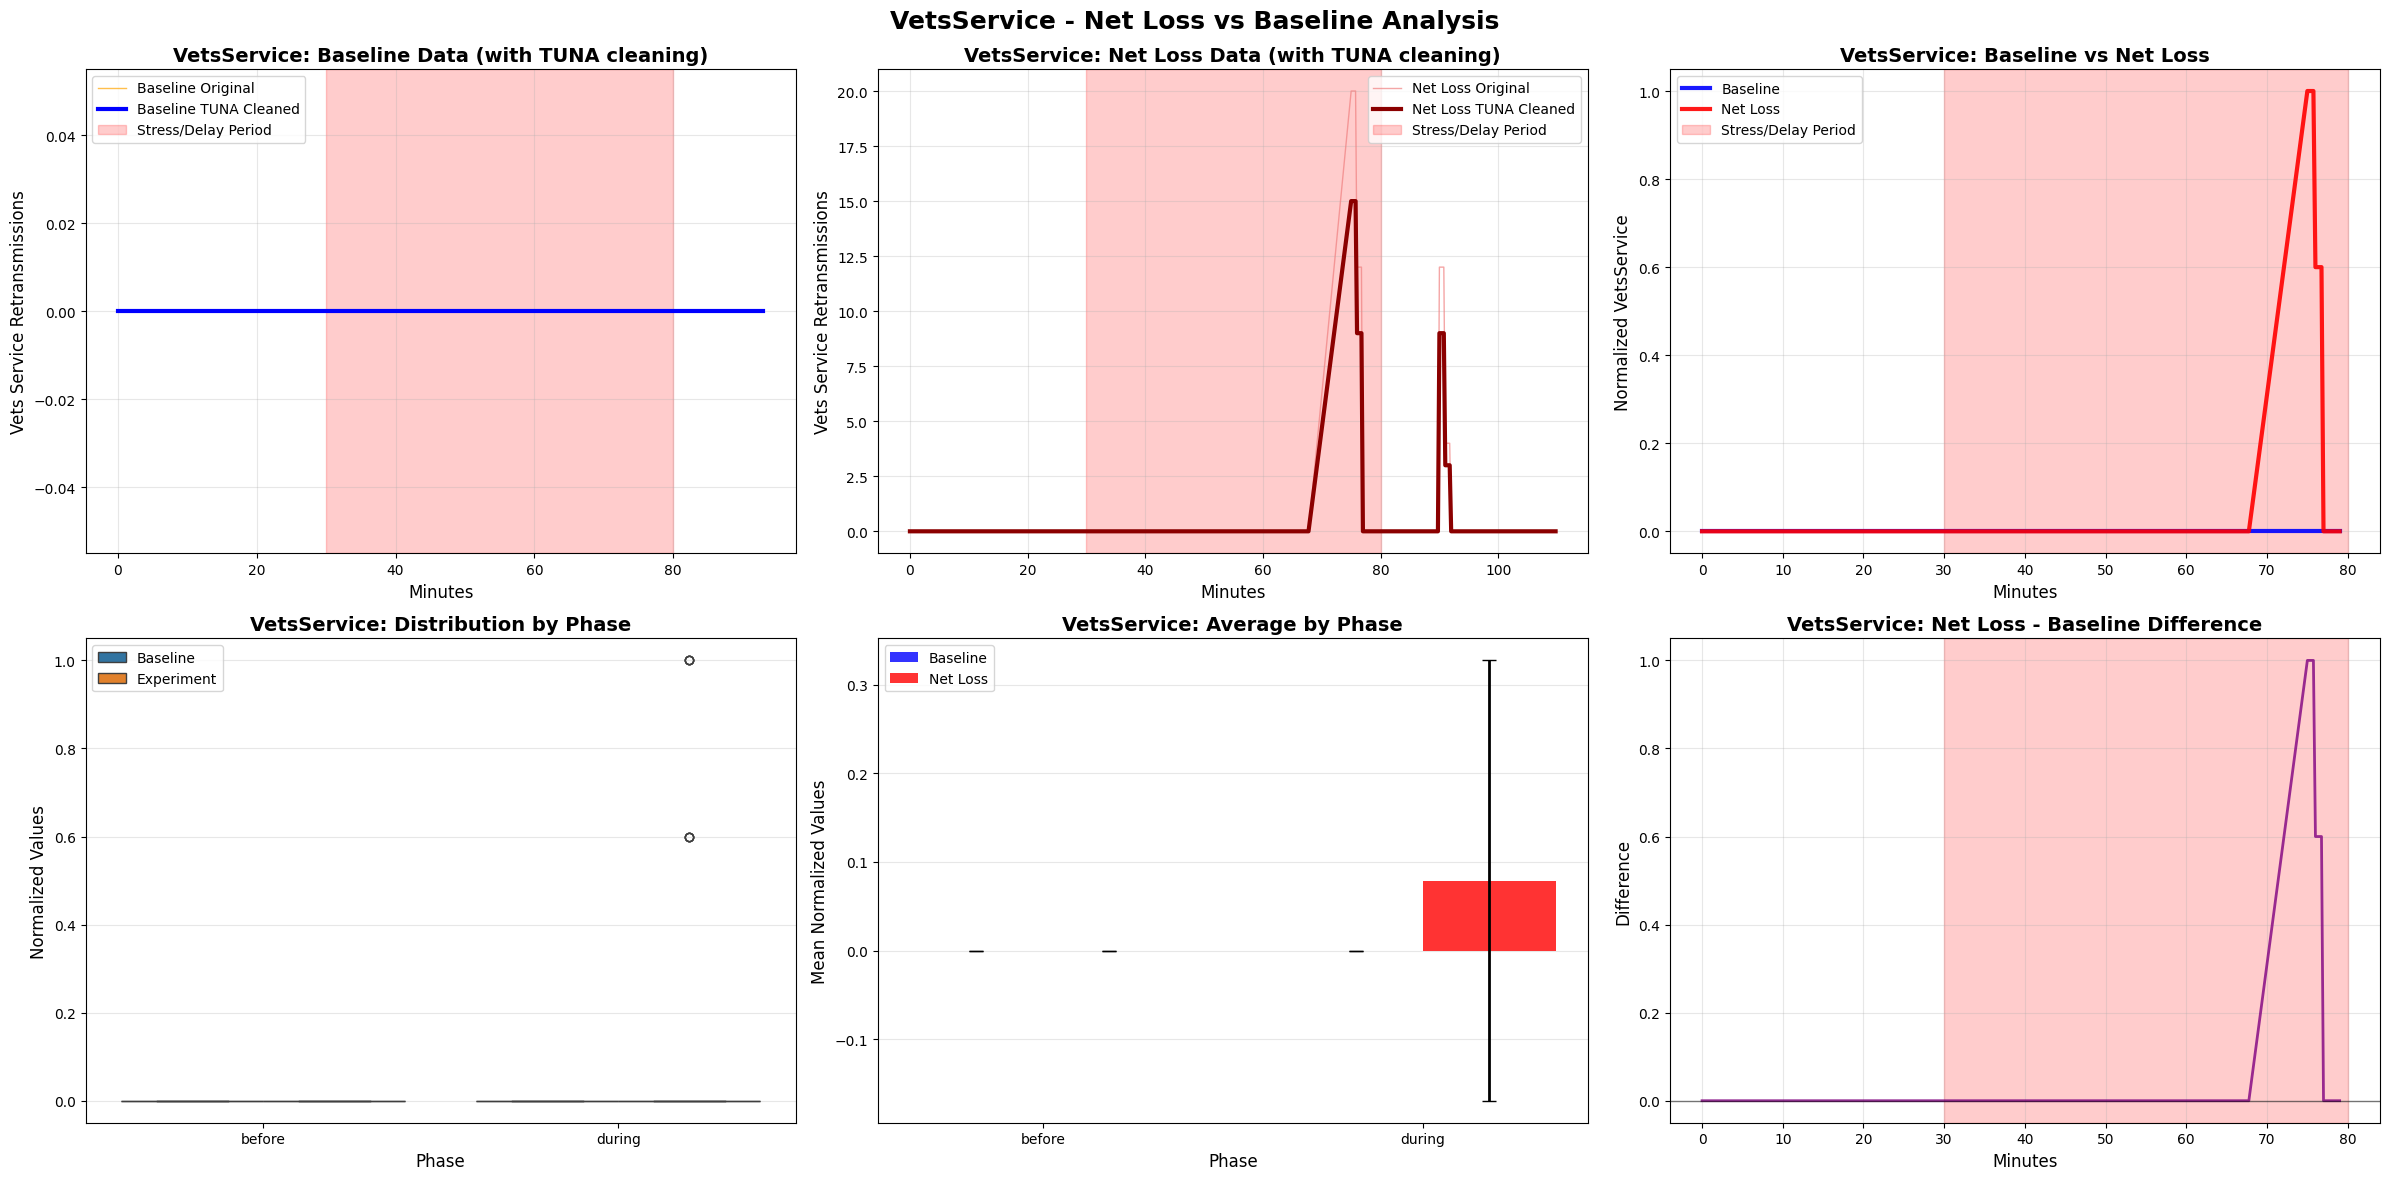


VETSSERVICE - NET LOSS VS BASELINE ANALYSIS
Comparing: VetsService under net_loss stress vs VetsService baseline

TUNA CLEANING SUMMARY:
  NET LOSS: 36 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 25.0%, Correlation: 1.000
  BASELINE: 0 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

NET LOSS STATISTICS BY PHASE:
         mean     std  min  max
phase                          
before  0.000  0.0000  0.0  0.0
during  0.079  0.2484  0.0  1.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=   nan, p=     nan (NOT SIGNIFICANT)
  DURING  : t= -2.86, p=  0.0048 (SIGNIFICANT)
  AFTER   : Phase not present in data

NET LOSS IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
  AFTER   : Phase not present in data

TCP METRICS DETAILS:
 

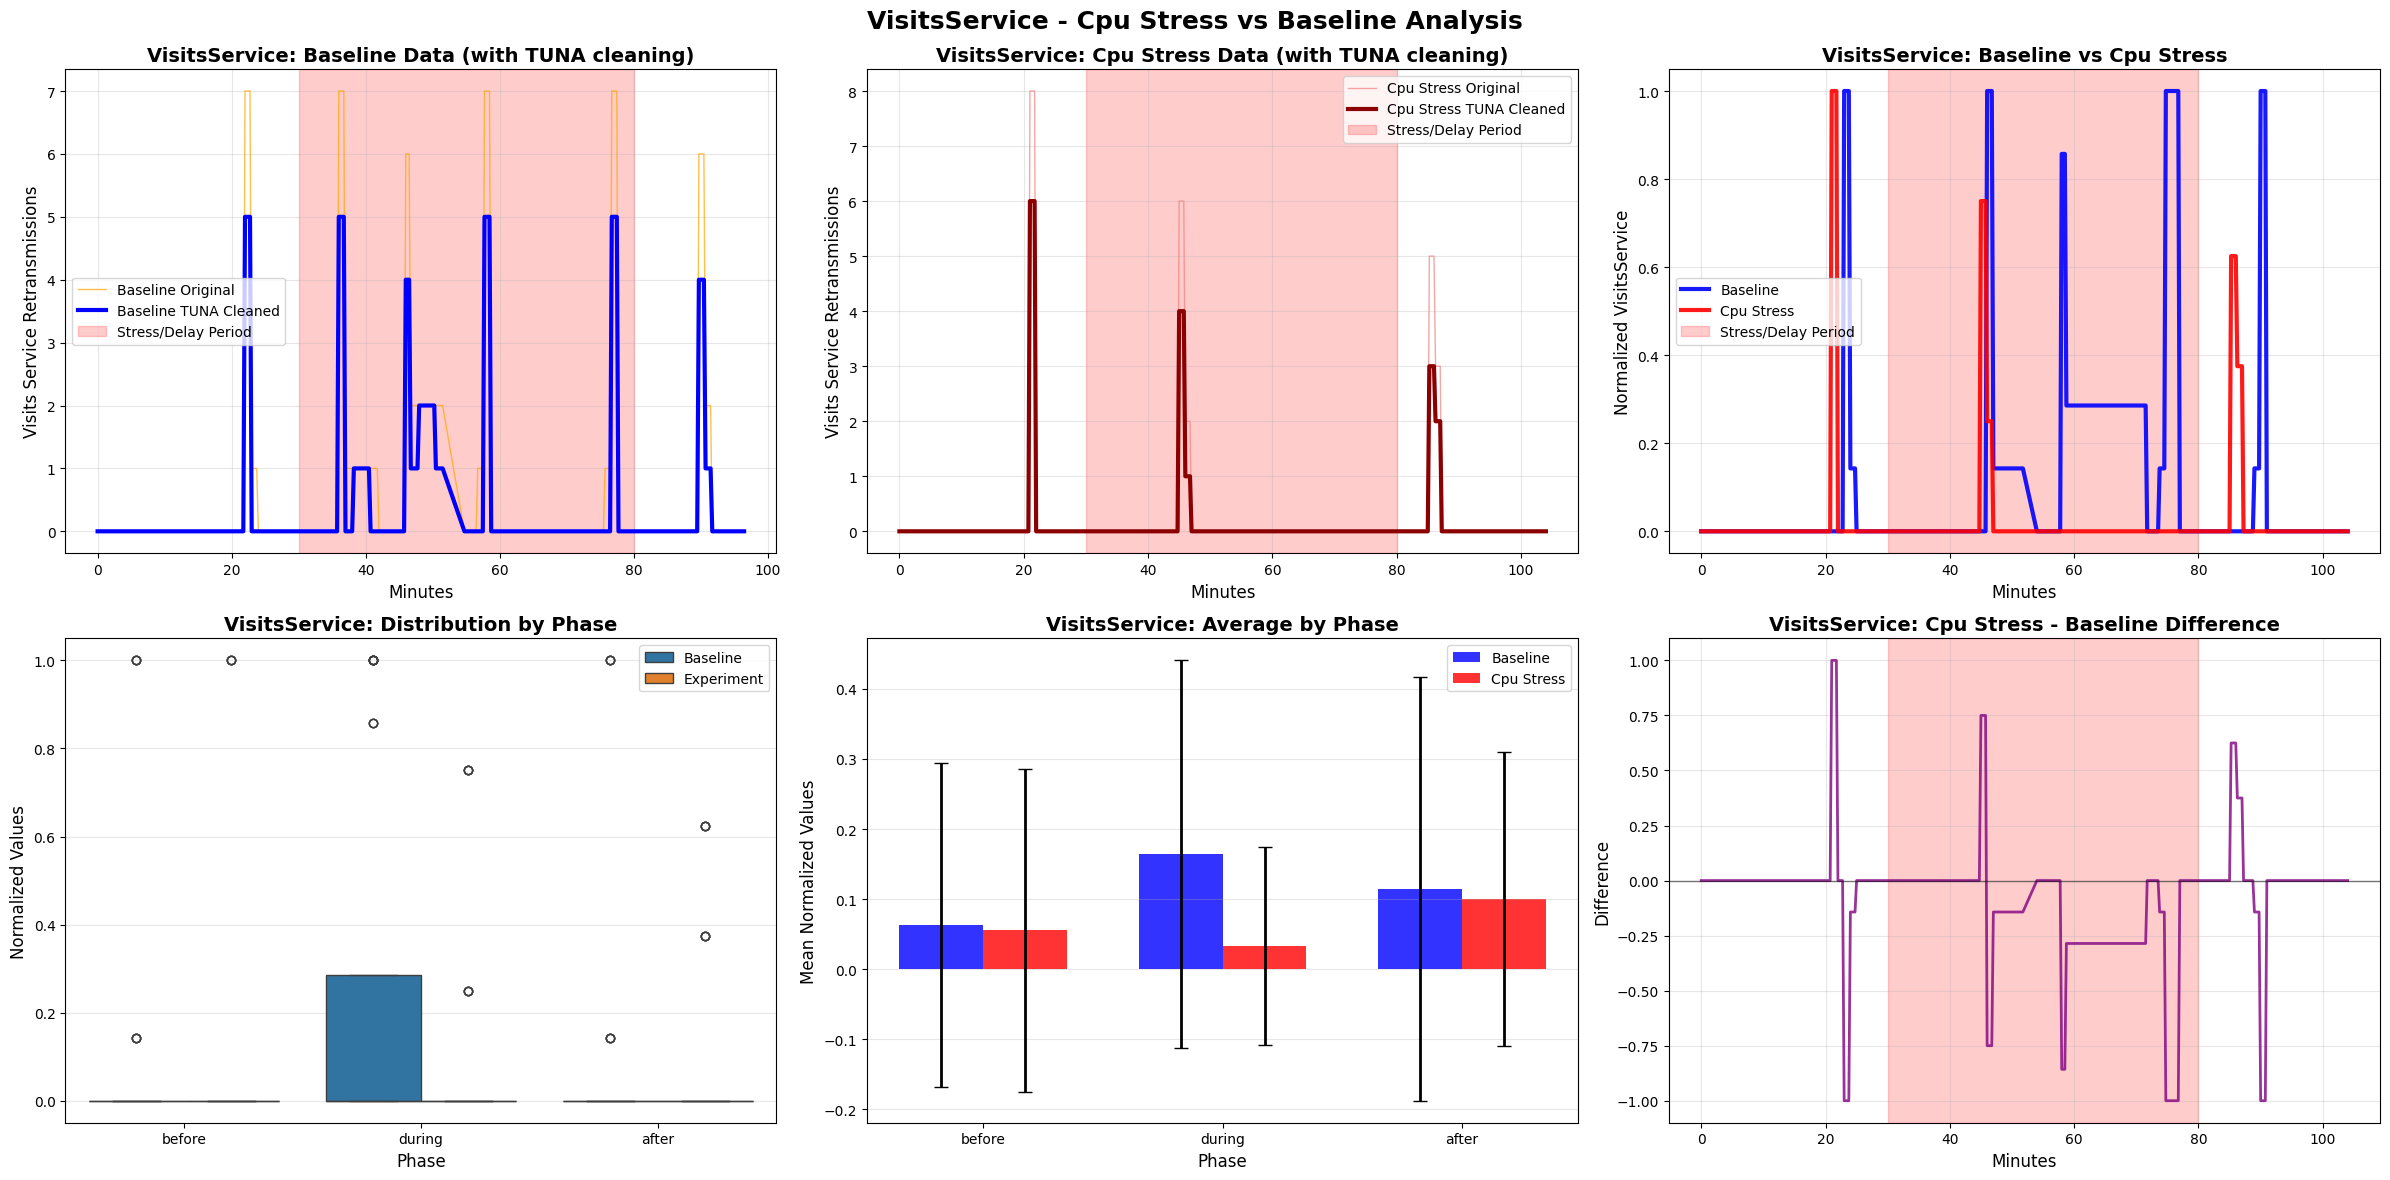


VISITSSERVICE - CPU STRESS VS BASELINE ANALYSIS
Comparing: VisitsService under cpu_stress stress vs VisitsService baseline

TUNA CLEANING SUMMARY:
  CPU STRESS: 50 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 30.7%, Correlation: 0.995
  BASELINE: 117 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 28.7%, Correlation: 0.982

BASELINE STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.1143  0.3021  0.0  1.0
before  0.0635  0.2311  0.0  1.0
during  0.1643  0.2763  0.0  1.0

CPU STRESS STATISTICS BY PHASE:
          mean     std  min    max
phase                             
after   0.1000  0.2103  0.0  0.625
before  0.0556  0.2307  0.0  1.000
during  0.0333  0.1410  0.0  0.750

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  0.21, p=  0.8369 (NOT SIGNIFICANT)
  DURING  : t=  4.62, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  0.25, p=  0.8067 (NOT SIGNIFICANT)

CPU STRESS I

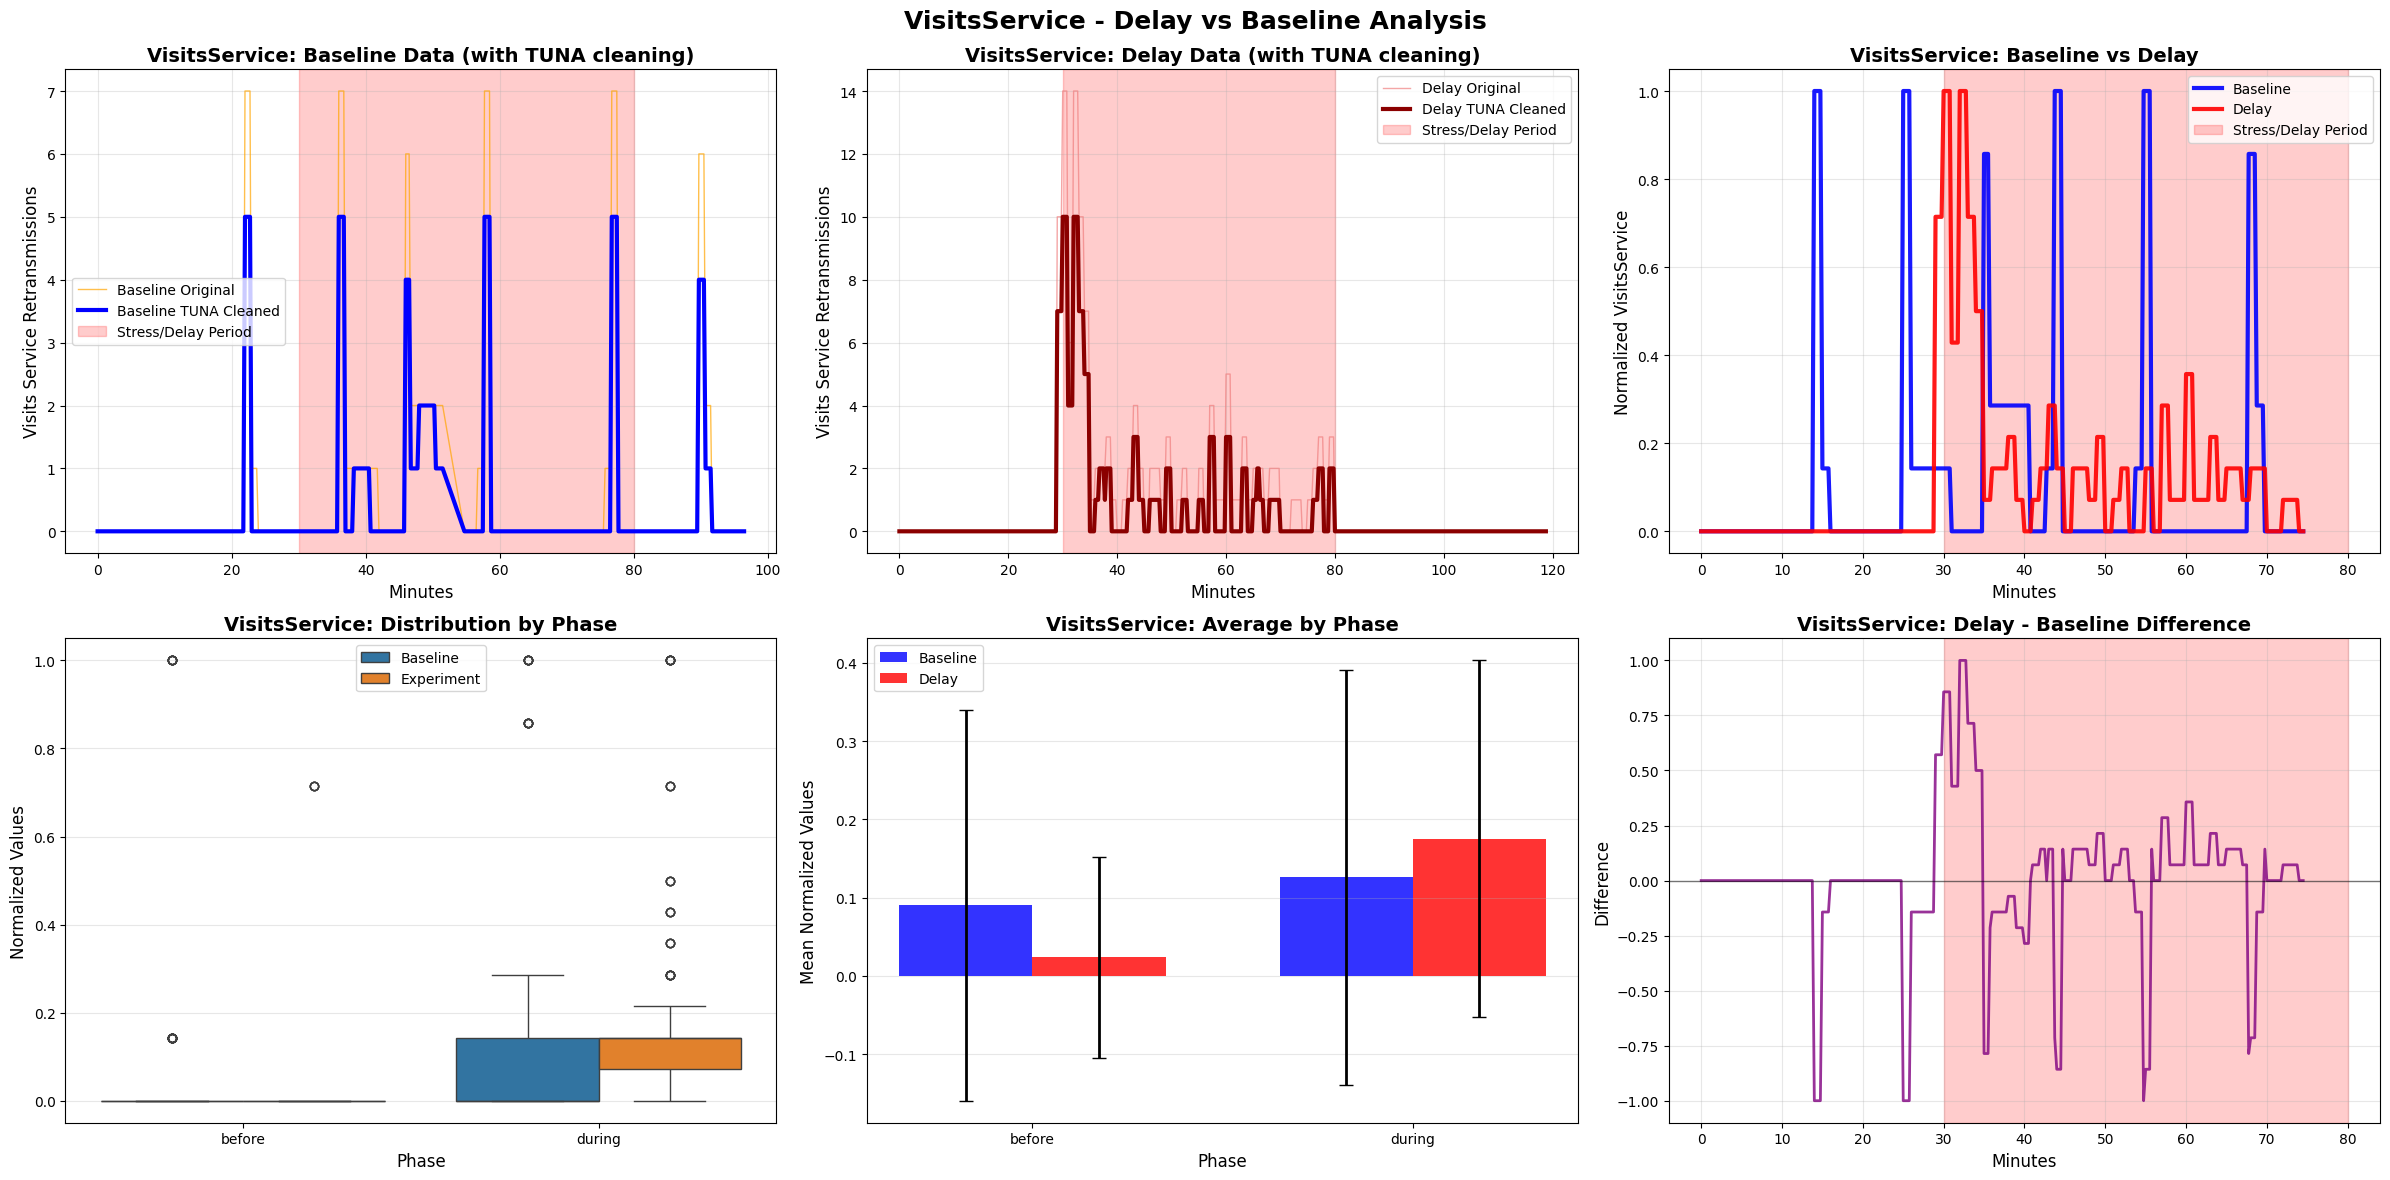


VISITSSERVICE - DELAY VS BASELINE ANALYSIS
Comparing: VisitsService under delay stress vs VisitsService baseline

TUNA CLEANING SUMMARY:
  DELAY: 208 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 29.1%, Correlation: 0.988
  BASELINE: 117 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 28.7%, Correlation: 0.982

BASELINE STATISTICS BY PHASE:
          mean     std  min  max
phase                           
before  0.0905  0.2498  0.0  1.0
during  0.1261  0.2650  0.0  1.0

DELAY STATISTICS BY PHASE:
          mean     std  min     max
phase                              
before  0.0238  0.1288  0.0  0.7143
during  0.1756  0.2275  0.0  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  2.60, p=  0.0099 (SIGNIFICANT)
  DURING  : t= -1.90, p=  0.0589 (NOT SIGNIFICANT)
  AFTER   : Phase not present in data

DELAY IMPACT:
  BEFORE  :  -73.68% (DECREASE)
  DURING  :  +39.24% (INCREASE)
  AFTER   : Phase not present 

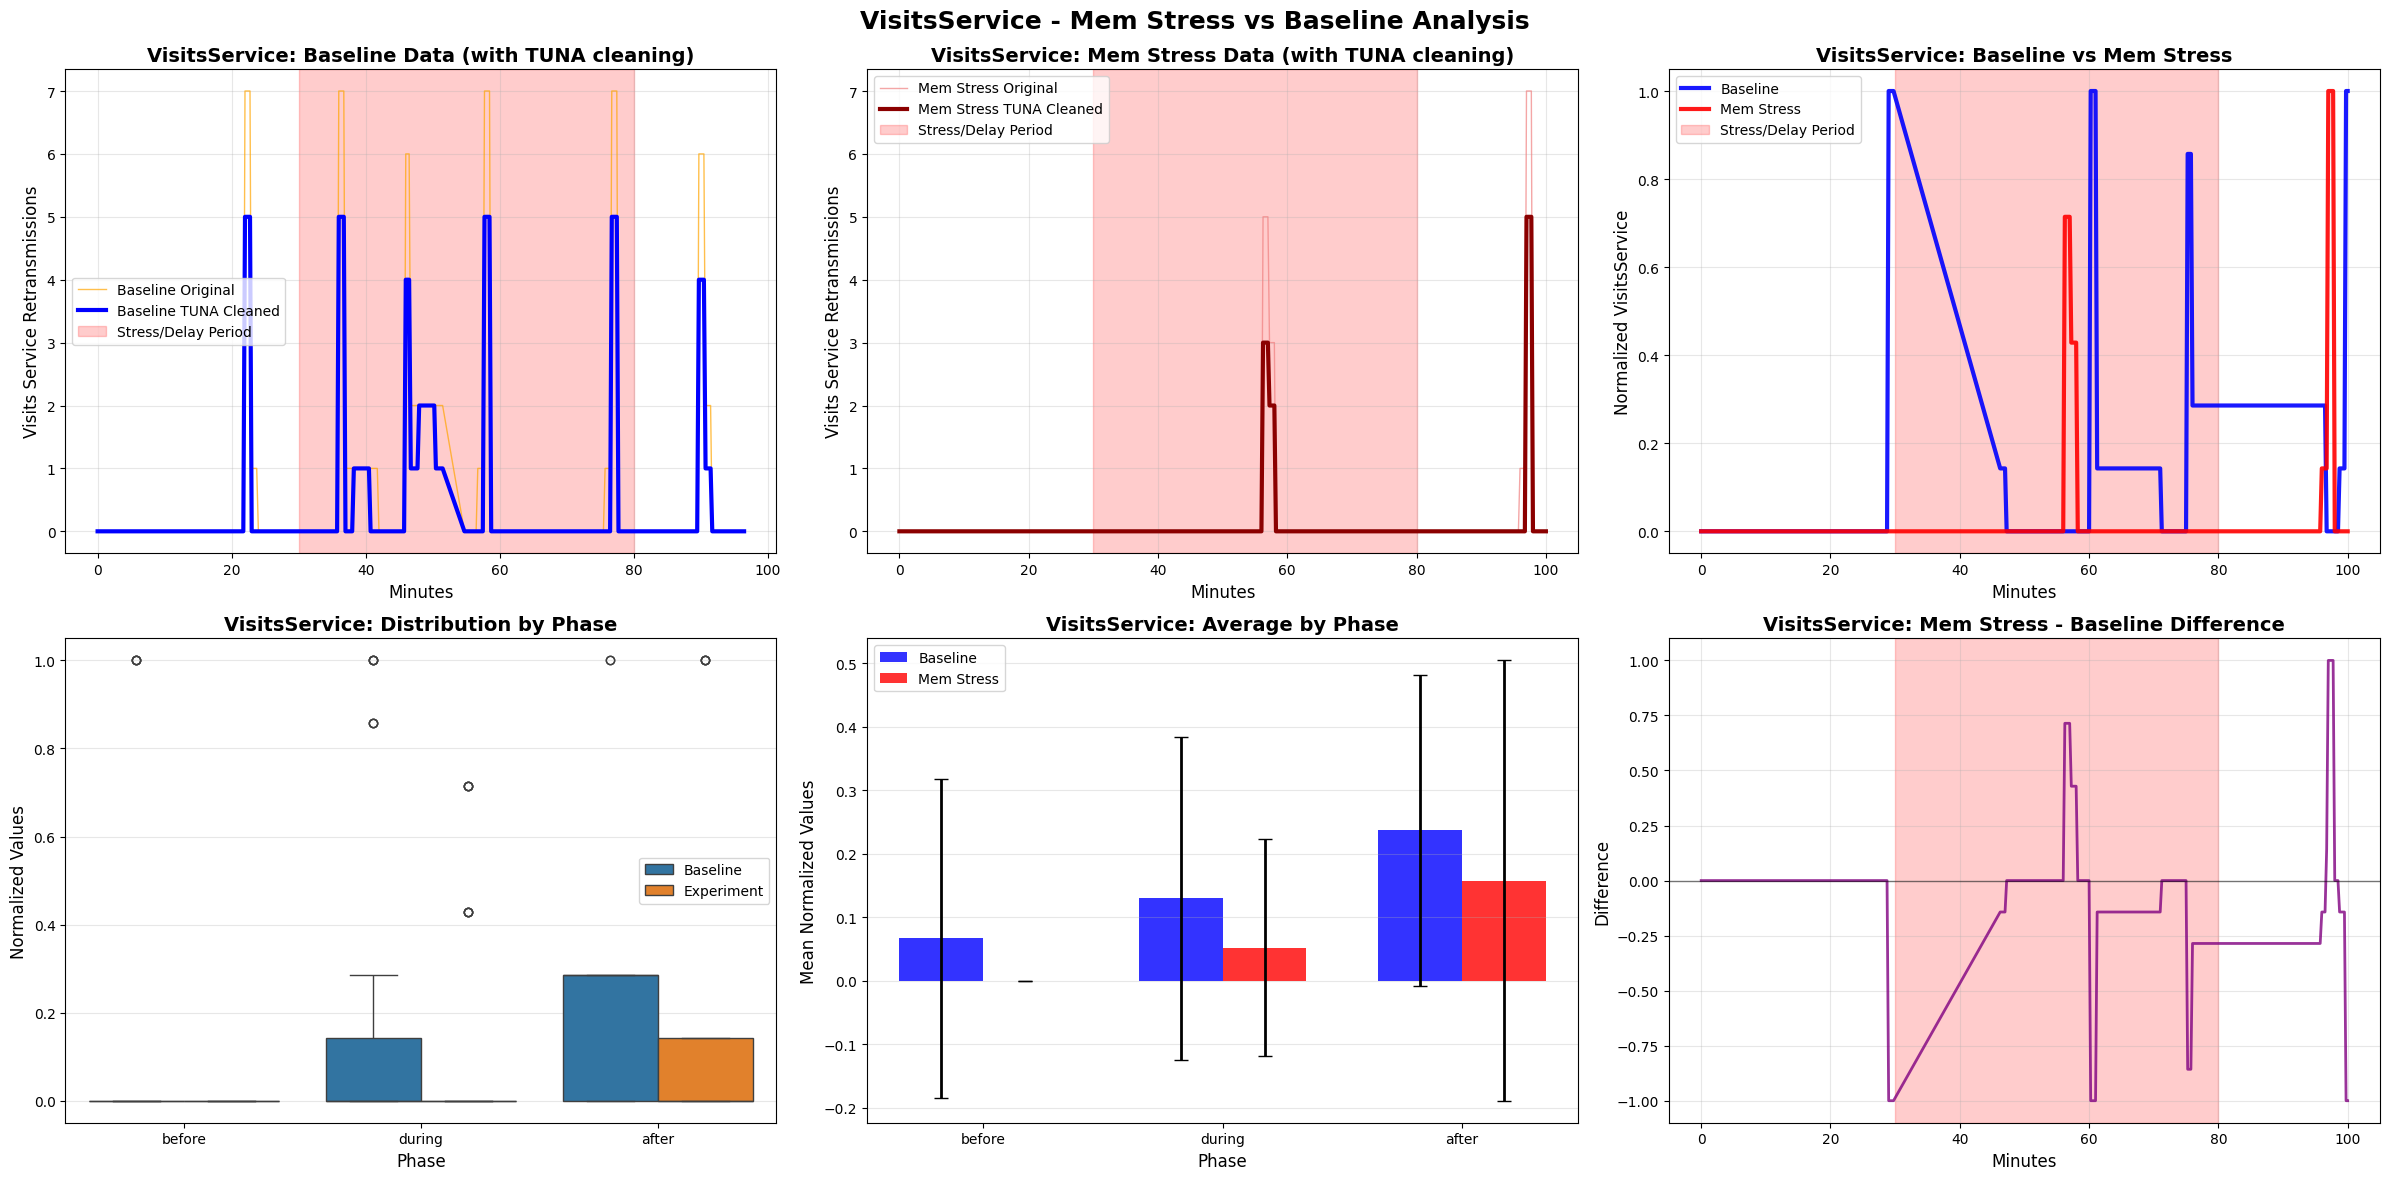


VISITSSERVICE - MEM STRESS VS BASELINE ANALYSIS
Comparing: VisitsService under mem_stress stress vs VisitsService baseline

TUNA CLEANING SUMMARY:
  MEM STRESS: 36 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 32.4%, Correlation: 0.991
  BASELINE: 117 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 28.7%, Correlation: 0.982

BASELINE STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.2365  0.2453  0.0  1.0
before  0.0667  0.2515  0.0  1.0
during  0.1299  0.2541  0.0  1.0

MEM STRESS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.1576  0.3465  0.0  1.0000
before  0.0000  0.0000  0.0  0.0000
during  0.0519  0.1708  0.0  0.7143

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  2.05, p=  0.0423 (SIGNIFICANT)
  DURING  : t=  2.39, p=  0.0180 (SIGNIFICANT)
  AFTER   : t=  1.00, p=  0.3217 (NOT SIGNIFICANT)

MEM STRESS 

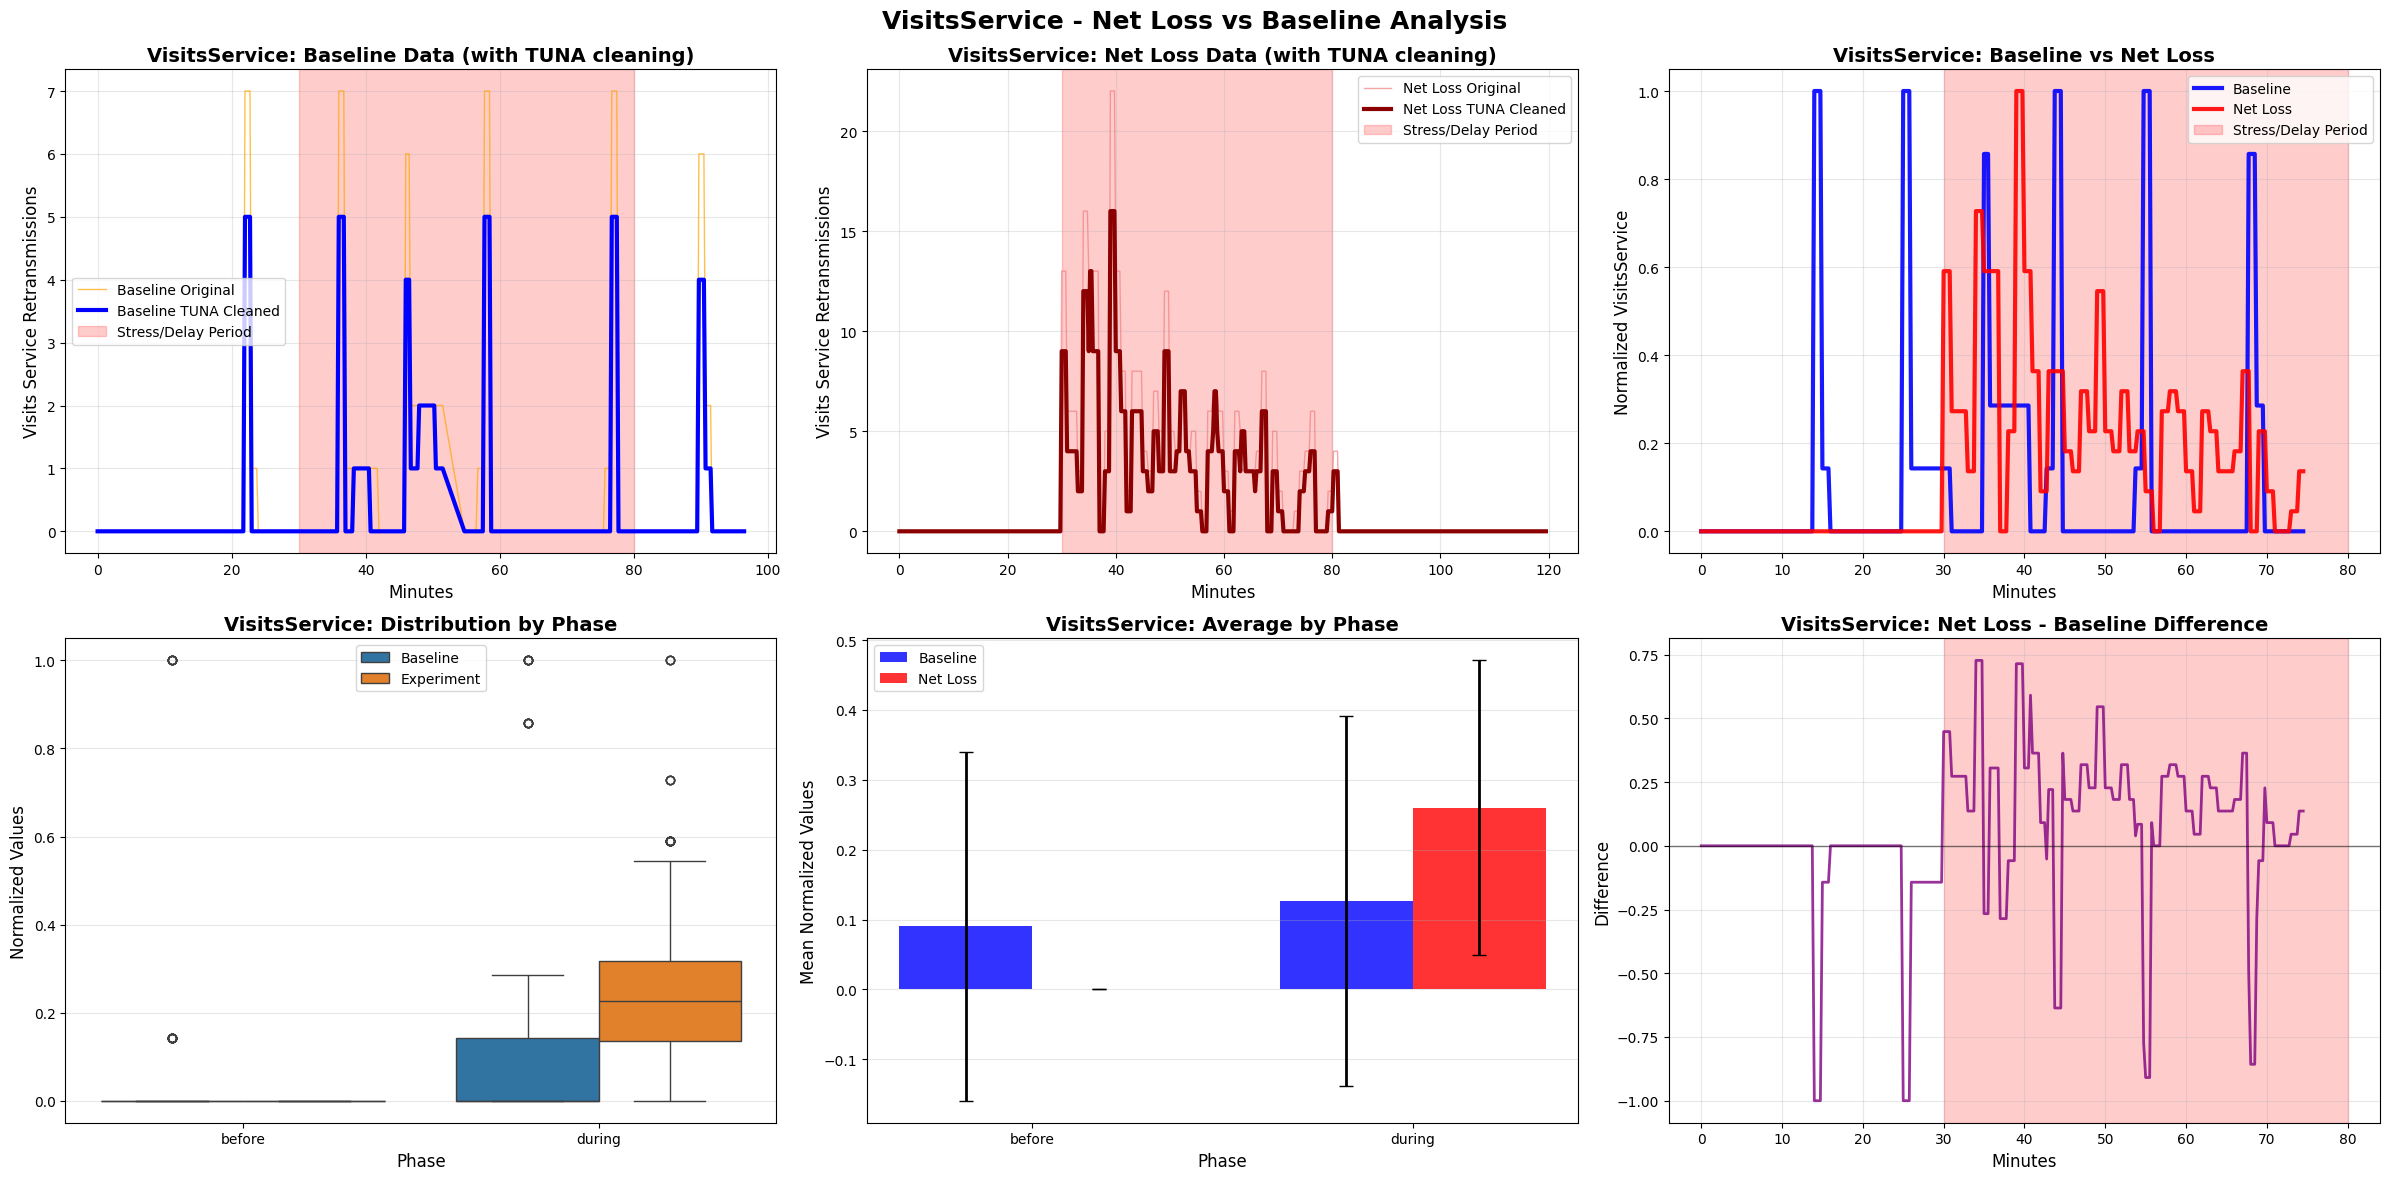


VISITSSERVICE - NET LOSS VS BASELINE ANALYSIS
Comparing: VisitsService under net_loss stress vs VisitsService baseline

TUNA CLEANING SUMMARY:
  NET LOSS: 191 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 25.5%, Correlation: 0.989
  BASELINE: 117 outliers removed
    Data type: discrete, Penalty factor: 0.75
    Noise Reduction: 28.7%, Correlation: 0.982

BASELINE STATISTICS BY PHASE:
          mean     std  min  max
phase                           
before  0.0905  0.2498  0.0  1.0
during  0.1261  0.2650  0.0  1.0

NET LOSS STATISTICS BY PHASE:
          mean     std  min  max
phase                           
before  0.0000  0.0000  0.0  0.0
during  0.2603  0.2106  0.0  1.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  3.97, p=  0.0001 (SIGNIFICANT)
  DURING  : t= -5.30, p=  0.0000 (SIGNIFICANT)
  AFTER   : Phase not present in data

NET LOSS IMPACT:
  BEFORE  : -100.00% (DECREASE)
  DURING  : +106.42% (INCREASE)
  AFTER   : Phase not present i

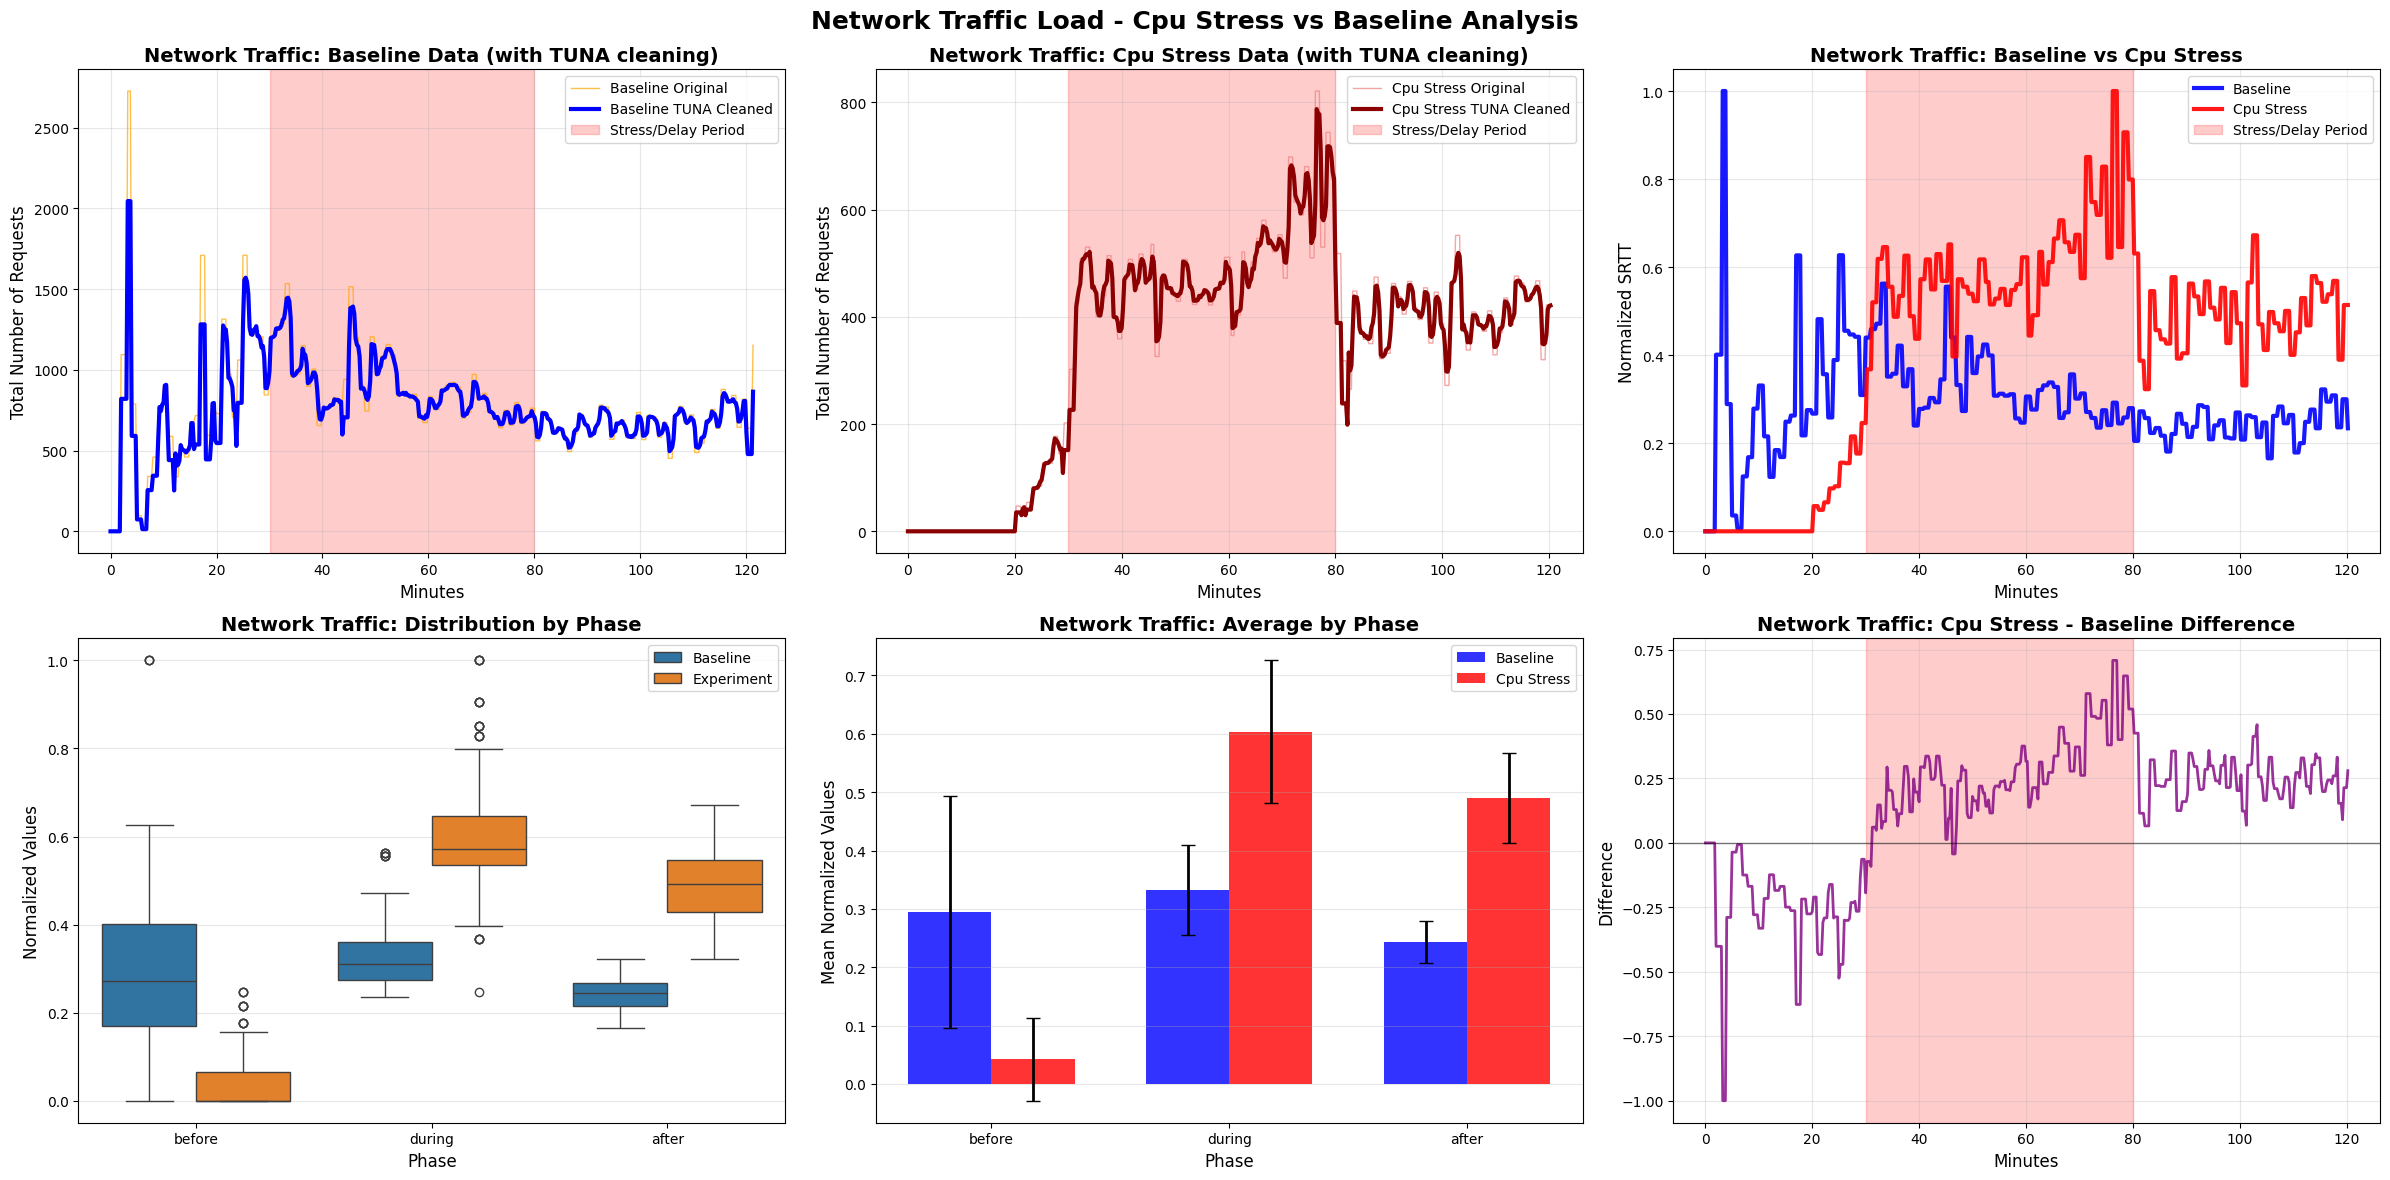


SRTT - CPU STRESS VS BASELINE NETWORK TRAFFIC ANALYSIS
Comparing: SRTT network traffic under cpu_stress stress vs SRTT baseline network traffic

TUNA CLEANING SUMMARY:
  CPU STRESS: 36 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 1.3%, Correlation: 0.986
  BASELINE: 78 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 12.1%, Correlation: 0.946

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2437  0.0359  0.1657  0.3223
before  0.2948  0.1985  0.0000  1.0000
during  0.3322  0.0776  0.2354  0.5625

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4901  0.0771  0.3228  0.6724
before  0.0420  0.0706  0.0000  0.2460
during  0.6033  0.1224  0.2460  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 13.15, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-26.52, p=  0.0000 (SIGNIFIC

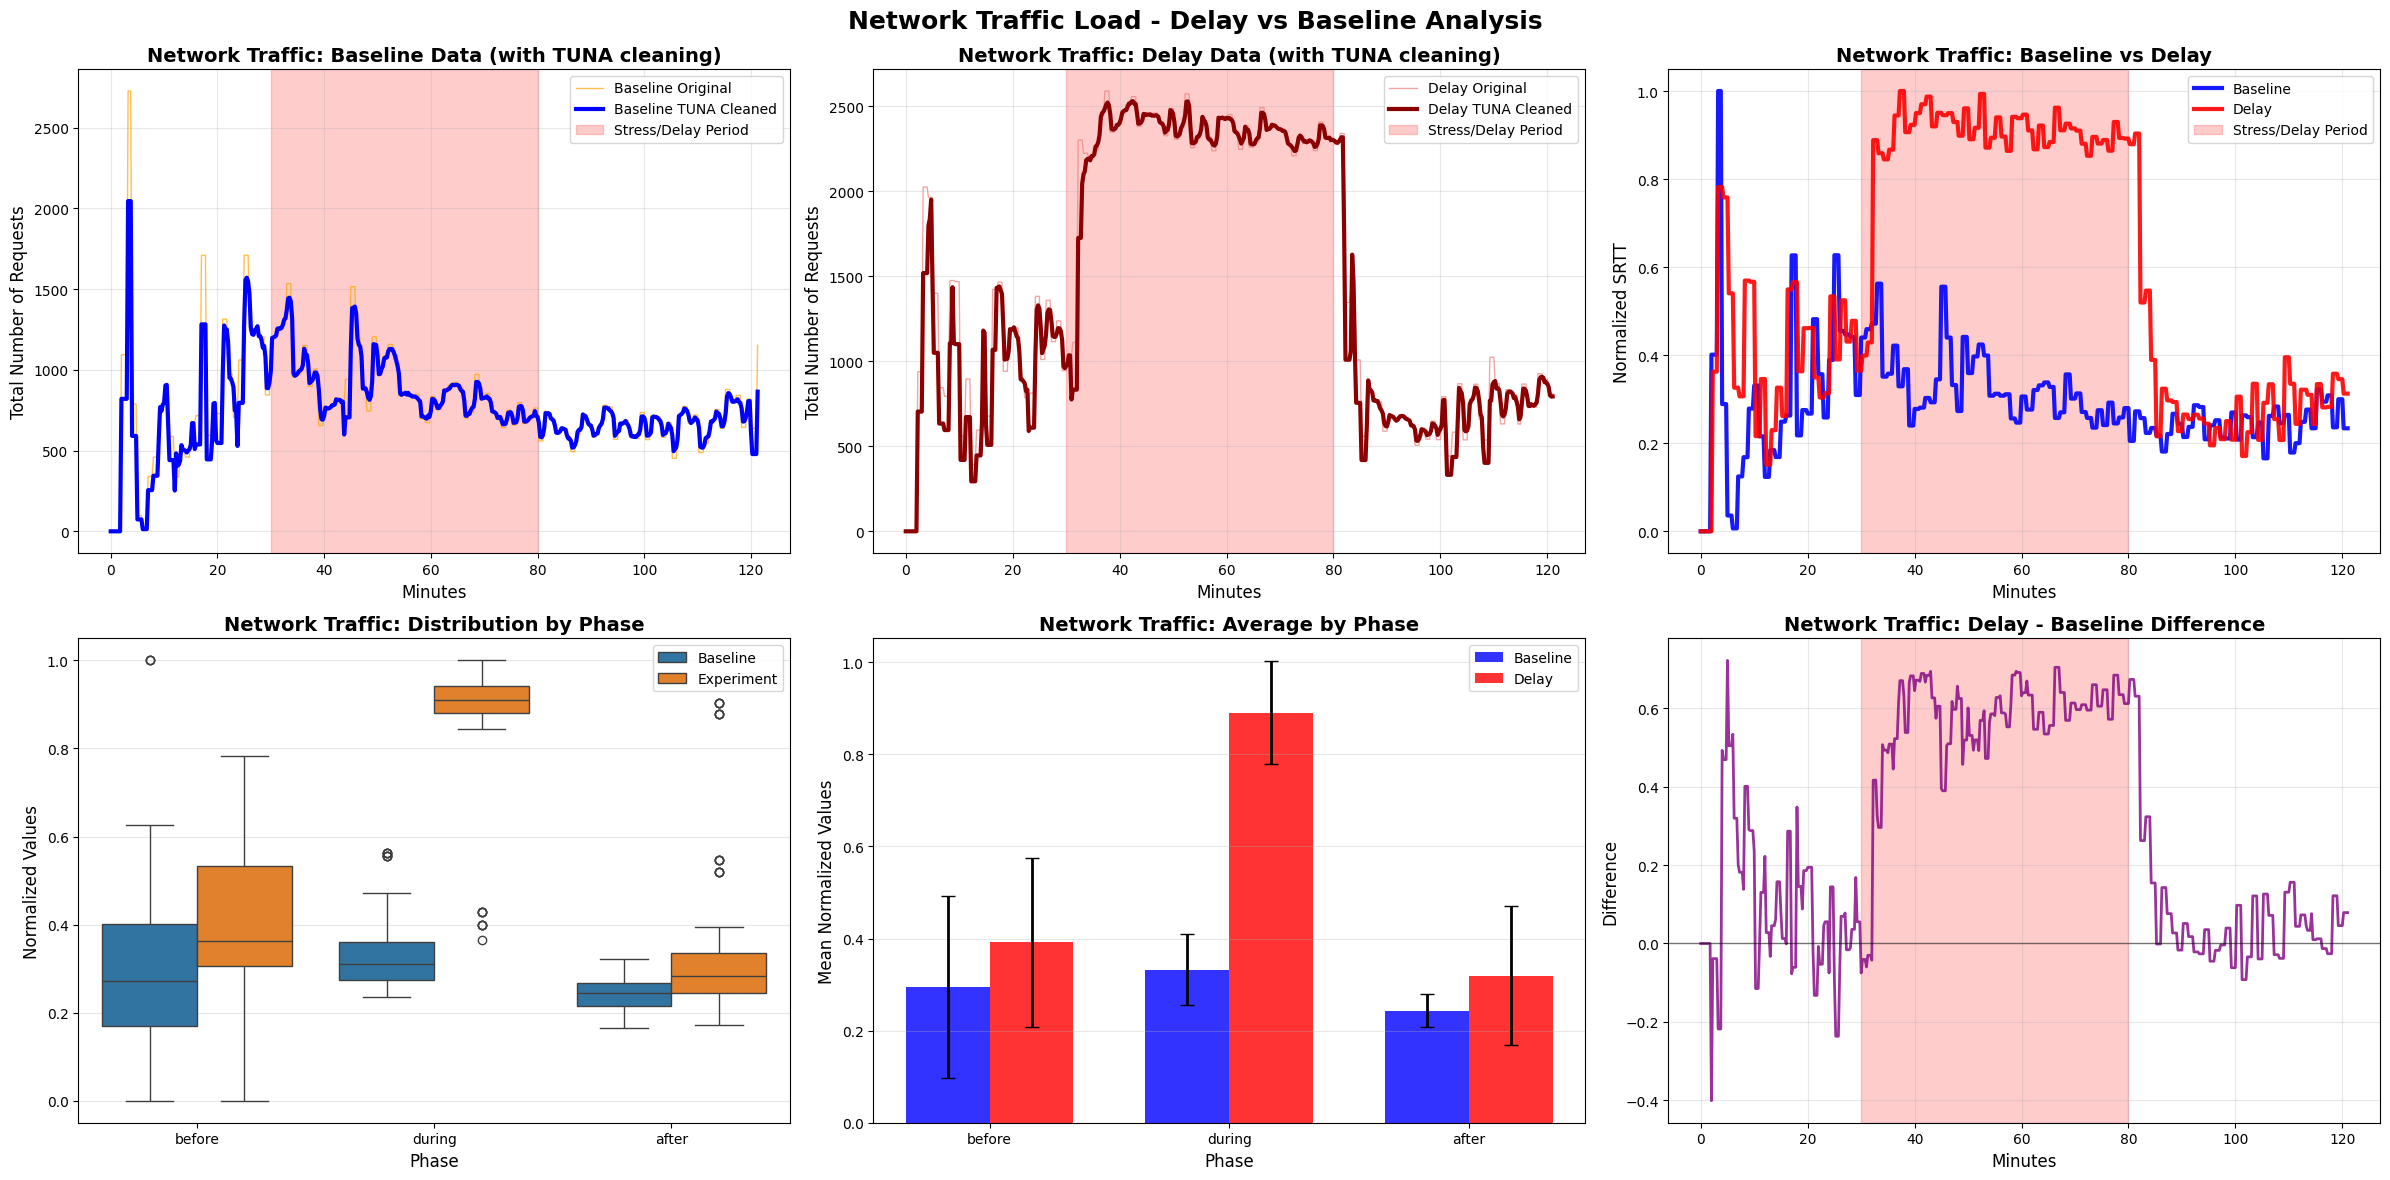


SRTT - DELAY VS BASELINE NETWORK TRAFFIC ANALYSIS
Comparing: SRTT network traffic under delay stress vs SRTT baseline network traffic

TUNA CLEANING SUMMARY:
  DELAY: 105 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: -2.5%, Correlation: 0.988
  BASELINE: 78 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 12.1%, Correlation: 0.946

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2436  0.0356  0.1657  0.3223
before  0.2948  0.1985  0.0000  1.0000
during  0.3322  0.0776  0.2354  0.5625

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.3194  0.1507  0.1710  0.9035
before  0.3915  0.1829  0.0000  0.7819
during  0.8908  0.1111  0.3649  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -3.92, p=  0.0001 (SIGNIFICANT)
  DURING  : t=-58.47, p=  0.0000 (SIGNIFICANT)
  AFTER   : t

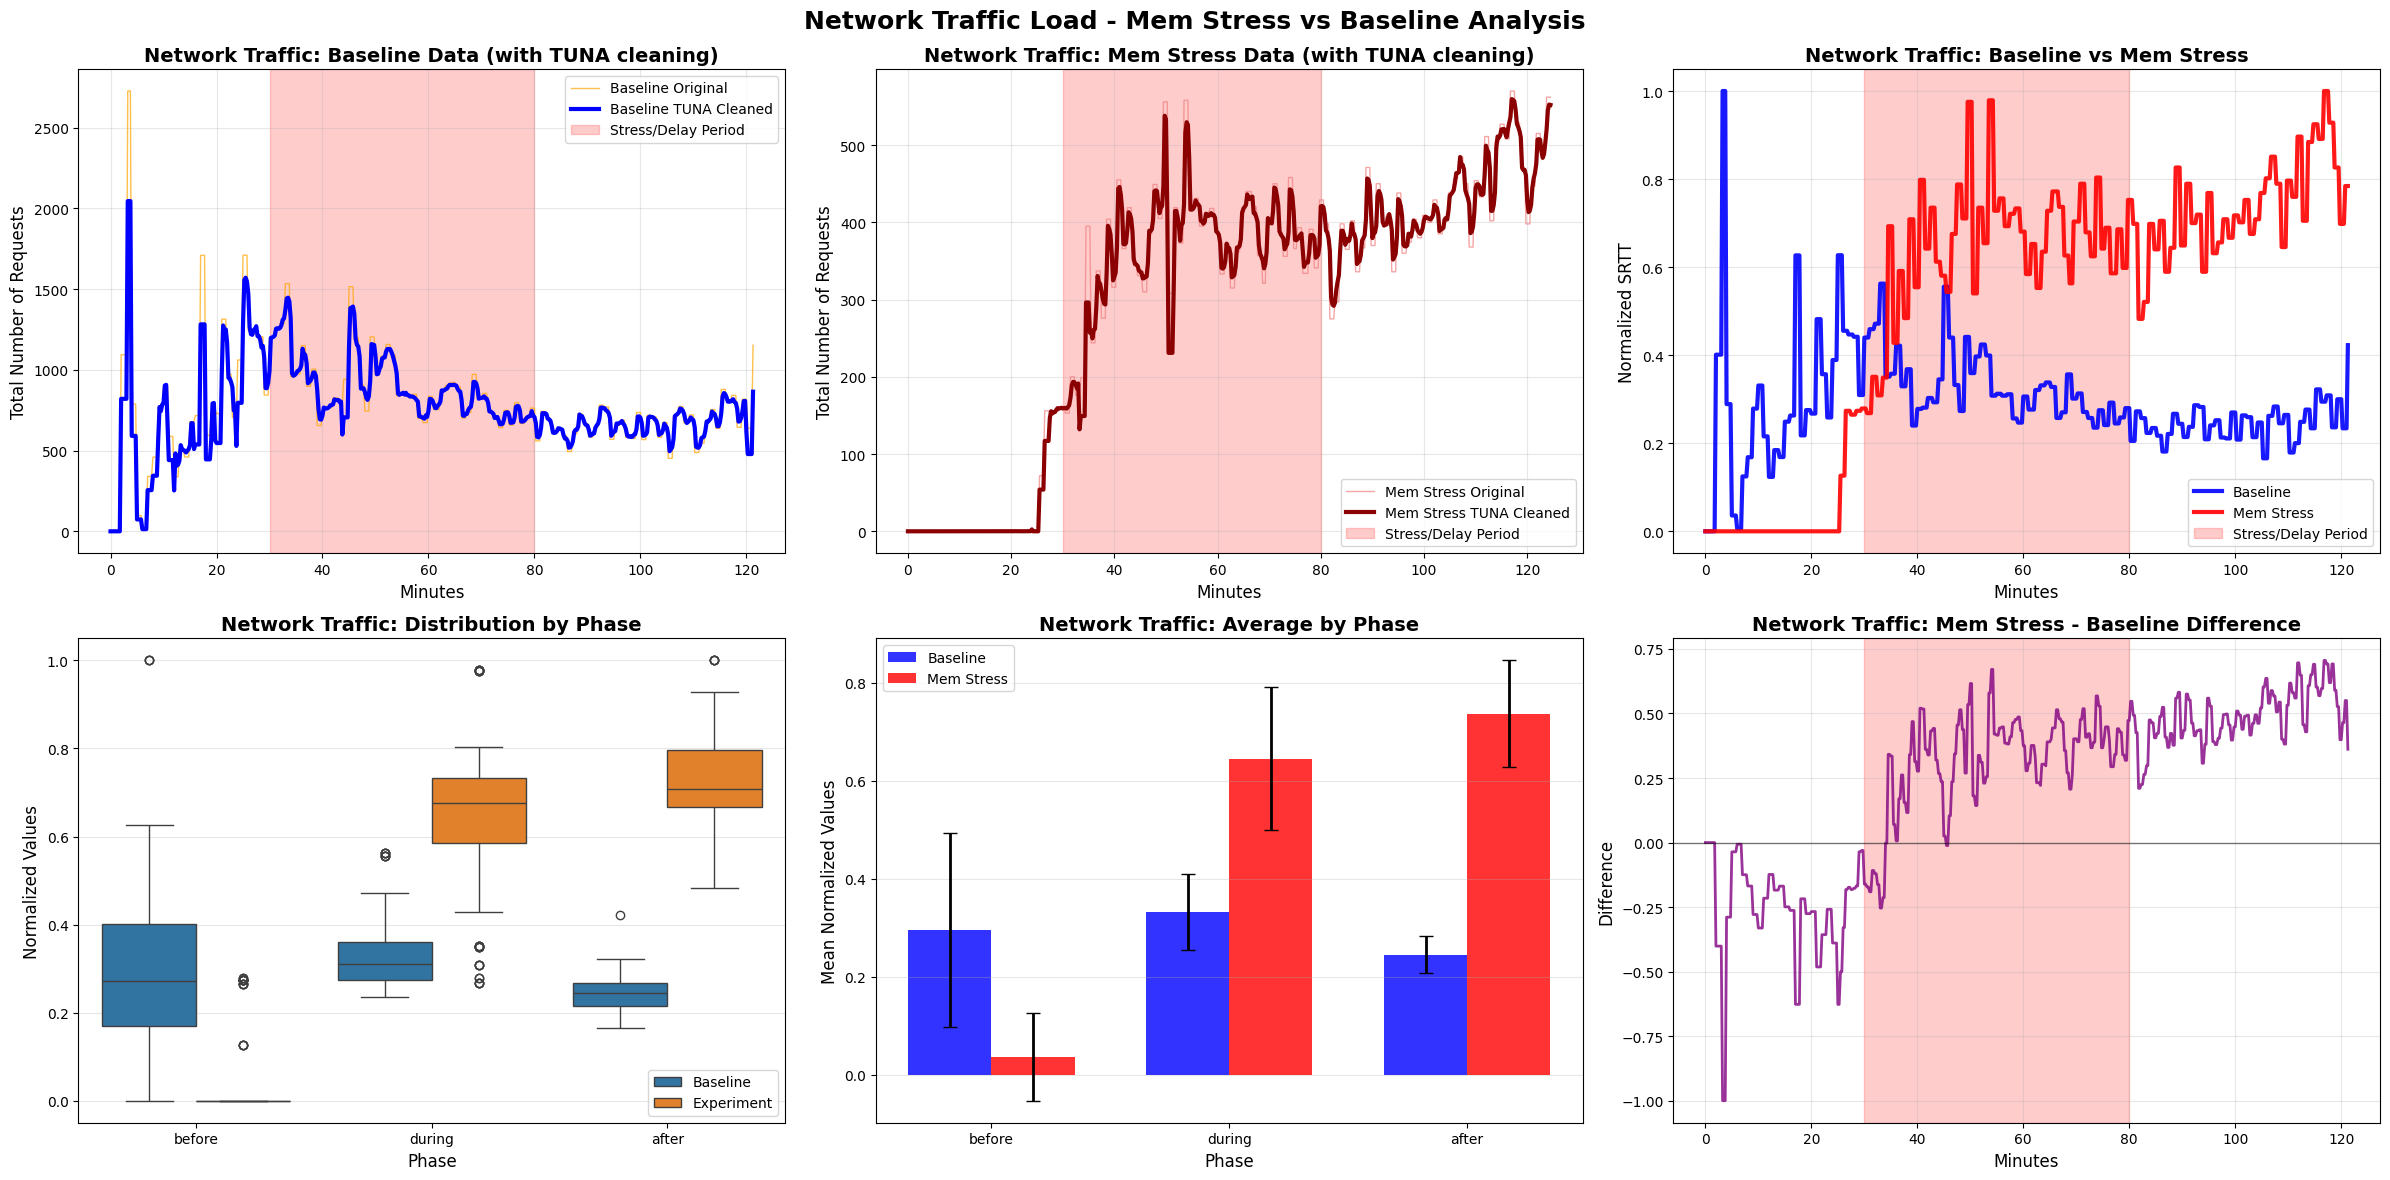


SRTT - MEM STRESS VS BASELINE NETWORK TRAFFIC ANALYSIS
Comparing: SRTT network traffic under mem_stress stress vs SRTT baseline network traffic

TUNA CLEANING SUMMARY:
  MEM STRESS: 27 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 1.1%, Correlation: 0.990
  BASELINE: 78 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 12.1%, Correlation: 0.946

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2446  0.0381  0.1657  0.4228
before  0.2948  0.1985  0.0000  1.0000
during  0.3322  0.0776  0.2354  0.5625

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.7363  0.1088  0.4825  1.0000
before  0.0359  0.0891  0.0000  0.2789
during  0.6448  0.1453  0.2684  0.9789

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 13.04, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-26.90, p=  0.0000 (SIGNIFIC

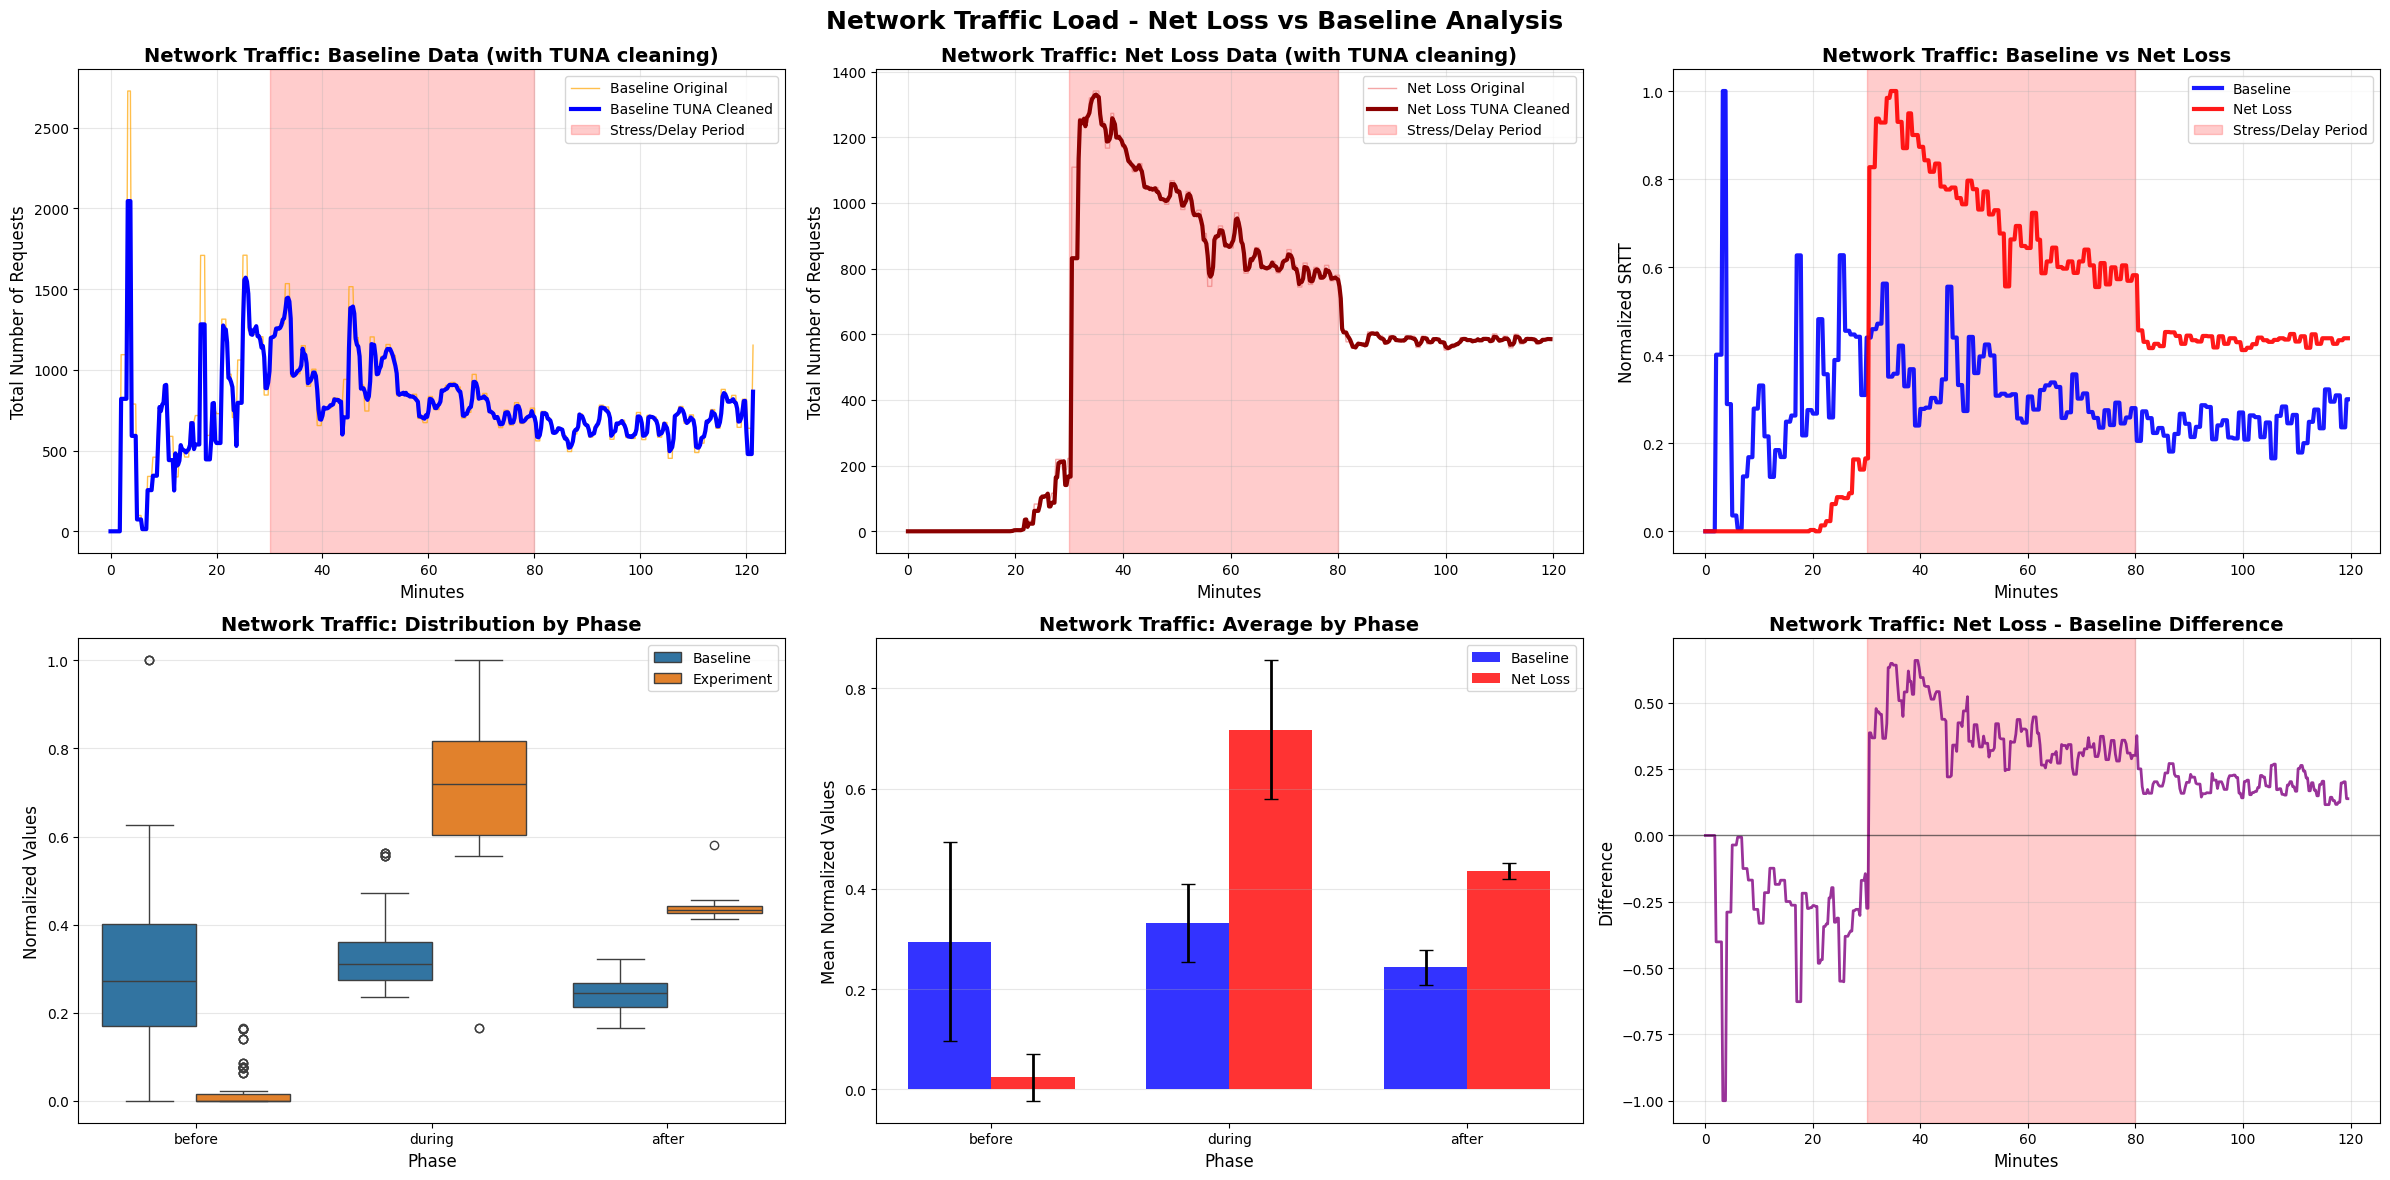


SRTT - NET LOSS VS BASELINE NETWORK TRAFFIC ANALYSIS
Comparing: SRTT network traffic under net_loss stress vs SRTT baseline network traffic

TUNA CLEANING SUMMARY:
  NET LOSS: 27 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 0.7%, Correlation: 0.996
  BASELINE: 78 outliers removed
    Data type: continuous, Penalty factor: 0.75
    Noise Reduction: 12.1%, Correlation: 0.946

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2431  0.0357  0.1657  0.3223
before  0.2948  0.1985  0.0000  1.0000
during  0.3322  0.0776  0.2354  0.5625

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4350  0.0159  0.4116  0.5817
before  0.0241  0.0470  0.0000  0.1655
during  0.7172  0.1388  0.1655  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 14.54, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-34.34, p=  0.0000 (SIGNIFICANT)
  A

In [13]:
def calculate_tcp_values(df, metric_name):
    """Extract TCP values - EXACT SAME LOGIC as TUNA cleaning function"""
    exclude_cols = ['Time', 'Minutes', 'source']
    
    # For TCP metrics, check if we have single or multiple value columns
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if len(value_cols) == 1:
        # Single column (like individual service retransmission data)
        return df[value_cols[0]].values
    else:
        # Multiple columns - for SRTT data, create cumulative metrics
        # Group by service and sum across latency buckets
        if 'srtt' in metric_name.lower():
            # For SRTT data, group by service and sum all latency buckets
            service_groups = {}
            for col in value_cols:
                if '_client_' in col or '_server_' in col:
                    service_name = col.split('_client_')[0] if '_client_' in col else col.split('_server_')[0]
                else:
                    service_name = col
                if service_name not in service_groups:
                    service_groups[service_name] = []
                service_groups[service_name].append(col)
            
            # Sum the first service group (or all if you want total)
            if service_groups:
                first_service = list(service_groups.keys())[0]
                return df[service_groups[first_service]].fillna(0).sum(axis=1).values
            else:
                return df[value_cols].fillna(0).sum(axis=1).values
        else:
            # For other multi-column data, sum all columns
            return df[value_cols].fillna(0).sum(axis=1).values

def normalize_series(series):
    """Normalize a series to 0-1 range"""
    min_val = series.min()
    max_val = series.max()
    if max_val > min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return pd.Series(np.zeros(len(series)), index=series.index)

def add_phase_column(df, delay_minutes=30, duration_minutes=50):
    """Add phase column based on experiment timeline"""
    df = df.copy()
    df['phase'] = 'before'
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after'
    return df

def get_y_axis_label(metric_name):
    """Get appropriate y-axis label based on TCP metric name"""
    labels = {
        'ApiGateway': 'API Gateway Retransmissions',
        'CustomersService': 'Customers Service Retransmissions',
        'VetsService': 'Vets Service Retransmissions', 
        'VisitsService': 'Visits Service Retransmissions',
        'Network traffic': 'Total Number of Requests',
        'SRTT': 'Total Number of Requests',  # SRTT data represents network traffic load
        'srtt': 'Total Number of Requests'   # Handle lowercase as well
    }
    
    # Check if metric name contains 'srtt' (case insensitive)
    if 'srtt' in metric_name.lower():
        return 'Total Number of Requests'
    
    return labels.get(metric_name, 'TCP Metric Value')



def analyze_and_plot_tcp_comparison(metric_name, experiment_name, experiment_df, baseline_df, 
                                   tuna_results=None, delay_minutes=30, duration_minutes=50):
    """
    Create 6-plot comparison analysis for TCP metrics between experiment and baseline
    
    Parameters:
    - metric_name: Name of the TCP metric (e.g., 'ApiGateway', 'CustomersService', 'SRTT')
    - experiment_name: Name of the experiment (e.g., 'cpu_stress', 'delay', 'mem_stress', 'net_loss')
    - experiment_df: DataFrame containing experiment data
    - baseline_df: DataFrame containing baseline data
    - tuna_results: TUNA results from your previous cell
    - delay_minutes: When the stress/delay starts (default 30)
    - duration_minutes: How long the stress/delay lasts (default 50)
    """
    
    # Calculate TCP values
    experiment_values = calculate_tcp_values(experiment_df, metric_name)
    baseline_values = calculate_tcp_values(baseline_df, metric_name)
    
    # Create series with proper index
    experiment_series = pd.Series(experiment_values, index=experiment_df.index)
    baseline_series = pd.Series(baseline_values, index=baseline_df.index)
    
    # Get TUNA cleaned data if available
    experiment_cleaned = None
    baseline_cleaned = None
    if tuna_results and metric_name in tuna_results:
        if experiment_name in tuna_results[metric_name]:
            experiment_cleaned = pd.Series(tuna_results[metric_name][experiment_name]['cleaned'])
        if 'baseline' in tuna_results[metric_name]:
            baseline_cleaned = pd.Series(tuna_results[metric_name]['baseline']['cleaned'])
    
    # Normalize data
    experiment_norm = normalize_series(experiment_series)
    baseline_norm = normalize_series(baseline_series)
    
    # Create combined dataframe for analysis
    min_length = min(len(experiment_norm), len(baseline_norm), len(experiment_df['Minutes']), len(baseline_df['Minutes']))
    
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm.iloc[:min_length],
        'Experiment': experiment_norm.iloc[:min_length],
        'Minutes': experiment_df['Minutes'].iloc[:min_length],
        'Baseline_Minutes': baseline_df['Minutes'].iloc[:min_length]
    })
    
    df_combined['difference'] = df_combined['Experiment'] - df_combined['Baseline']
    
    # Add phase information
    df_combined['phase'] = 'before'
    df_combined.loc[(df_combined['Minutes'] >= delay_minutes) & 
                   (df_combined['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'
    df_combined.loc[df_combined['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after'
    
    # Statistical analysis by phase
    stats_baseline = df_combined.groupby('phase')['Baseline'].agg(['mean', 'std', 'min', 'max'])
    stats_experiment = df_combined.groupby('phase')['Experiment'].agg(['mean', 'std', 'min', 'max'])
    
    # T-tests for statistical significance - handle missing phases
    t_tests = {}
    available_phases = stats_baseline.index.tolist()
    
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            data = df_combined[df_combined['phase'] == phase]
            if len(data) > 1:
                t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['Experiment'].dropna())
                t_tests[phase] = {'t': t_stat, 'p': p_value}
            else:
                t_tests[phase] = {'t': 0, 'p': 1}
        else:
            t_tests[phase] = {'t': 0, 'p': 1, 'note': 'Phase not present in data'}
    
    # Calculate percentage impact - handle missing phases gracefully
    impact = {}
    
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            baseline_mean = stats_baseline.loc[phase, 'mean']
            experiment_mean = stats_experiment.loc[phase, 'mean']
            if baseline_mean != 0:
                impact[phase] = ((experiment_mean - baseline_mean) / baseline_mean) * 100
            else:
                impact[phase] = 0
        else:
            impact[phase] = 0  # Phase not present in data
    
    # Create the 6-plot visualization
    fig = plt.figure(figsize=(24, 12))
    
    # Get proper y-axis label
    y_label = get_y_axis_label(metric_name)
    
    # 1. Baseline with/without TUNA cleaning
    plt.subplot(2, 3, 1)
    plt.plot(baseline_df['Minutes'], baseline_series, 
             label='Baseline Original', color='orange', alpha=0.7, linewidth=1)
    
    if baseline_cleaned is not None:
        plt.plot(baseline_df['Minutes'].iloc[:len(baseline_cleaned)], baseline_cleaned, 
                 label='Baseline TUNA Cleaned', linewidth=3, color='blue')
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(baseline_df['Minutes'], baseline_series, 
                 label='Baseline', linewidth=3, color='blue')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    
    # Clean title for SRTT data
    plot_title = f'{metric_name}: Baseline Data{title_suffix}'
    if 'srtt' in metric_name.lower():
        plot_title = f'Network Traffic: Baseline Data{title_suffix}'
    
    plt.title(plot_title, fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. Experiment with/without TUNA cleaning
    plt.subplot(2, 3, 2)
    plt.plot(experiment_df['Minutes'], experiment_series, 
             label=f'{experiment_name.replace("_", " ").title()} Original', 
             alpha=0.7, color='lightcoral', linewidth=1)
    
    if experiment_cleaned is not None:
        plt.plot(experiment_df['Minutes'].iloc[:len(experiment_cleaned)], experiment_cleaned, 
                 label=f'{experiment_name.replace("_", " ").title()} TUNA Cleaned', 
                 linewidth=3, color='darkred')
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(experiment_df['Minutes'], experiment_series, 
                 label=f'{experiment_name.replace("_", " ").title()}', 
                 linewidth=3, color='darkred')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    
    # Clean title for SRTT data
    plot_title = f'{metric_name}: {experiment_name.replace("_", " ").title()} Data{title_suffix}'
    if 'srtt' in metric_name.lower():
        plot_title = f'Network Traffic: {experiment_name.replace("_", " ").title()} Data{title_suffix}'
    
    plt.title(plot_title, fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison (normalized)
    plt.subplot(2, 3, 3)
    plt.plot(df_combined['Minutes'], df_combined['Baseline'], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(df_combined['Minutes'], df_combined['Experiment'], 
             label=f'{experiment_name.replace("_", " ").title()}', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    
    # Clean title for comparison plot
    comparison_title = f"{metric_name}: Baseline vs {experiment_name.replace('_', ' ').title()}"
    if 'srtt' in metric_name.lower():
        comparison_title = f"Network Traffic: Baseline vs {experiment_name.replace('_', ' ').title()}"
    
    plt.title(comparison_title, fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {metric_name}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'Experiment', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    
    # Clean title for box plot
    box_title = f'{metric_name}: Distribution by Phase'
    if 'srtt' in metric_name.lower():
        box_title = f'Network Traffic: Distribution by Phase'
    
    plt.title(box_title, fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase - handle missing phases
    plt.subplot(2, 3, 5)
    phases_to_plot = [p for p in ['before', 'during', 'after'] if p in available_phases]
    
    if len(phases_to_plot) > 0:
        x = np.arange(len(phases_to_plot))
        width = 0.35
        
        baseline_means = [stats_baseline.loc[p, 'mean'] for p in phases_to_plot]
        baseline_stds = [stats_baseline.loc[p, 'std'] for p in phases_to_plot]
        experiment_means = [stats_experiment.loc[p, 'mean'] for p in phases_to_plot]
        experiment_stds = [stats_experiment.loc[p, 'std'] for p in phases_to_plot]
        
        bars1 = plt.bar(x - width/2, baseline_means, width, 
                       label='Baseline', alpha=0.8, color='blue')
        bars2 = plt.bar(x + width/2, experiment_means, width, 
                       label=f'{experiment_name.replace("_", " ").title()}', alpha=0.8, color='red')
        
        plt.errorbar(x - width/2, baseline_means, yerr=baseline_stds, 
                    fmt='none', ecolor='black', capsize=5, linewidth=2)
        plt.errorbar(x + width/2, experiment_means, yerr=experiment_stds, 
                    fmt='none', ecolor='black', capsize=5, linewidth=2)
        
        plt.xticks(x, phases_to_plot)
    else:
        plt.text(0.5, 0.5, 'No phase data available', ha='center', va='center', transform=plt.gca().transAxes)
    
    # Clean title for average plot
    avg_title = f'{metric_name}: Average by Phase'
    if 'srtt' in metric_name.lower():
        avg_title = f'Network Traffic: Average by Phase'
    
    plt.title(avg_title, fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    
    # Clean title for difference plot
    diff_title = f'{metric_name}: {experiment_name.replace("_", " ").title()} - Baseline Difference'
    if 'srtt' in metric_name.lower():
        diff_title = f'Network Traffic: {experiment_name.replace("_", " ").title()} - Baseline Difference'
    
    plt.title(diff_title, fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Update main title based on metric type
    if 'srtt' in metric_name.lower():
        main_title = f'Network Traffic Load - {experiment_name.replace("_", " ").title()} vs Baseline Analysis'
    else:
        main_title = f'{metric_name} - {experiment_name.replace("_", " ").title()} vs Baseline Analysis'
    
    plt.suptitle(main_title, fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    # Print statistical results
    print(f"\n{'='*80}")
    if 'srtt' in metric_name.lower():
        print(f"{metric_name.upper()} - {experiment_name.upper().replace('_', ' ')} VS BASELINE NETWORK TRAFFIC ANALYSIS")
        print(f"{'='*80}")
        print(f"Comparing: {metric_name} network traffic under {experiment_name} stress vs {metric_name} baseline network traffic")
    else:
        print(f"{metric_name.upper()} - {experiment_name.upper().replace('_', ' ')} VS BASELINE ANALYSIS")
        print(f"{'='*80}")
        print(f"Comparing: {metric_name} under {experiment_name} stress vs {metric_name} baseline")
    
    # Print TUNA cleaning summary if available
    if tuna_results and metric_name in tuna_results:
        print(f"\nTUNA CLEANING SUMMARY:")
        if experiment_name in tuna_results[metric_name]:
            exp_stats = tuna_results[metric_name][experiment_name]['stats']
            penalty_factor = exp_stats.get('penalty_factor', 'N/A')
            data_type = exp_stats.get('data_type', 'N/A')
            print(f"  {experiment_name.upper().replace('_', ' ')}: {exp_stats['outliers']} outliers removed")
            print(f"    Data type: {data_type}, Penalty factor: {penalty_factor}")
            print(f"    Noise Reduction: {exp_stats['noise_reduction']:.1f}%, Correlation: {exp_stats['correlation']:.3f}")
        
        if 'baseline' in tuna_results[metric_name]:
            base_stats = tuna_results[metric_name]['baseline']['stats']
            penalty_factor = base_stats.get('penalty_factor', 'N/A')
            data_type = base_stats.get('data_type', 'N/A')
            print(f"  BASELINE: {base_stats['outliers']} outliers removed")
            print(f"    Data type: {data_type}, Penalty factor: {penalty_factor}")
            print(f"    Noise Reduction: {base_stats['noise_reduction']:.1f}%, Correlation: {base_stats['correlation']:.3f}")

    print(f"\nBASELINE STATISTICS BY PHASE:")
    if len(stats_baseline) > 0:
        print(stats_baseline.round(4))
    else:
        print("  No phase data available")

    print(f"\n{experiment_name.upper().replace('_', ' ')} STATISTICS BY PHASE:")
    if len(stats_experiment) > 0:
        print(stats_experiment.round(4))
    else:
        print("  No phase data available")

    print(f"\nSTATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        if 'note' in test:
            print(f"  {phase.upper():8}: {test['note']}")
        else:
            sig = "SIGNIFICANT" if test['p'] < 0.05 else "NOT SIGNIFICANT"
            print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")

    print(f"\n{experiment_name.upper().replace('_', ' ')} IMPACT:")
    for phase, change in impact.items():
        if change == 0 and phase not in available_phases:
            print(f"  {phase.upper():8}: Phase not present in data")
        else:
            direction = "INCREASE" if change > 0 else "DECREASE" if change < 0 else "NO CHANGE"
            print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")

    # Print TCP metrics details
    value_cols = [col for col in experiment_df.columns if col not in ['Time', 'Minutes', 'source']]
    print(f"\nTCP METRICS DETAILS:")
    print(f"  Metric: {metric_name}")
    if 'srtt' in metric_name.lower():
        print(f"  Metric type: Network traffic load")
    else:
        print(f"  Metric type: {get_y_axis_label(metric_name)}")
    print(f"  Columns analyzed: {value_cols}")
    print(f"  Data points analyzed: {len(df_combined)}")
    print(f"  Y-axis label: {y_label}")
    print(f"  Comparison: {metric_name} {experiment_name} vs {metric_name} baseline")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_experiment': stats_experiment,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'tuna_info': {
            'experiment_cleaned': experiment_cleaned is not None,
            'baseline_cleaned': baseline_cleaned is not None
        }
    }

def run_comprehensive_tcp_analysis(all_datasets, tuna_results=None):
    """
    Run comprehensive TCP analysis - each microservice vs its own baseline
    Uses existing tuna_results from previous cell
    """
    print(f"\n{'='*80}")
    print("COMPREHENSIVE TCP METRICS ANALYSIS")
    print(f"{'='*80}")
    print("Each metric (retransmissions/network traffic) under stress will be compared to its own baseline")
    
    analysis_results = {}
    
    for metric_name, experiments in all_datasets.items():
        analysis_results[metric_name] = {}
        
        baseline_df = experiments['baseline']
        
        for experiment_name, experiment_df in experiments.items():
            if experiment_name != 'baseline':
                
                result = analyze_and_plot_tcp_comparison(
                    metric_name=metric_name,
                    experiment_name=experiment_name,
                    experiment_df=experiment_df,
                    baseline_df=baseline_df,
                    tuna_results=tuna_results
                )
                
                analysis_results[metric_name][experiment_name] = result
    
    return analysis_results

# Run comprehensive analysis using existing tuna_results from previous cell
tcp_results = run_comprehensive_tcp_analysis(all_datasets, tuna_results)

# Or analyze a specific metric:
# specific_result = analyze_and_plot_tcp_comparison(
#     metric_name='SRTT',  # This will now correctly show "Total Number of Requests"
#     experiment_name='cpu_stress',  # Stress condition
#     experiment_df=all_datasets['SRTT']['cpu_stress'],  # SRTT under CPU stress
#     baseline_df=all_datasets['SRTT']['baseline'],  # SRTT baseline
#     tuna_results=tuna_results  # Use the tuna_results from your previous cell
# )